# Introduction : 

### Social Media Data for DSBA

# Context:


* An aviation company that provides domestic as well as international trips to the customers now wants to apply a targeted approach instead of reaching out to each of the customers.

* This time they want to do it digitally instead of tele calling. Hence they have collaborated with a social networking platform, so they can learn the digital and social behaviour of the customers and provide the digital advertisement on the user page of the targeted customers who have a high propensity to take up the product.

* Propensity of buying tickets is different for different login devices. Hence, you have to create 2 models separately for Laptop and Mobile. [Anything which is not a laptop can be considered as mobile phone usage.]


# Objective:
* To harness the available data of existing and potential customers and improve marketing expenditure, thus avoiding high costs

* To Predict social behaviour of the customers and provide the digital advertisement on the user page of the targeted customers who have a high propensity to take up the product

# Key Questions:
1. What key variables are important in identifying potential purchasing customers?
2. What are the different characteristics of the Customers who bought the packages ?
3. What's the important performance metric for the model and how can it be improved?

# Dataset Attributes:

## Customer details:



1. UserID: Unique ID of user
2. Buy_ticket: Buy ticket in next month
3. Yearly_avg_view_on_travel_page: Average yearly views on any travel related page by user
4. preferred_device: Through which device user preferred to do login
5. total_likes_on_outstation_checkin_given : Total number of likes given by a user on out of station checkings in last year 
6. yearly_avg_Outstation_checkins : Average number of out of station check-in done by user 
7. member_in_family :Total number of relationship mentioned by user in the account
8. preferred_location_type : Preferred type of the location for travelling of user 
9. Yearly_avg_comment_on_travel_page : Average yearly comments on any travel related page by user
10. total_likes_on_outofstation_checkin_received : Total number of likes received by a user on out of station checkings in last year
11. week_since_last_outstation_checkin : Number of weeks since last out of station check-in update by user
12. following_company_page : Weather the customer is following company page (Yes or No)
13. montly_avg_comment_on_company_page :Average monthly comments on company page by user
14. working_flag : Weather the customer is working or not
15. travelling_network_rating : Does user have close friends who also like travelling. 1 is highs and 4 is lowest
16. Adult_flag: Weather the customer is adult or not
17. Daily_Avg_mins_spend_on_traveling_page: Average time spend on the company page by user on daily basis

                              

 # 1. Importing Necessary Libraries

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

# 2. Data Collection and Cleaning

In [2]:
df = pd.read_csv("Social Media Data for DSBA.csv")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 11760 rows and 17 columns.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [4]:
df.head()

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                2               Financial                               94.0   
1                1               Financial                               61.0   
2                2                   Other                               92.0   
3                4               Financial                               56.0   
4                1                 Medical                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   

   montly_avg_comment_on_company_page working_flag  travelling_network_rating  \
0                                  11           No                          1   
1                                  23          Yes                          4   
2                                  15           No                          2   
3                                  11           No                          3   
4                                  12           No                          4   

   Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
0           0                                       8  
1           1                                      10  
2           0                                       7  
3           0                                       8  
4           1                                       6

In [5]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [6]:
df.describe()

UserID  Yearly_avg_view_on_travel_page  \
count  1.176000e+04                    11179.000000   
mean   1.005880e+06                      280.830844   
std    3.394964e+03                       68.182958   
min    1.000001e+06                       35.000000   
25%    1.002941e+06                      232.000000   
50%    1.005880e+06                      271.000000   
75%    1.008820e+06                      324.000000   
max    1.011760e+06                      464.000000   

       total_likes_on_outstation_checkin_given  \
count                             11379.000000   
mean                              28170.481765   
std                               14385.032134   
min                                3570.000000   
25%                               16380.000000   
50%                               28076.000000   
75%                               40525.000000   
max                              252430.000000   

       Yearly_avg_comment_on_travel_page  \
count                       11554.000000   
mean                           74.790029   
std                            24.026650   
min                             3.000000   
25%                            57.000000   
50%                            75.000000   
75%                            92.000000   
max                           815.000000   

       total_likes_on_outofstation_checkin_received  \
count                                  11760.000000   
mean                                    6531.699065   
std                                     4706.613785   
min                                     1009.000000   
25%                                     2940.750000   
50%                                     4948.000000   
75%                                     8393.250000   
max                                    20065.000000   

       week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
count                        11760.000000                        11760.000000   
mean                             3.203571                           28.661565   
std                              2.616365                           48.660504   
min                              0.000000                           11.000000   
25%                              1.000000                           17.000000   
50%                              3.000000                           22.000000   
75%                              5.000000                           27.000000   
max                             11.000000                          500.000000   

       travelling_network_rating    Adult_flag  \
count               11760.000000  11760.000000   
mean                    2.712245      0.793878   
std                     1.080887      0.851823   
min                     1.000000      0.000000   
25%                     2.000000      0.000000   
50%                     3.000000      1.000000   
75%                     4.000000      1.000000   
max                     4.000000      3.000000   

       Daily_Avg_mins_spend_on_traveling_page  
count                            11760.000000  
mean                                13.817432  
std                                  9.070657  
min                                  0.000000  
25%                                  8.000000  
50%                                 12.000000  
75%                                 18.000000  
max                                270.000000

In [7]:
df['preferred_device'].unique()

array(['iOS and Android', 'iOS', 'ANDROID', nan, 'Android', 'Android OS',
       'Other', 'Others', 'Tab', 'Laptop', 'Mobile'], dtype=object)

## 2.1 Data Pre-Processing:


### 2.1.1 Fixing Datatypes

In [8]:
df.drop(['UserID'],axis=1,inplace=True) #dropping the unwanted columns

In [9]:
cat_cols = ['Taken_product','preferred_device','yearly_avg_Outstation_checkins','member_in_family','preferred_location_type','following_company_page','working_flag']
df[cat_cols] = df[cat_cols].astype('category')

cols = df.select_dtypes(['object']) #selecting all object datatypes and converting to category
for i in cols.columns:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Taken_product                                 11760 non-null  category
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64 
 2   preferred_device                              11707 non-null  category
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64 
 4   yearly_avg_Outstation_checkins                11685 non-null  category
 5   member_in_family                              11760 non-null  category
 6   preferred_location_type                       11729 non-null  category
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64 
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64   
 9   week_since_last_outstation_checkin            1176

* The datatypes have been fixed and the memory reduced.

### 2.1.2 Missing Value Treatment:

In [10]:
df.isna().sum()

Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [11]:
missing_numerical = df.select_dtypes(include=np.number).columns.tolist()
missing_numerical

['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']

In [12]:
medianFiller = lambda x: x.fillna(x.median()) #replacing with the Median value of the attributes
df[missing_numerical] = df[missing_numerical].apply(medianFiller,axis=0)

#### Summary of Numerical Columns

In [13]:
df.describe().T

count          mean  \
Yearly_avg_view_on_travel_page                11760.0    280.345153   
total_likes_on_outstation_checkin_given       11760.0  28167.420748   
Yearly_avg_comment_on_travel_page             11760.0     74.793707   
total_likes_on_outofstation_checkin_received  11760.0   6531.699065   
week_since_last_outstation_checkin            11760.0      3.203571   
montly_avg_comment_on_company_page            11760.0     28.661565   
travelling_network_rating                     11760.0      2.712245   
Adult_flag                                    11760.0      0.793878   
Daily_Avg_mins_spend_on_traveling_page        11760.0     13.817432   

                                                       std     min       25%  \
Yearly_avg_view_on_travel_page                   66.511330    35.0    233.00   
total_likes_on_outstation_checkin_given       14150.080463  3570.0  16697.25   
Yearly_avg_comment_on_travel_page                23.815280     3.0     57.00   
total_likes_on_outofstation_checkin_received   4706.613785  1009.0   2940.75   
week_since_last_outstation_checkin                2.616365     0.0      1.00   
montly_avg_comment_on_company_page               48.660504    11.0     17.00   
travelling_network_rating                         1.080887     1.0      2.00   
Adult_flag                                        0.851823     0.0      0.00   
Daily_Avg_mins_spend_on_traveling_page            9.070657     0.0      8.00   

                                                  50%       75%       max  
Yearly_avg_view_on_travel_page                  271.0    322.00     464.0  
total_likes_on_outstation_checkin_given       28076.0  40115.25  252430.0  
Yearly_avg_comment_on_travel_page                75.0     92.00     815.0  
total_likes_on_outofstation_checkin_received   4948.0   8393.25   20065.0  
week_since_last_outstation_checkin                3.0      5.00      11.0  
montly_avg_comment_on_company_page               22.0     27.00     500.0  
travelling_network_rating                         3.0      4.00       4.0  
Adult_flag                                        1.0      1.00       3.0  
Daily_Avg_mins_spend_on_traveling_page           12.0     18.00     270.0

#### Value Count of Categorical Columns

In [14]:
cat_cols =  df.select_dtypes(['category'])
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print('-'*50)
    print('\n')


No     9864
Yes    1896
Name: Taken_product, dtype: int64
--------------------------------------------------


Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Other                 2
Others                2
Name: preferred_device, dtype: int64
--------------------------------------------------


1     4543
2      844
10     682
9      340
7      336
3      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
23     215
29     215
18     208
15     206
20     199
26     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
*        1
Name: yearly_avg_Outstation_checkins, dtype: int64
--------------------------------------------------


3        4561
4        3184
2        2256
1        1349
5         384
Three      15
10         11
Name: member_in_family, dty

**Observations:**

* In the preferred_device column, there are multiple devices that falls in category of Mobile but given separately, and we required only two categories i.e. Laptops and Mobile.
* In the member_in_family column, there is a string value("three") is given, which have to be converted in numerical form.
* Hence we will replace the missing values in the above columns accordingly


In [15]:
#treating missing values in categorical variables

df['preferred_device'] = df['preferred_device'].fillna('Mobile')
df["Yearly_avg_comment_on_travel_page"] = df['Yearly_avg_comment_on_travel_page'].fillna(0)
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].fillna('*')
df['following_company_page'] = df['following_company_page'].fillna('1')
df["preferred_location_type"] = df['preferred_location_type'].fillna('Other')
df['preferred_device'] = np.where((df.preferred_device != 'Laptop'),'Mobile',df.preferred_device)
df['member_in_family']= df.member_in_family = df.member_in_family.replace('Three','3') #treating errors
df['yearly_avg_Outstation_checkins']= df.yearly_avg_Outstation_checkins.replace('*','0') #treating error

In [16]:
df.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

* All missing values are treated

### Summary of Categorical Variables

In [17]:
df.describe(include="category").T

count unique    top  freq
Taken_product                   11760      2     No  9864
yearly_avg_Outstation_checkins  11760     30      1  4543
member_in_family                11760      6      3  4576
preferred_location_type         11760     15  Beach  2424
following_company_page          11760      4     No  8355
working_flag                    11760      2     No  9952

**Observations:**
* Taken_product : There is heavy imnbalance in this column where atleast 83% of customers did not purchase any product
* yearly_avg_Outstation_checkins : there is atleast 1 outstation checkin happens
* member_in_family : Most customers have atleast 3 family members.
* preferred_location_type : Most customers prefer Beaches to travel.
* following_company_page : There is also heavy imnbalance in this column where atleast 83% of customers did not follow the company page.
* working_flag: Most customers are not working.


# 3. Exploratory Data Analysis:

## 3.1 Univariate Analysis - Numerical Columns:

array([[<AxesSubplot:title={'center':'Yearly_avg_view_on_travel_page'}>,
        <AxesSubplot:title={'center':'total_likes_on_outstation_checkin_given'}>,
        <AxesSubplot:title={'center':'Yearly_avg_comment_on_travel_page'}>],
       [<AxesSubplot:title={'center':'total_likes_on_outofstation_checkin_received'}>,
        <AxesSubplot:title={'center':'week_since_last_outstation_checkin'}>,
        <AxesSubplot:title={'center':'montly_avg_comment_on_company_page'}>],
       [<AxesSubplot:title={'center':'travelling_network_rating'}>,
        <AxesSubplot:title={'center':'Adult_flag'}>,
        <AxesSubplot:title={'center':'Daily_Avg_mins_spend_on_traveling_page'}>]],
      dtype=object)

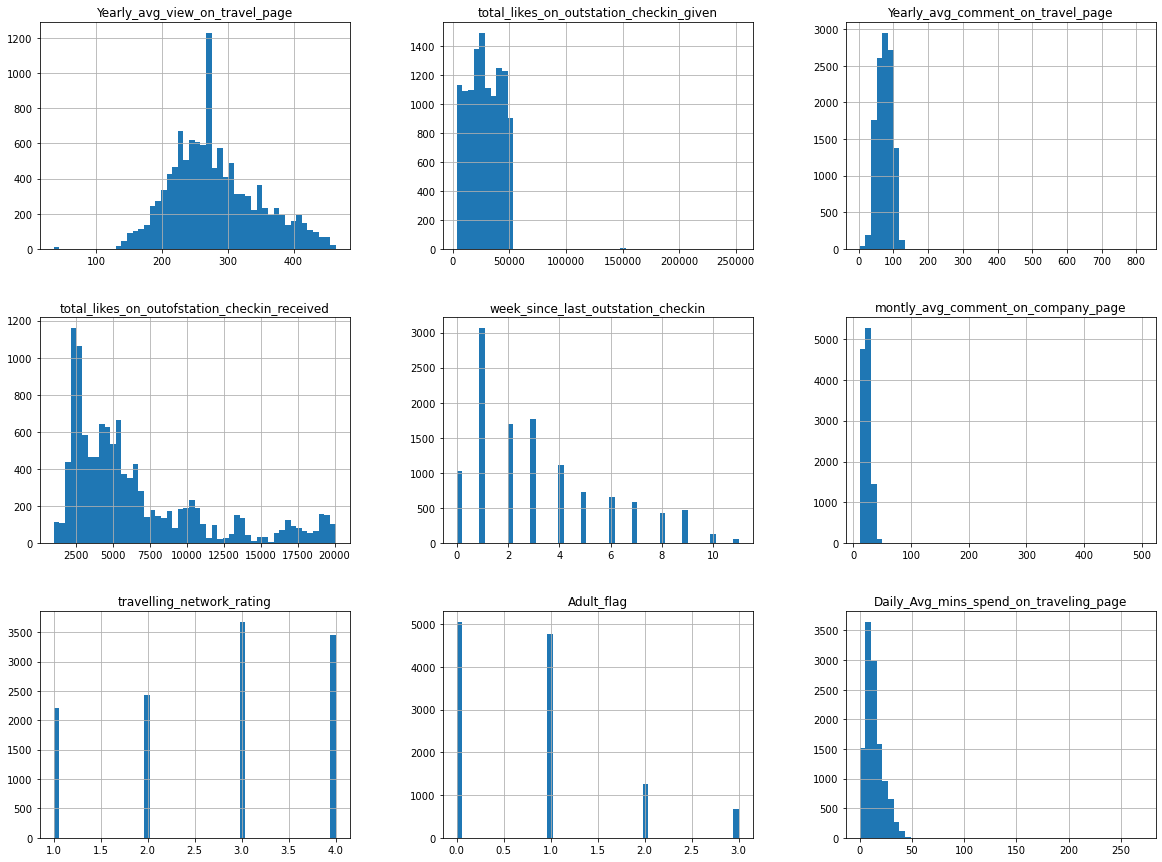

In [18]:
#Performing Univariate Analysis to study the central tendency and dispersion
#Plotting histogram to study distribution
df.hist(bins=50, figsize=(20,15))

**Observations:**

* Yearly_avg_view_on_travel_page is slightly right-skewed. We also see few outliers from 0 to 40. 
* total_likes_on_outstation_checkin_given is left-skewed with few outliers at 150000. 
* Yearly_avg_comment_on_travel_page is heavly right-skwed.
* total_likes_on_outofstation_checkin_received is also right-skewed. However, we see that the majority of likes are between 2000 to 3000.
* montly_avg_comment_on_company_page is left skewed.
* Daily_Avg_mins_spend_on_traveling_page is left skewed.

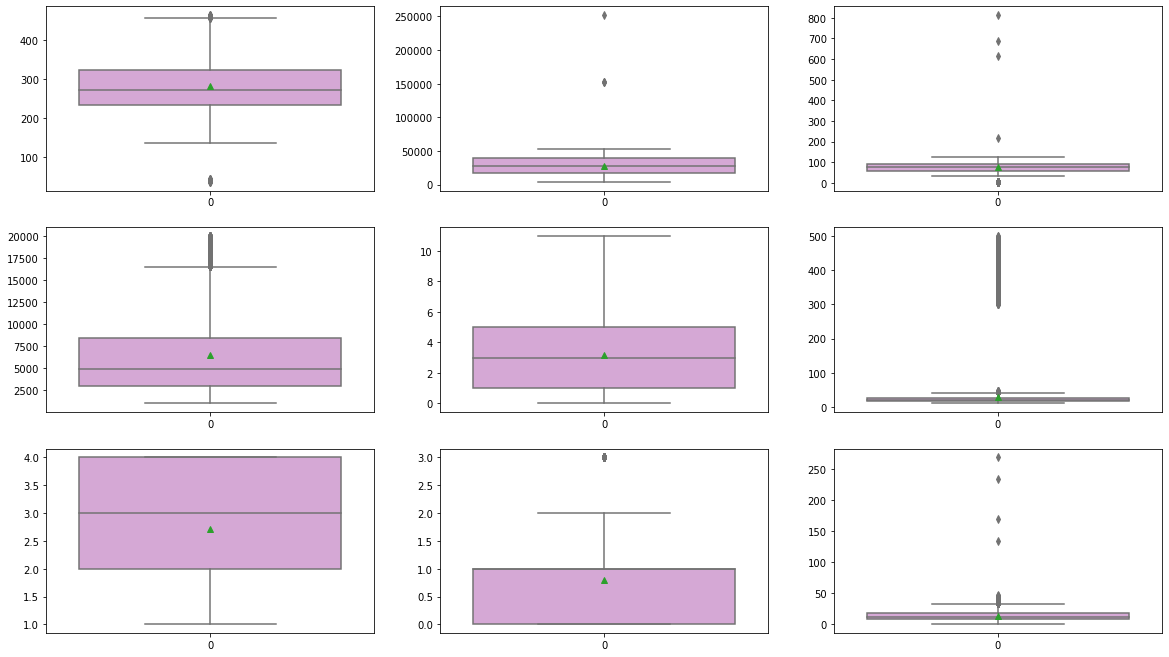

In [19]:
#distribution shown in boxplot
Uni_num = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,40))
for i in range(len(Uni_num)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df[Uni_num[i]],showmeans=True, color="plum")

plt.show()

## 3.2 Univariate Analysis - Categorical Columns:

In [20]:
categorical_val = df.select_dtypes(exclude=np.number).columns.tolist()

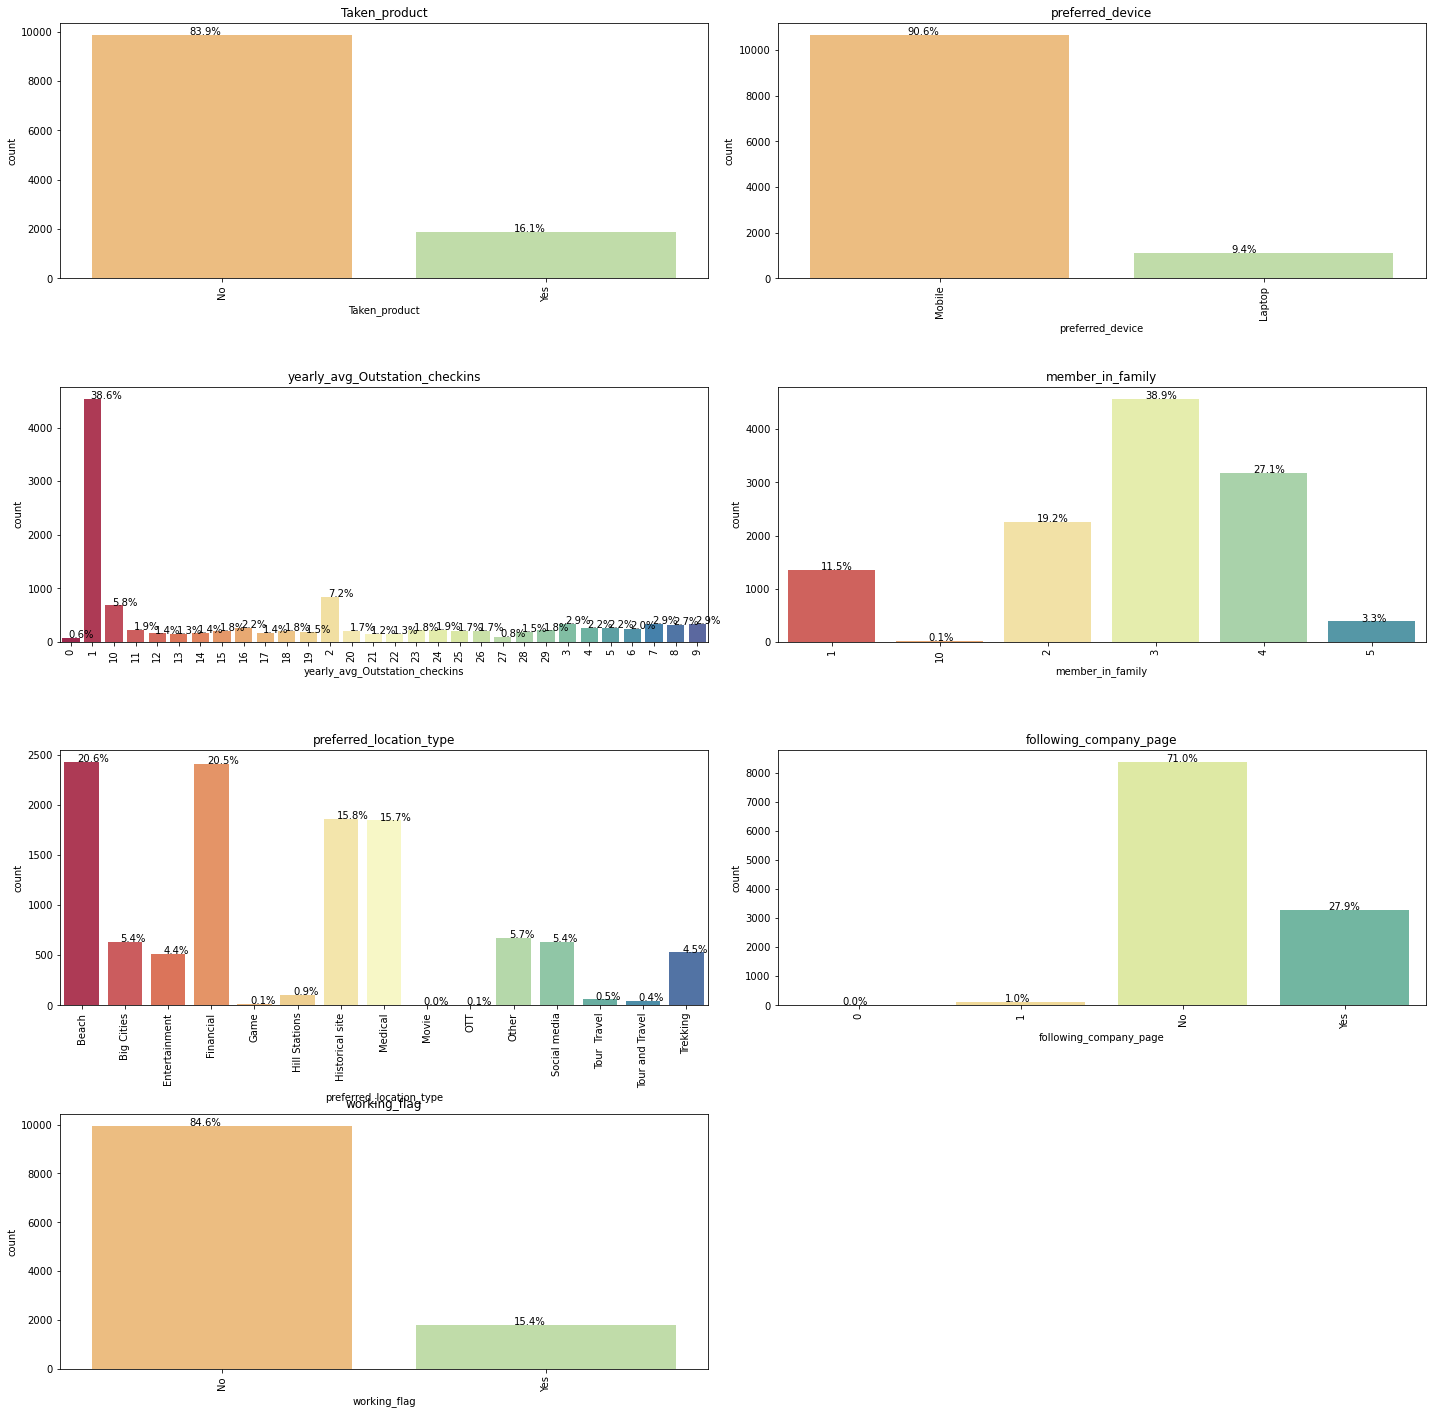

In [21]:
plt.figure(figsize=(20,100))
for i in range(len(categorical_val)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(20,2,i+1)
    ax=sns.countplot(x = df[categorical_val[i]],palette='Spectral')
    plt.tight_layout()
    plt.title(categorical_val[i])
    total = len (df[categorical_val[i]])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + (p.get_width() / 2)-0.1  # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 10,color='black') # To annonate
        plt.xticks(rotation=90)
plt.show()

**Observations:**

* Based on the analysis of the data, it appears that only a small percentage of customers actually end up purchasing a package (16.1%). This suggests that there is a significant imbalance in the dataset and that the company may need to focus on finding ways to increase customer engagement and conversion.

* The majority of customers prefer to use mobile devices for browsing and making purchases (90.6%). This highlights the importance of ensuring that the company's digital platforms are optimized for mobile use.

* The data also shows that the majority of customers have a family size of 3 members (38.9%). This could be used to target marketing efforts towards families, and possibly offer family-specific packages and discounts.

* 84.6% of the customers are not working which can be used to target the advertisement to people who have free time to travel.

* The data also indicates that customers have a preference for beach locations and taking the product for financial or business reason. This can be used to create targeted marketing campaigns and product offerings that align with these preferences.

* Only 27.9% of customers follow the company page, this suggests that the company should focus on increasing their online presence and engagement.

From the above observations, it is clear that there is a heavy imbalance in the dataset and majority of the customers prefer to access the website through mobile and they are unemployed, this can be used to target the advertisement to specific group of customers. Also, beach is the most preferred location to travel so, it can be target to increase the revenue. And we need to focus on the customers who are not following the company's page, as they may not be reached through targeted digital advertising.

## 3.3 Correlation Matrix

In [22]:
corr_matrix = df.corr()
corr_matrix

Yearly_avg_view_on_travel_page  \
Yearly_avg_view_on_travel_page                                      1.000000   
total_likes_on_outstation_checkin_given                             0.010511   
Yearly_avg_comment_on_travel_page                                   0.041777   
total_likes_on_outofstation_checkin_received                        0.484846   
week_since_last_outstation_checkin                                  0.278970   
montly_avg_comment_on_company_page                                 -0.009498   
travelling_network_rating                                           0.056211   
Adult_flag                                                          0.036837   
Daily_Avg_mins_spend_on_traveling_page                              0.580170   

                                              total_likes_on_outstation_checkin_given  \
Yearly_avg_view_on_travel_page                                               0.010511   
total_likes_on_outstation_checkin_given                                      1.000000   
Yearly_avg_comment_on_travel_page                                            0.011995   
total_likes_on_outofstation_checkin_received                                 0.012275   
week_since_last_outstation_checkin                                           0.034838   
montly_avg_comment_on_company_page                                           0.012437   
travelling_network_rating                                                    0.010277   
Adult_flag                                                                   0.039411   
Daily_Avg_mins_spend_on_traveling_page                                       0.008914   

                                              Yearly_avg_comment_on_travel_page  \
Yearly_avg_view_on_travel_page                                         0.041777   
total_likes_on_outstation_checkin_given                                0.011995   
Yearly_avg_comment_on_travel_page                                      1.000000   
total_likes_on_outofstation_checkin_received                          -0.013858   
week_since_last_outstation_checkin                                     0.059039   
montly_avg_comment_on_company_page                                     0.019161   
travelling_network_rating                                              0.007093   
Adult_flag                                                             0.043945   
Daily_Avg_mins_spend_on_traveling_page                                 0.059993   

                                              total_likes_on_outofstation_checkin_received  \
Yearly_avg_view_on_travel_page                                                    0.484846   
total_likes_on_outstation_checkin_given                                           0.012275   
Yearly_avg_comment_on_travel_page                                                -0.013858   
total_likes_on_outofstation_checkin_received                                      1.000000   
week_since_last_outstation_checkin                                                0.144058   
montly_avg_comment_on_company_page                                               -0.005137   
travelling_network_rating                                                         0.025858   
Adult_flag                                                                        0.005418   
Daily_Avg_mins_spend_on_traveling_page                                            0.673410   

                                              week_since_last_outstation_checkin  \
Yearly_avg_view_on_travel_page                                          0.278970   
total_likes_on_outstation_checkin_given                                 0.034838   
Yearly_avg_comment_on_travel_page                                       0.059039   
total_likes_on_outofstation_checkin_received                            0.144058   
week_since_last_outstation_checkin                                      1.000000   
montly_avg_comment_on_company_page                                      0.0319

<AxesSubplot:>

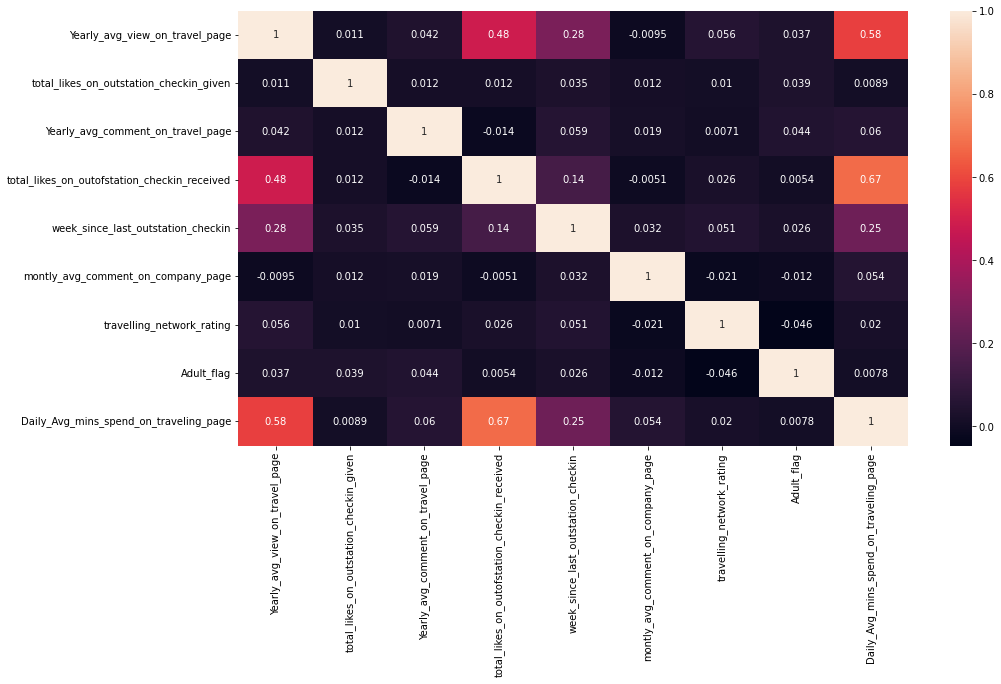

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True)



## 3.4 Bivariate Analysis:
* Let's analyse the dependent variable with all the numerical and categorical features and investigate possible relationships

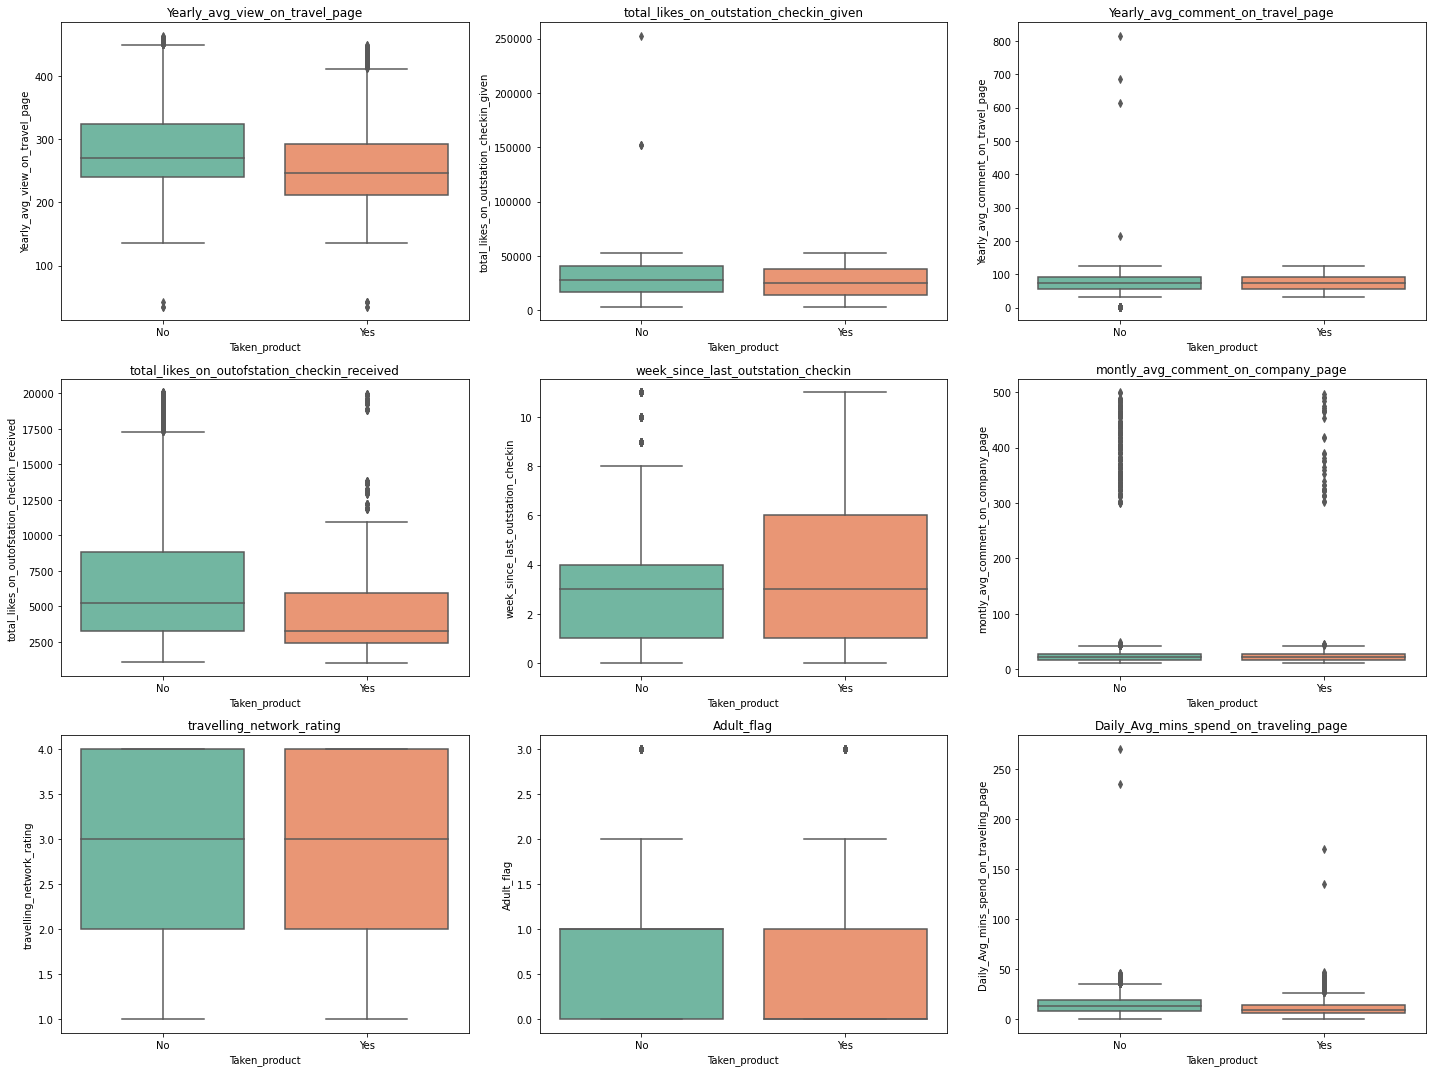

In [26]:
#For all numerical value with Taken_product
plt.figure(figsize=(20,15))
for i, variable in enumerate(Uni_num):
                     plt.subplot(3,3,i+1)
                     sns.boxplot(x= df['Taken_product'],y= df[variable],palette="Set2")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Functions for plot

In [27]:
#Stacked plot of categorical variables with Taken_product
def stacked_plot(x):
    sns.set(palette='Set2')
    tab1 = pd.crosstab(x,df['Taken_product'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Taken_product'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

In [28]:
#Grouped plot of categorical variables with Taken_product
def grouped_plot(x):
    sns.set(palette='Dark2')
    tab1 = pd.crosstab(x,df['Taken_product'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Taken_product'],normalize='index')
    tab.plot(kind='bar',stacked=False,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

In [29]:
#Stacked plot of categorical variables with preferred_device
def device_stacked_plot(x):
    sns.set(palette='Set2')
    tab1 = pd.crosstab(x,df['preferred_device'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['preferred_device'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

Taken_product       No   Yes    All
member_in_family                   
1                 1102   247   1349
10                  10     1     11
2                 1904   352   2256
3                 3784   792   4576
4                 2720   464   3184
5                  344    40    384
All               9864  1896  11760
------------------------------------------------------------------------------------------------------------------------


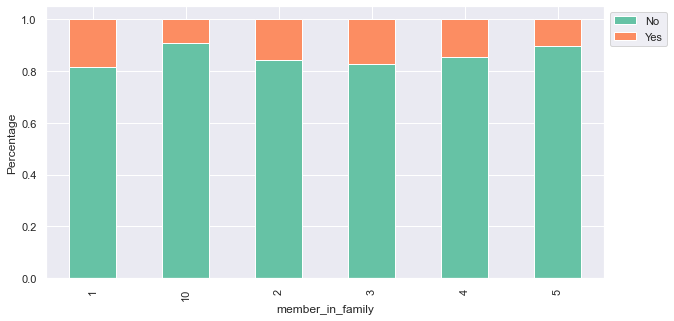

In [30]:
stacked_plot(df.member_in_family)

* The majority of customers, 84.2%, have not purchased travel packages offered by the company, indicating that the dataset is heavily imbalanced towards the "No" class.
* The most common family size for customers is 3, with 32.4% of customers registering this number of family members.
* Customers with a family size of 1 and 2 also have a relatively high proportion of non-purchasers, with 81.8% and 82.8% respectively not purchasing travel packages.
* Customers with a family size of 3, 4, and 5 have a relatively lower proportion of non-purchasers, with 83.3%, 85.7%, and 89.6% respectively not purchasing travel packages.

#### Conclusion 

As the family size increases, the proportion of customers who purchase travel packages increases. It can be concluded that the bigger family size more likely to buy the product.

preferred_device           Laptop  Mobile    All
travelling_network_rating                       
1                             200    2008   2208
2                             196    2228   2424
3                             364    3308   3672
4                             348    3108   3456
All                          1108   10652  11760
------------------------------------------------------------------------------------------------------------------------


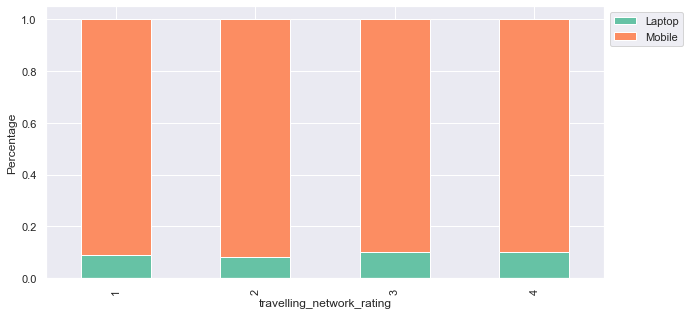

In [31]:
device_stacked_plot(df.travelling_network_rating)

* The majority of users, 90.6%, prefer to access the website via mobile device, while 9.4% prefer to use laptops.
* The travelling network rating seems to have a moderate impact on the device preference. Users with a higher travelling network rating tend to prefer mobile devices more, with 92.4% of users with a rating of 4 using mobile devices.
* Users with a travelling network rating of 1 and 2 prefer laptops more, with about 47% and 48% of users with a rating of 1 and 2 using laptops respectively.
* Overall, the highest percentage of users who purchased travel packages, 18%, are from the group of users who have a travelling network rating of 4, who also prefer mobile devices.

#### Conclusion 
In conclusion, it seems that users who have a higher travelling network rating tend to prefer mobile devices more, while those with lower ratings tend to prefer laptops. This might be because users with higher ratings are more likely to be on-the-go and thus prefer mobile devices for convenience. Also, it's worth noticing that the highest percentage of users who purchased travel packages are from the group who have a travelling network rating of 4, this can be used to target this group of customers.






Taken_product       No   Yes    All
preferred_device                   
Laptop             832   276   1108
Mobile            9032  1620  10652
All               9864  1896  11760
------------------------------------------------------------------------------------------------------------------------


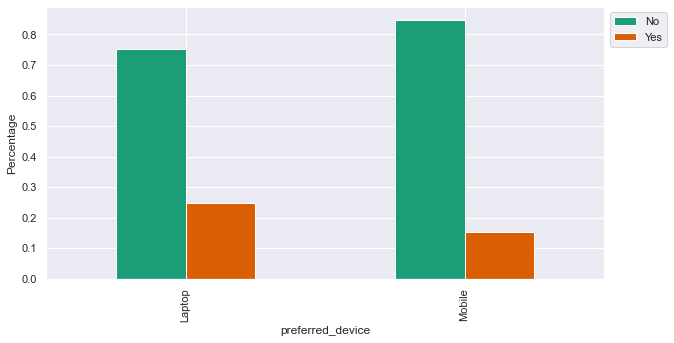

In [32]:
grouped_plot(df.preferred_device)

* The majority of customers, 90.6%, prefer to access the company's services through mobile devices, while 9.4% prefer to use laptops.
* The proportion of customers who purchased a travel package is significantly lower among laptop users (25.0%) compared to mobile users (15.2%).
* This suggests that there may be a difference in the behavior of customers who access the company's services through laptops versus mobile devices, and that mobile users may be less likely to purchase travel packages.

#### Conclusion 
This data insight confirms our previous observations that majority of customers prefer to access the website through mobile and it also shows that customers using laptops are more likely to purchase a travel package than mobile users. This can help the company to target the advertisement to specific group of customers and improve their revenue.

Taken_product    No   Yes    All
working_flag                    
No             8352  1600   9952
Yes            1512   296   1808
All            9864  1896  11760
------------------------------------------------------------------------------------------------------------------------


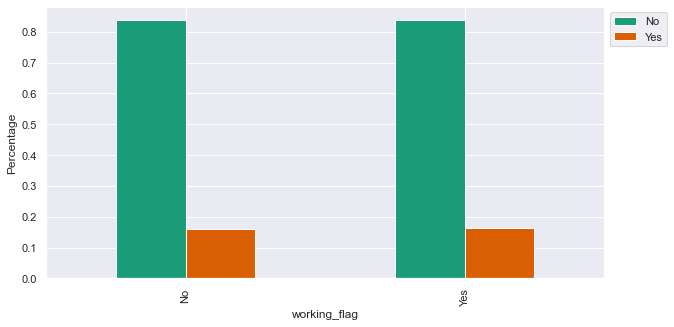

In [33]:
grouped_plot(df.working_flag)

Taken_product              No   Yes    All
preferred_location_type                   
Beach                    2068   356   2424
Big Cities                496   140    636
Entertainment             393   123    516
Financial                2055   354   2409
Game                       11     1     12
Hill Stations              80    28    108
Historical site          1604   252   1856
Medical                  1593   252   1845
Movie                       4     1      5
OTT                         3     4      7
Other                     584    90    674
Social media              494   139    633
Tour  Travel               46    14     60
Tour and Travel            33    14     47
Trekking                  400   128    528
All                      9864  1896  11760
------------------------------------------------------------------------------------------------------------------------


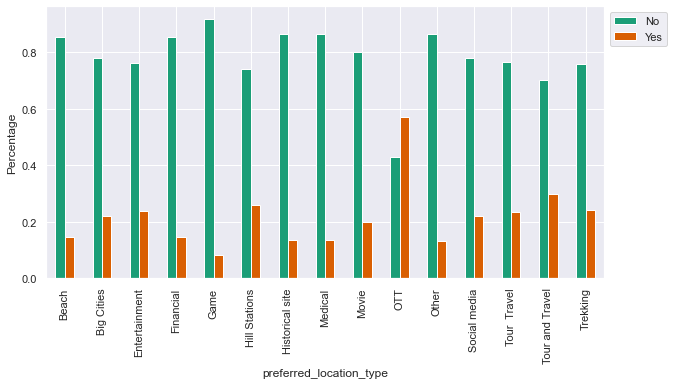

In [34]:
grouped_plot(df.preferred_location_type)

* The most number of customers preferred location for travel is Beach (20.6%) and Financial (20.5%) reason is the most preferred reason for taking the product.
* Among the customers who login through mobile, majority of them (16.1%) have purchased travel packages offered by the company.
* The customers who login through mobile and prefer beach for travel are more likely to purchase the travel package offered by the company.

#### Conclusion 
From the above observations, it is clear that Beach is the most preferred location for travel, and financial reason is the most preferred reason for taking the product. Also, we know that the majority of customers (90.6%) preferred to access the website through mobile. Combining these insights, we can see that the customers who login through mobile and prefer beach for travel are more likely to purchase the travel package offered by the company. This can be used to target the advertisement to specific group of customers and increase the revenue.

# 4. Outliers Detection : 

In [35]:
#Let's find the percentage of outliers using IQR

In [36]:
Q1 = df.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [37]:
outlier_num = df.select_dtypes(include=np.number)

In [38]:
outlier_out = ((outlier_num<lower)|(outlier_num>upper)).sum()/len(df)*100
outlier_out

Yearly_avg_view_on_travel_page                  0.246599
total_likes_on_outstation_checkin_given         0.034014
Yearly_avg_comment_on_travel_page               0.340136
total_likes_on_outofstation_checkin_received    7.789116
week_since_last_outstation_checkin              0.000000
montly_avg_comment_on_company_page              2.057823
travelling_network_rating                       0.000000
Adult_flag                                      5.782313
Daily_Avg_mins_spend_on_traveling_page          2.976190
dtype: float64

* Customers who have higher views on travel-related pages have a higher chance of buying the travel package.
* The number of likes given on outstation check-ins has a small correlation with buying the package.
* Customers who have higher comments on travel-related pages also have a higher chance of buying the package.
* The number of likes received on outstation check-ins has a high correlation with buying the package.
* The number of weeks since last outstation check-in and travelling network rating have no correlation with buying the package.
* Customers who have higher comments on the company page have a higher chance of buying the package.
* Adult customers have a higher chance of buying the package.
* Customers who spend more time on the company page have a higher chance of buying the package.

### Conclusion 
From the above observations, it is clear that, customer's engagement with the company's page and travel-related page is positively correlated with the target variable i.e, buying the travel package. Also, the number of likes received on outstation check-ins has a high correlation with buying the package and it could be an outlier and should be analyzed further.
Also, the number of weeks since last outstation check-in and travelling network rating have no correlation with buying the package. This means, these variables are not important for this problem and can be removed from the dataset.

* While building a predictive model for this project, we will not be treating outliers. This is because the Decision Tree based models are not affected by outliers, as they work by building a tree structure of decisions to make predictions. Moreover, Decision Tree models can handle outliers well as they split the data based on the feature values.

* Additionally, it's important to consider that in real-world scenarios, outliers are common and it could be an indication of valuable information. Therefore, it's essential to investigate these outliers further to identify any patterns among customers that could be valuable for the business. In this case, for example, the high correlation of total_likes_on_outofstation_checkin_received with the target variable could be an indication of a valuable customer segment that likes to check-in frequently. Therefore, we will not treat the outliers but investigate them further to identify any valuable information.





# 5. Encoding of columns

Encoding of target variable.

In [39]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
print("Before encoding:", df['Taken_product'].unique())
# Encode labels in column 'Taken_product'.
df['Taken_product']= label_encoder.fit_transform(df['Taken_product'])
 
print("After encoding:", df['Taken_product'].unique())

Before encoding: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
After encoding: [1 0]


Encoding 'following_company_page'

In [40]:
print("Before encoding:", df['following_company_page'].unique())
# Encode labels in column 'following_company_page'.
df['following_company_page']= label_encoder.fit_transform(df['following_company_page'])
 
print("After encoding:", df['following_company_page'].unique())

Before encoding: ['Yes', 'No', '1', '0']
Categories (4, object): ['0', '1', 'No', 'Yes']
After encoding: [3 2 1 0]


Encoding 'working_flag'

In [41]:
print("Before encoding:", df['working_flag'].unique())
# Encode labels in column 'following_company_page'.
df['working_flag']= label_encoder.fit_transform(df['working_flag'])
 
print("After encoding:", df['working_flag'].unique())

Before encoding: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
After encoding: [0 1]


Encoding 'preferred_location_type'

In [42]:
print("Before encoding:", df['preferred_location_type'].unique())
# Encode labels in column 'following_company_page'.
df['preferred_location_type']= label_encoder.fit_transform(df['preferred_location_type'])
 
print("After encoding:", df['preferred_location_type'].unique())

Before encoding: ['Financial', 'Other', 'Medical', 'Game', 'Social media', ..., 'Beach', 'Historical site', 'Big Cities', 'Trekking', 'Hill Stations']
Length: 15
Categories (15, object): ['Beach', 'Big Cities', 'Entertainment', 'Financial', ..., 'Social media', 'Tour  Travel', 'Tour and Travel', 'Trekking']
After encoding: [ 3 10  7  4 11  2 13  8  9 12  0  6  1 14  5]


In [43]:
df.head()

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0              1                           307.0           Mobile   
1              0                           367.0           Mobile   
2              1                           277.0           Mobile   
3              0                           247.0           Mobile   
4              0                           202.0           Mobile   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family  preferred_location_type  \
0                2                        3   
1                1                        3   
2                2                       10   
3                4                        3   
4                1                        7   

   Yearly_avg_comment_on_travel_page  \
0                               94.0   
1                               61.0   
2                               92.0   
3                               56.0   
4                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin  following_company_page  \
0                                   8                       3   
1                                   1                       2   
2                                   6                       3   
3                                   1                       3   
4                                   9                       2   

   montly_avg_comment_on_company_page  working_flag  \
0                                  11             0   
1                                  23             1   
2                                  15             0   
3                                  11             0   
4                                  12             0   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  
0                                       8  
1                                      10  
2                                       7  
3                                       8  
4                                       6

# 6. Dividing the dataset for Mobile and Laptop.

In [44]:
df['preferred_device'].unique()

array(['Mobile', 'Laptop'], dtype=object)

In [45]:
df_mobile = df.loc[df['preferred_device'] == 'Mobile']
df_laptop = df.loc[df['preferred_device'] == 'Laptop']
df_mobile['preferred_device'].unique()

array(['Mobile'], dtype=object)

In [46]:
df_laptop['preferred_device'].unique()

array(['Laptop'], dtype=object)

We can see that we have successfully divided the dataset.

## 6.1 Correlation Matrix for Mobile.

In [47]:
df_mobile.corr()

Taken_product  \
Taken_product                                      1.000000   
Yearly_avg_view_on_travel_page                    -0.140315   
total_likes_on_outstation_checkin_given           -0.043430   
preferred_location_type                            0.032725   
Yearly_avg_comment_on_travel_page                 -0.013821   
total_likes_on_outofstation_checkin_received      -0.148513   
week_since_last_outstation_checkin                 0.046916   
following_company_page                             0.229510   
montly_avg_comment_on_company_page                 0.002119   
working_flag                                       0.003648   
travelling_network_rating                         -0.038472   
Adult_flag                                        -0.135546   
Daily_Avg_mins_spend_on_traveling_page            -0.131623   

                                              Yearly_avg_view_on_travel_page  \
Taken_product                                                      -0.140315   
Yearly_avg_view_on_travel_page                                      1.000000   
total_likes_on_outstation_checkin_given                             0.003746   
preferred_location_type                                            -0.038103   
Yearly_avg_comment_on_travel_page                                   0.041081   
total_likes_on_outofstation_checkin_received                        0.486562   
week_since_last_outstation_checkin                                  0.279545   
following_company_page                                              0.037315   
montly_avg_comment_on_company_page                                 -0.009937   
working_flag                                                        0.005009   
travelling_network_rating                                           0.052839   
Adult_flag                                                          0.036350   
Daily_Avg_mins_spend_on_traveling_page                              0.574668   

                                              total_likes_on_outstation_checkin_given  \
Taken_product                                                               -0.043430   
Yearly_avg_view_on_travel_page                                               0.003746   
total_likes_on_outstation_checkin_given                                      1.000000   
preferred_location_type                                                      0.001154   
Yearly_avg_comment_on_travel_page                                            0.004618   
total_likes_on_outofstation_checkin_received                                 0.014599   
week_since_last_outstation_checkin                                           0.039155   
following_company_page                                                       0.017890   
montly_avg_comment_on_company_page                                           0.012036   
working_flag                                                                -0.000361   
travelling_network_rating                                                    0.007092   
Adult_flag                                                                   0.044314   
Daily_Avg_mins_spend_on_traveling_page                                       0.007456   

                                              preferred_location_type  \
Taken_product                                                0.032725   
Yearly_avg_view_on_travel_page                              -0.038103   
total_likes_on_outstation_checkin_given                      0.001154   
preferred_location_type                                      1.000000   
Yearly_avg_comment_on_travel_page                           -0.071119   
total_likes_on_outofstation_checkin_received                 0.001716   
week_since_last_outstation_checkin                          -0.002096   
following_company_page                                       0.010965   
montly_avg_comment_on_company_page                           0.004380   
working_flag                                                -0.01

## 6.2 Correlation Matrix for Laptop.

In [48]:
df_laptop.corr()

Taken_product  \
Taken_product                                      1.000000   
Yearly_avg_view_on_travel_page                    -0.242961   
total_likes_on_outstation_checkin_given           -0.142125   
preferred_location_type                            0.039108   
Yearly_avg_comment_on_travel_page                  0.041578   
total_likes_on_outofstation_checkin_received      -0.252337   
week_since_last_outstation_checkin                 0.047308   
following_company_page                             0.262993   
montly_avg_comment_on_company_page                -0.014207   
working_flag                                      -0.010284   
travelling_network_rating                         -0.120412   
Adult_flag                                        -0.149352   
Daily_Avg_mins_spend_on_traveling_page            -0.252032   

                                              Yearly_avg_view_on_travel_page  \
Taken_product                                                      -0.242961   
Yearly_avg_view_on_travel_page                                      1.000000   
total_likes_on_outstation_checkin_given                             0.083454   
preferred_location_type                                            -0.065166   
Yearly_avg_comment_on_travel_page                                   0.046342   
total_likes_on_outofstation_checkin_received                        0.470272   
week_since_last_outstation_checkin                                  0.276618   
following_company_page                                              0.002703   
montly_avg_comment_on_company_page                                  0.009887   
working_flag                                                        0.006644   
travelling_network_rating                                           0.088335   
Adult_flag                                                          0.042965   
Daily_Avg_mins_spend_on_traveling_page                              0.644598   

                                              total_likes_on_outstation_checkin_given  \
Taken_product                                                               -0.142125   
Yearly_avg_view_on_travel_page                                               0.083454   
total_likes_on_outstation_checkin_given                                      1.000000   
preferred_location_type                                                      0.029842   
Yearly_avg_comment_on_travel_page                                            0.102823   
total_likes_on_outofstation_checkin_received                                -0.015840   
week_since_last_outstation_checkin                                          -0.014339   
following_company_page                                                      -0.004343   
montly_avg_comment_on_company_page                                           0.070092   
working_flag                                                                 0.001505   
travelling_network_rating                                                    0.044958   
Adult_flag                                                                  -0.013489   
Daily_Avg_mins_spend_on_traveling_page                                       0.024919   

                                              preferred_location_type  \
Taken_product                                                0.039108   
Yearly_avg_view_on_travel_page                              -0.065166   
total_likes_on_outstation_checkin_given                      0.029842   
preferred_location_type                                      1.000000   
Yearly_avg_comment_on_travel_page                           -0.002728   
total_likes_on_outofstation_checkin_received                -0.114884   
week_since_last_outstation_checkin                          -0.015379   
following_company_page                                       0.007902   
montly_avg_comment_on_company_page                           0.025546   
working_flag                                                 0.02

# 7. Train and Splits 80:20 ratio

## 7.1 Model training for mobile.

Dropping columns/features that have very low correlation with the target variables.

In [49]:
df_mobile.drop(['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
         'total_likes_on_outofstation_checkin_received','Yearly_avg_comment_on_travel_page', 'montly_avg_comment_on_company_page',
        'working_flag', 'travelling_network_rating', 'Adult_flag', 'Daily_Avg_mins_spend_on_traveling_page'],
               inplace=True, axis='columns')

In [50]:
df_mobile.drop(['preferred_device'],inplace=True, axis='columns')

In [51]:
df_mobile.shape

(10652, 6)

### 7.1.1 Train & Test splits.

In [52]:
from sklearn.model_selection import train_test_split

train_mobile, test_mobile = train_test_split(df_mobile, test_size=0.2)

In [53]:
train_mobile.shape

(8521, 6)

In [54]:
test_mobile.shape

(2131, 6)

In [55]:
X_train_mobile = train_mobile.drop(['Taken_product'], axis='columns')
y_train_mobile = train_mobile['Taken_product']
y_train_mobile.head()

7996    0
6549    1
6646    0
4421    0
5598    0
Name: Taken_product, dtype: int64

In [56]:
X_test_mobile = test_mobile.drop(['Taken_product'], axis='columns')
y_test_mobile = test_mobile['Taken_product']
y_test_mobile.head()

4277     0
5244     0
3867     0
3943     0
10026    0
Name: Taken_product, dtype: int64

# 8. **Model Building:**

## **Model Evaluation Criterion**
**Model can make two kinds of wrong predictions:**
1. Predicting that the customer will purchase a Travel Package when they dont. - False Positive
2. Predicting that the customer will not purchase a Travel Package when they do. - False Negative

**Metric for Optimization:**
* For the above objective, its important that both False positive and False negative values are low. Hence we would want the F1-Score to be maximized.
* The greater the F1-Score, greater the chances of predicting both classes correctly.


## 8.1 **Creating a Confusion Matrix**

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

def make_confusion_matrix(y_actual,y_predict):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    sns.set(font_scale=2.0) # to set font size for the matrix
    cm=confusion_matrix(y_actual,y_predict)
    group_names = ['True -ve','False +ve','False -ve','True +ve']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=labels,fmt='',cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Function for score - mobile

In [58]:
def scores(model,flag=True):
    """ model : classifier to predict X values """
    score_list=[] # creating an empty list to store the accuracy and f1(metric of interst)
    
    y_pred_train = model.predict(X_train_mobile)
    y_pred_test = model.predict(X_test_mobile)
    
    train_acc = metrics.accuracy_score(y_train_mobile,y_pred_train)
    test_acc = metrics.accuracy_score(y_test_mobile,y_pred_test)
    
    train_f1 = metrics.f1_score(y_train_mobile,y_pred_train)
    test_f1 = metrics.f1_score(y_test_mobile,y_pred_test)
    score_list.extend((train_acc,test_acc,train_f1,test_f1))
    
    if flag== True:
        print("Accuracy on training set : ",metrics.accuracy_score(y_train_mobile,y_pred_train))
        print("Accuracy on test set : ",metrics.accuracy_score(y_test_mobile,y_pred_test))

        print("\nRecall on training set : ",metrics.recall_score(y_train_mobile,y_pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test_mobile,y_pred_test))
    
        print("\nPrecision on training set : ",metrics.precision_score(y_train_mobile,y_pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test_mobile,y_pred_test))
    
        print("\nF1 on training set : ",metrics.f1_score(y_train_mobile,y_pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test_mobile,y_pred_test))
    elif flag == False:
        return score_list #return this when flag is False

### Function for score - Laptop

In [59]:
def scores_l(model,flag=True):
    """ model : classifier to predict X values """
    score_list=[] # creating an empty list to store the accuracy and f1(metric of interst)

    y_pred_train = model.predict(X_train_laptop)
    y_pred_test = model.predict(X_test_laptop)
    
    train_acc = metrics.accuracy_score(y_train_laptop,y_pred_train)
    test_acc = metrics.accuracy_score(y_test_laptop,y_pred_test)
    
    train_f1 = metrics.f1_score(y_train_laptop,y_pred_train)
    test_f1 = metrics.f1_score(y_test_laptop,y_pred_test)
    score_list.extend((train_acc,test_acc,train_f1,test_f1))
    
    if flag== True:
        print("Accuracy on training set : ",metrics.accuracy_score(y_train_laptop,y_pred_train))
        print("Accuracy on test set : ",metrics.accuracy_score(y_test_laptop,y_pred_test))

        print("\nRecall on training set : ",metrics.recall_score(y_train_laptop,y_pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test_laptop,y_pred_test))
    
        print("\nPrecision on training set : ",metrics.precision_score(y_train_laptop,y_pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test_laptop,y_pred_test))
    
        print("\nF1 on training set : ",metrics.f1_score(y_train_laptop,y_pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test_laptop,y_pred_test))
    elif flag == False:
        return score_list #return this when flag is False

# 9.  **Building the Model:**
* We will start with a **Decision Tree model**
* Next, we will build two **ensemble model** - Random Forest Classifier and Bagging Classifier
* Then, we will build one **Boosting ensemble models** - XG Boost, ADABoost and GradientBoost
* Then, we will build one **statistical model** - Logistic Regression and Linear discriminant analysis
* We will first build them with their default parameters and later hypertune them for optimization.
* We will also calculate all four metrics; Accuracy, Recall, Precision and F1Score which is the metric of interest.
* F1Score is the weighted average of Precision and Recall. Its takes both False positives and False negatives into account.




## 9.1 **Decision Tree Model**

We will keep the same randomstate = 25 for all the models so that the same random values are chosen

In [60]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()

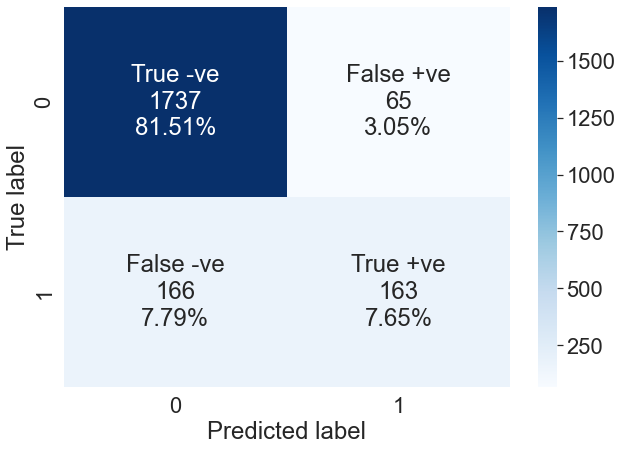

In [61]:
Dt.fit(X_train_mobile, y_train_mobile) #fit the train set to Decision tree
y_predict = Dt.predict(X_test_mobile) 
make_confusion_matrix(y_test_mobile, y_predict)

In [62]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict)
auc_roc

0.7296848486484115

In [63]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7296848486484115

Text(0.5, 0, 'False Positive Rate')

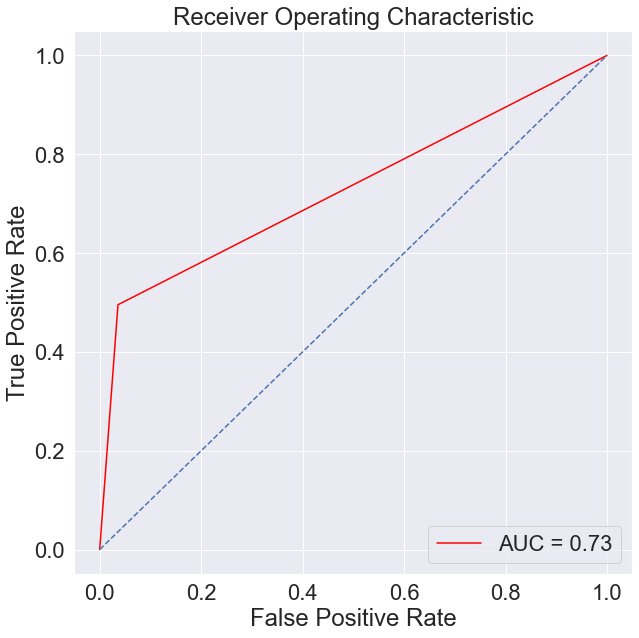

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [65]:
scores(Dt)

Accuracy on training set :  0.937918084731839
Accuracy on test set :  0.8916001877053027

Recall on training set :  0.6413632842757552
Recall on test set :  0.49544072948328266

Precision on training set :  0.9261744966442953
Precision on test set :  0.7149122807017544

F1 on training set :  0.7578947368421052
F1 on test set :  0.585278276481149


## 9.2 **Ensemble model**
### 9.2.1 **Random Forest Classifier**

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train_mobile,y_train_mobile)


RandomForestClassifier(random_state=25)

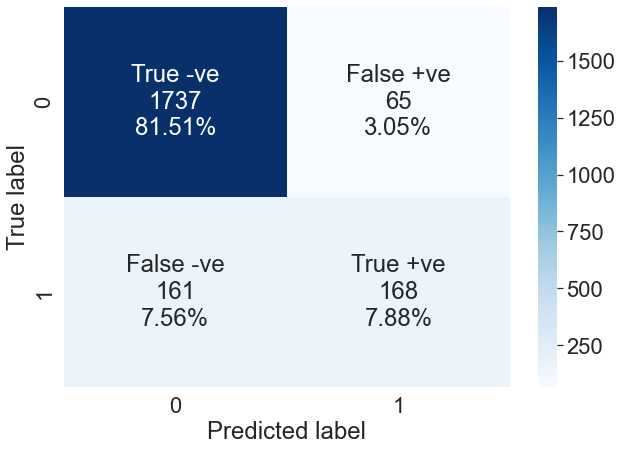

In [68]:
y_predict = random_forest.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [69]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.7372836328429404

In [70]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7372836328429404

Text(0.5, 0, 'False Positive Rate')

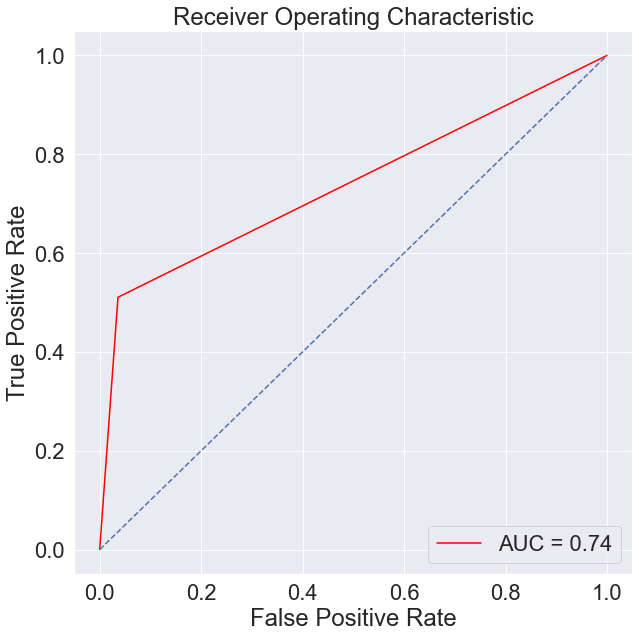

In [71]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [72]:
scores(random_forest)

Accuracy on training set :  0.937918084731839
Accuracy on test set :  0.8939465039887377

Recall on training set :  0.6785437645236251
Recall on test set :  0.5106382978723404

Precision on training set :  0.8848484848484849
Precision on test set :  0.721030042918455

F1 on training set :  0.7680841736080666
F1 on test set :  0.597864768683274


#### Feature Importances

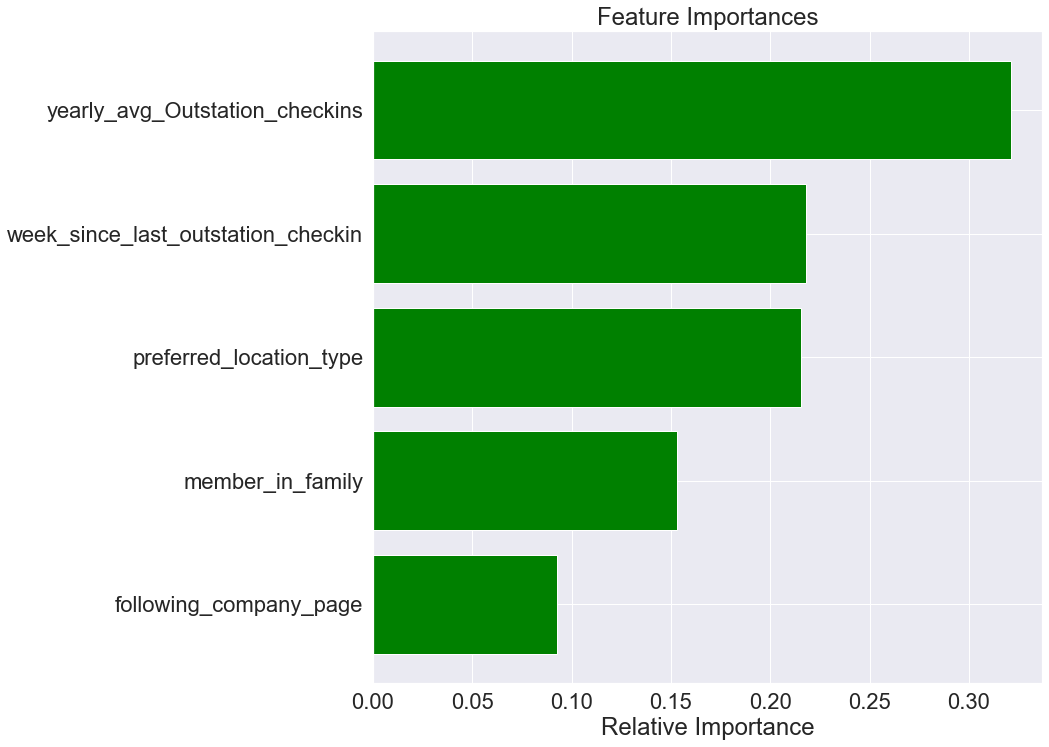

In [73]:
feature_names = X_train_mobile.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()




### 9.2.1.1 **Random Forest Classifier with weights**

In [74]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=25)
random_forest_wt.fit(X_train_mobile,y_train_mobile)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=25)

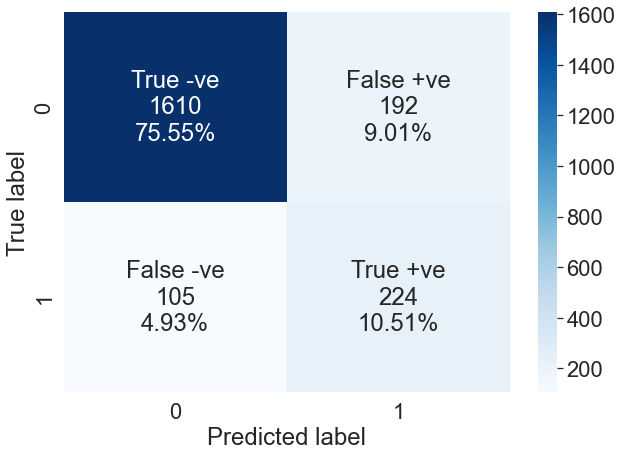

In [75]:
y_predict = random_forest_wt.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [76]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.7871513920702765

In [77]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7871513920702765

Text(0.5, 0, 'False Positive Rate')

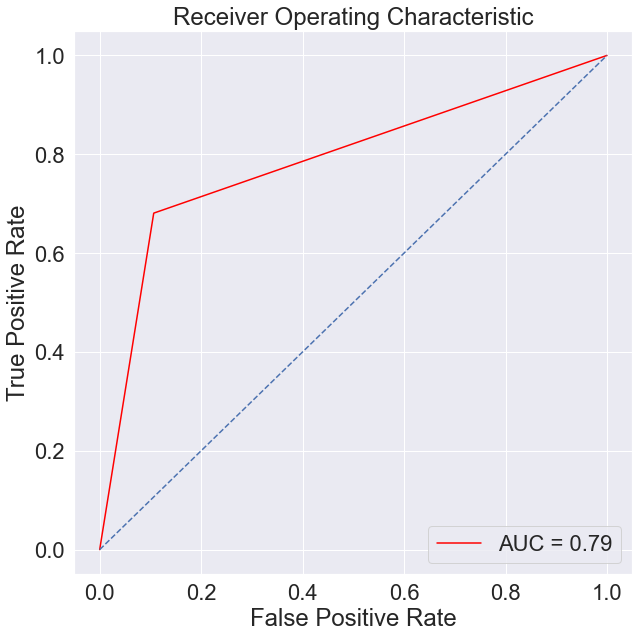

In [78]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [79]:
scores(random_forest_wt)

Accuracy on training set :  0.9079920197159957
Accuracy on test set :  0.8606288127639605

Recall on training set :  0.879163439194423
Recall on test set :  0.6808510638297872

Precision on training set :  0.6437889960294951
Precision on test set :  0.5384615384615384

F1 on training set :  0.7432874918140144
F1 on test set :  0.6013422818791946


* There is no improvement in the metrics for the weighted Random Forest classifier.


## 9.2.2 **GridSearch for Hyperparameter Tuning of the models:**
* Hyperparameters are variables that control the network structure of the Decision tree.
* As there is no direct way to calculate the effects of value change in hyperparamter has on the model, we will use a GridSearch
* This is a tuning technique that will compute the optimum values of specific hyperparameters of the model
* The parameters are optimized using a cross-validated GridSearch over a parameter grid


**Hyperparameters for Decision Tree Model**



In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train_mobile, y_train_mobile)


DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=3, min_samples_leaf=2,
                       random_state=25)

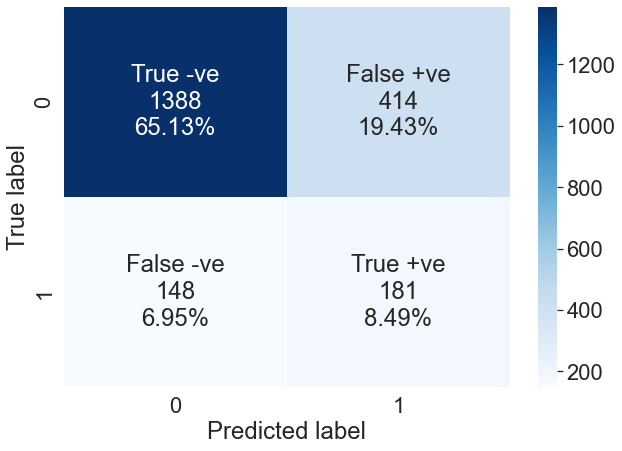

In [82]:
y_predict = classifier.predict(X_test_mobile) 
make_confusion_matrix(y_test_mobile,y_predict) 


In [83]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.6602036238019897

In [84]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6602036238019897

Text(0.5, 0, 'False Positive Rate')

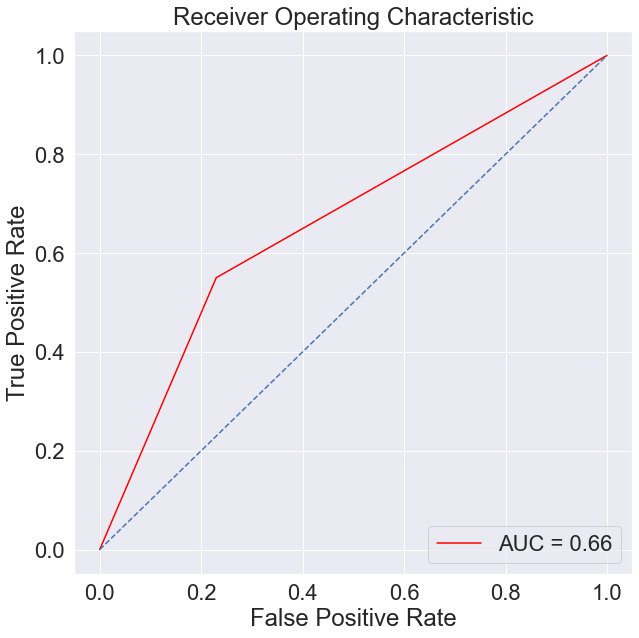

In [85]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [86]:
scores(classifier)

Accuracy on training set :  0.7323084145053398
Accuracy on test set :  0.7362740497419052

Recall on training set :  0.5251742835011619
Recall on test set :  0.5501519756838906

Precision on training set :  0.289002557544757
Precision on test set :  0.3042016806722689

F1 on training set :  0.3728347539180643
F1 on test set :  0.3917748917748918


* The F1Score has decreased to 0.38 for Train set and 0.36 for test set. 


In [87]:
X_train_mobile['yearly_avg_Outstation_checkins'] = X_train_mobile['yearly_avg_Outstation_checkins'].astype('int')
X_train_mobile['member_in_family'] = X_train_mobile['member_in_family'].astype('int')
X_test_mobile['yearly_avg_Outstation_checkins'] = X_test_mobile['yearly_avg_Outstation_checkins'].astype('int')
X_test_mobile['member_in_family'] = X_test_mobile['member_in_family'].astype('int')

## 9.3 Boosting Model:


### 9.3.1 **XGBoost Classifier**

In [88]:
from xgboost import XGBClassifier

In [89]:
XG_boost = XGBClassifier(random_state=25, eval_metric='logloss')
XG_boost.fit(X_train_mobile,y_train_mobile)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=25,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

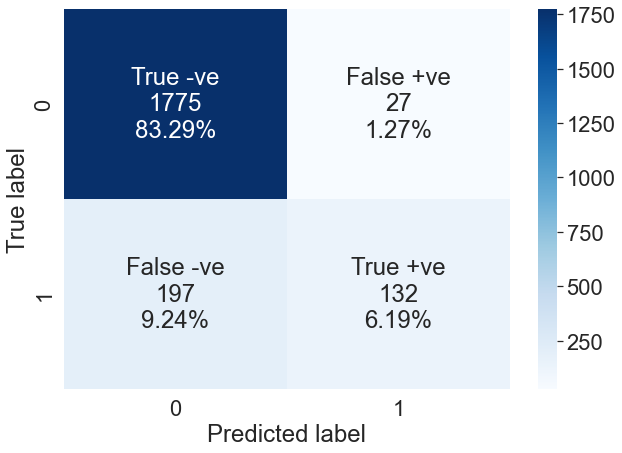

In [90]:
y_predict = XG_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [91]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.693116226819913

In [92]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.693116226819913

Text(0.5, 0, 'False Positive Rate')

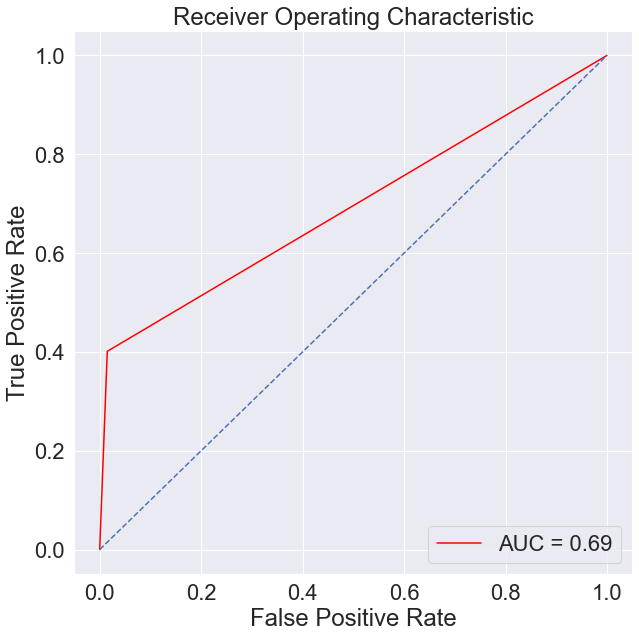

In [93]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [94]:
scores(XG_boost)

Accuracy on training set :  0.9199624457223331
Accuracy on test set :  0.8948850305021117

Recall on training set :  0.5197521301316809
Recall on test set :  0.4012158054711246

Precision on training set :  0.9154160982264665
Precision on test set :  0.8301886792452831

F1 on training set :  0.6630434782608695
F1 on test set :  0.5409836065573771





### 9.3.1.1 GridSearch for Hyperparameter Tuning of the Boosting model:

**Hyperparameters for XGBoost** 

In [95]:
xgb_tuned = XGBClassifier(random_state=25, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
     "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_mobile, y_train_mobile)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.55, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=25, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

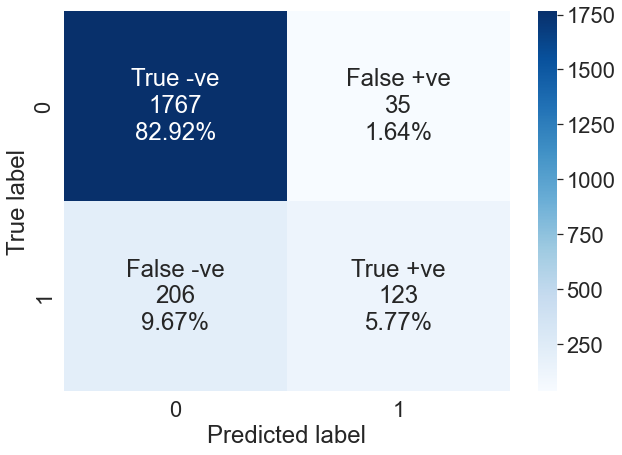

In [96]:
y_predict = xgb_tuned.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)


In [97]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.677218659442902

In [98]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.677218659442902

Text(0.5, 0, 'False Positive Rate')

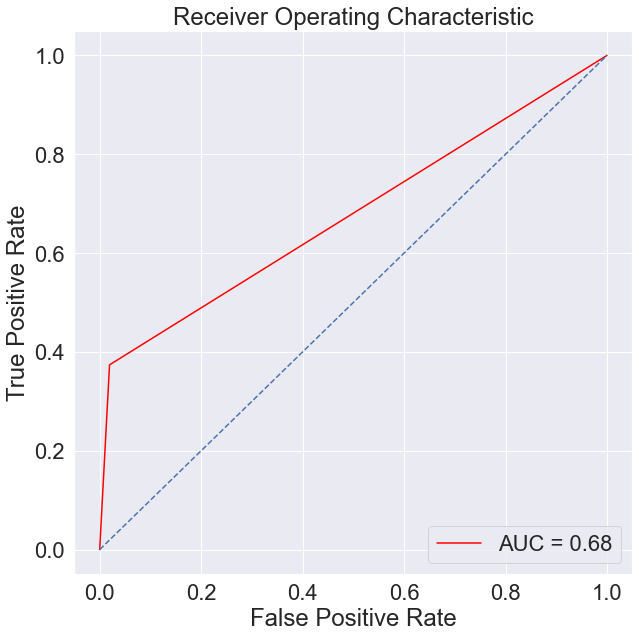

In [99]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [100]:
scores(xgb_tuned)

Accuracy on training set :  0.9129210186597817
Accuracy on test set :  0.8869075551384327

Recall on training set :  0.4903175832687839
Recall on test set :  0.3738601823708207

Precision on training set :  0.8828451882845189
Precision on test set :  0.7784810126582279

F1 on training set :  0.6304780876494024
F1 on test set :  0.5051334702258727


* The accuracy and F1score has increased.


## 9.4 Statistical model 

### 9.4.1 **LogisticRegression** 

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
logreg = LogisticRegression()
logreg.fit(X_train_mobile, y_train_mobile)

LogisticRegression()

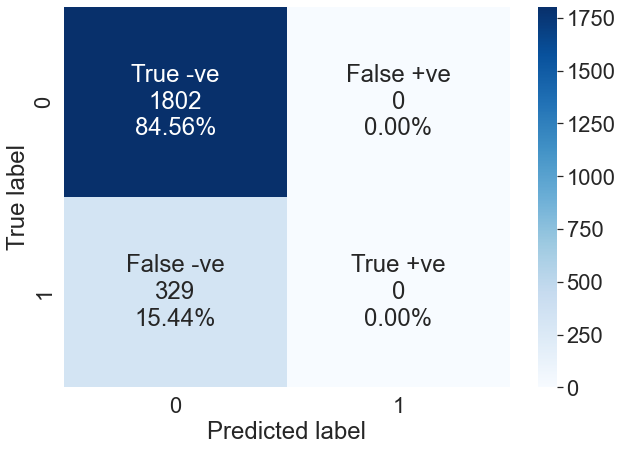

In [103]:
y_predict = logreg.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [104]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5

In [105]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

Text(0.5, 0, 'False Positive Rate')

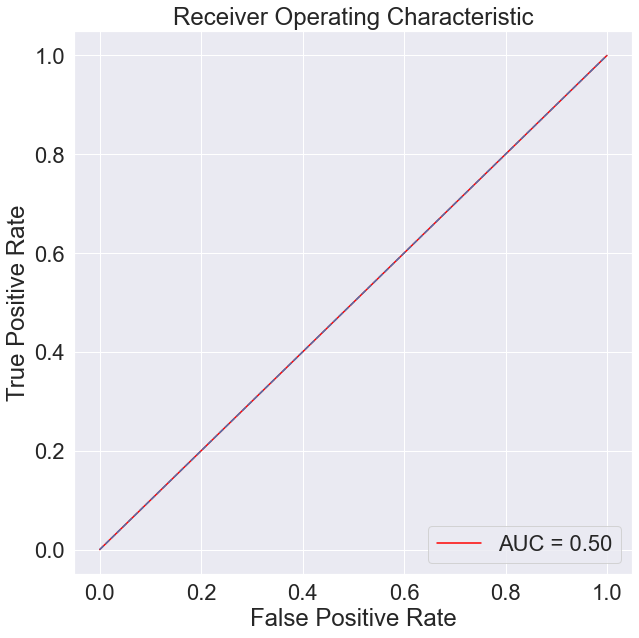

In [106]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [107]:
scores(logreg)

Accuracy on training set :  0.8490787466259828
Accuracy on test set :  0.8456123885499766

Recall on training set :  0.0038729666924864447
Recall on test set :  0.0

Precision on training set :  1.0
Precision on test set :  0.0

F1 on training set :  0.00771604938271605
F1 on test set :  0.0


In [108]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_mobile, y_test_mobile)))


Accuracy of logistic regression classifier on test set: 0.85


### 9.3.2 ADA Boost

In [109]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

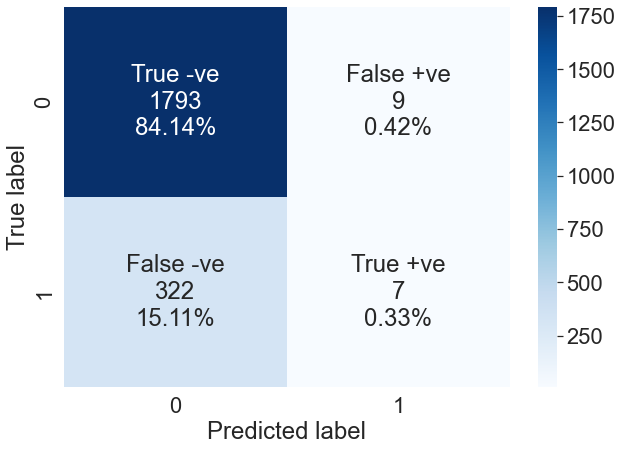

In [110]:
Ada_boost = AdaBoostClassifier(random_state=25)
Ada_boost.fit(X_train_mobile, y_train_mobile)
y_pred = Ada_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_pred)

In [111]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5

In [112]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

Text(0.5, 0, 'False Positive Rate')

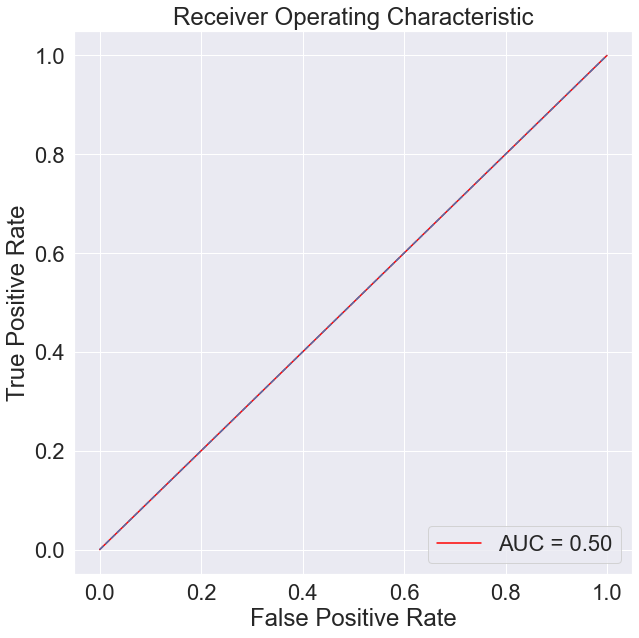

In [113]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [114]:
scores(Ada_boost)

Accuracy on training set :  0.851660603215585
Accuracy on test set :  0.8446738620366026

Recall on training set :  0.038729666924864445
Recall on test set :  0.02127659574468085

Precision on training set :  0.684931506849315
Precision on test set :  0.4375

F1 on training set :  0.07331378299120235
F1 on test set :  0.04057971014492753


### 9.3.3 Gradient Boost Classifier

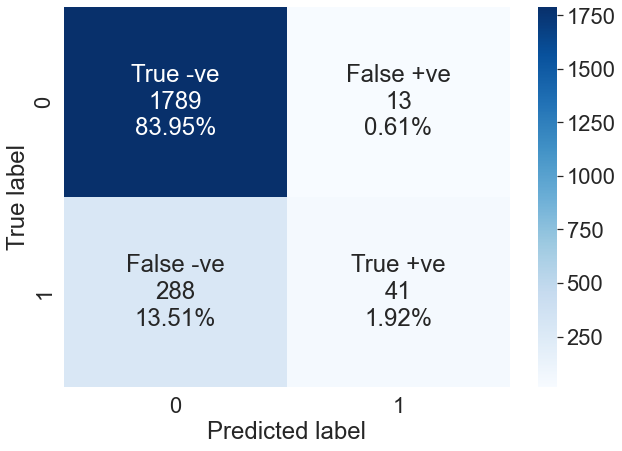

In [115]:
Grad_boost = GradientBoostingClassifier(random_state=25)
Grad_boost.fit(X_train_mobile, y_train_mobile)
y_predict = Grad_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [116]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5587029271764908

In [117]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5587029271764908

Text(0.5, 0, 'False Positive Rate')

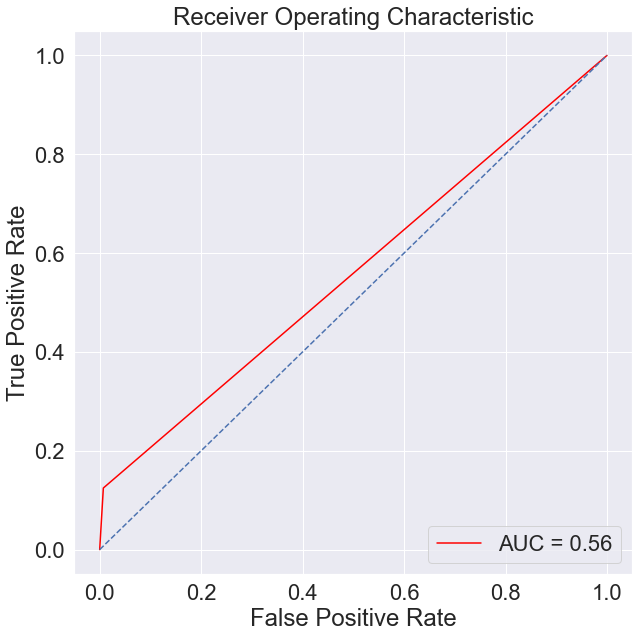

In [118]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [119]:
scores(Grad_boost)

Accuracy on training set :  0.8615186011031569
Accuracy on test set :  0.8587517597372126

Recall on training set :  0.12083656080557707
Recall on test set :  0.12462006079027356

Precision on training set :  0.7761194029850746
Precision on test set :  0.7592592592592593

F1 on training set :  0.20911528150134048
F1 on test set :  0.21409921671018278


## 9.3.3.1 Gradient Boost with ADABoost classifier

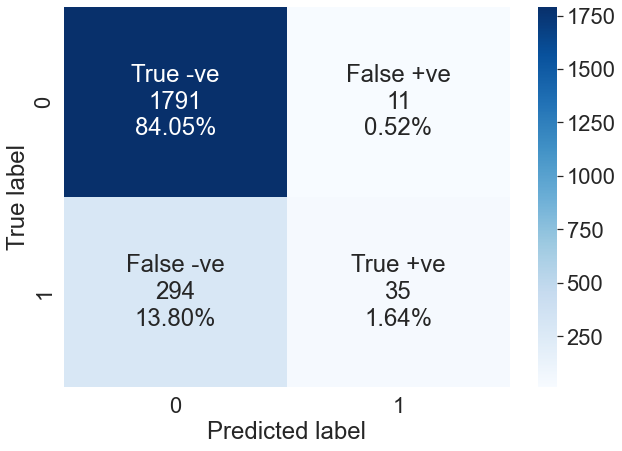

In [120]:
Grad_boost_ada = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)
Grad_boost_ada.fit(X_train_mobile, y_train_mobile)
y_predict = Grad_boost_ada.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [121]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5501393250997709

In [122]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5501393250997709

Text(0.5, 0, 'False Positive Rate')

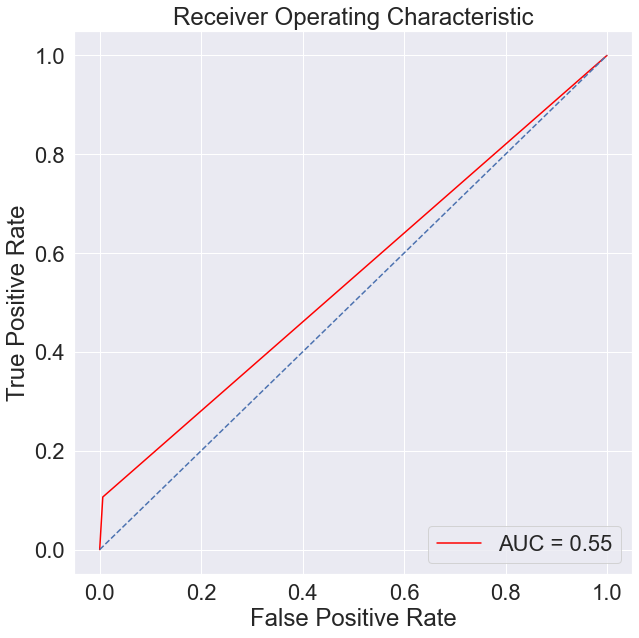

In [123]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [124]:
scores(Grad_boost_ada)

Accuracy on training set :  0.8599929585729374
Accuracy on test set :  0.8568747067104646

Recall on training set :  0.10921766072811774
Recall on test set :  0.10638297872340426

Precision on training set :  0.7663043478260869
Precision on test set :  0.7608695652173914

F1 on training set :  0.1911864406779661
F1 on test set :  0.18666666666666665


## 9.3.4 Bagging Classifier

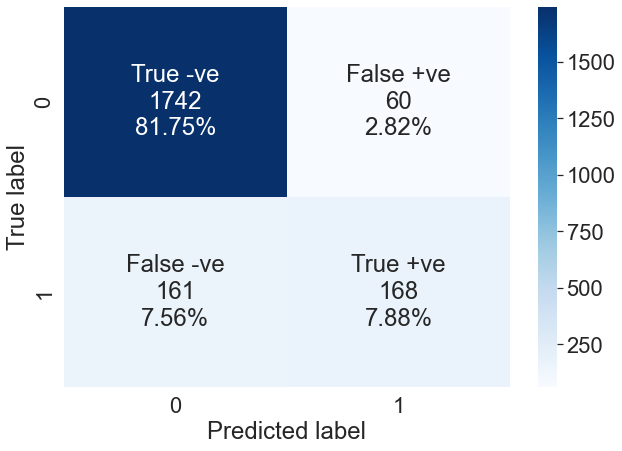

In [125]:
bagging = BaggingClassifier(random_state=25) #defining the classifier with randomstate 25
bagging.fit(X_train_mobile, y_train_mobile)
y_predict = bagging.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [126]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.7386709802347272

In [127]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7386709802347272

Text(0.5, 0, 'False Positive Rate')

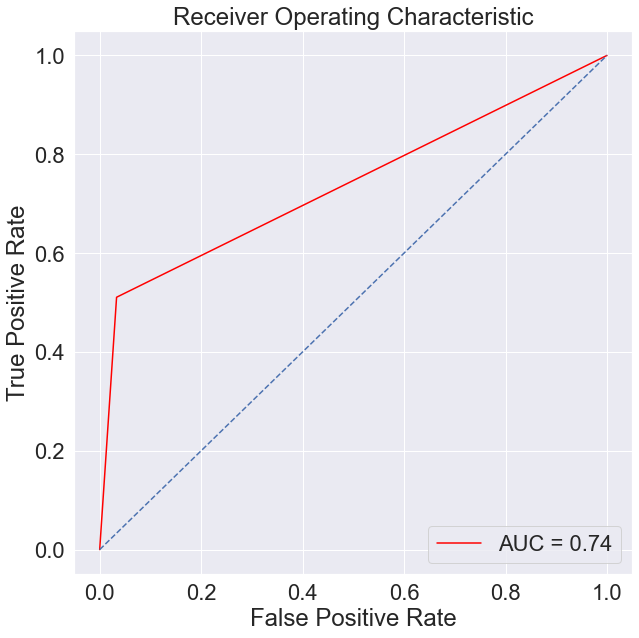

In [128]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [129]:
scores(bagging)

Accuracy on training set :  0.9358056566130736
Accuracy on test set :  0.8962928202721727

Recall on training set :  0.6622773044151821
Recall on test set :  0.5106382978723404

Precision on training set :  0.8850931677018633
Precision on test set :  0.7368421052631579

F1 on training set :  0.7576428887904297
F1 on test set :  0.6032315978456013


### 9.3.4.1 Hyperparameters for Bagging Classifier

In [130]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=25, bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_mobile, y_train_mobile)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50,
                  random_state=25)

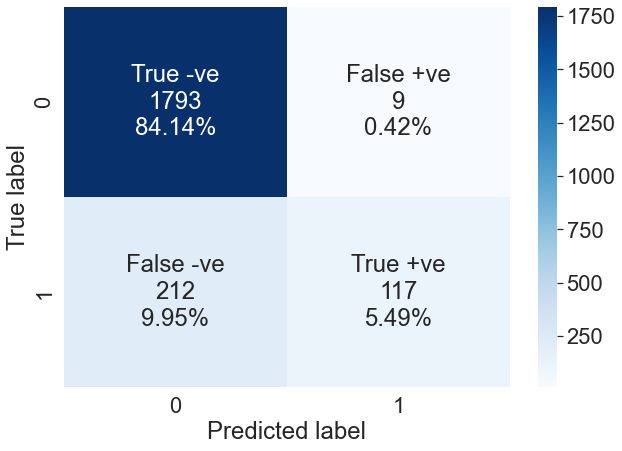

In [131]:
y_predict = bagging_estimator_tuned.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [132]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.6753143248467592

In [133]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6753143248467592

Text(0.5, 0, 'False Positive Rate')

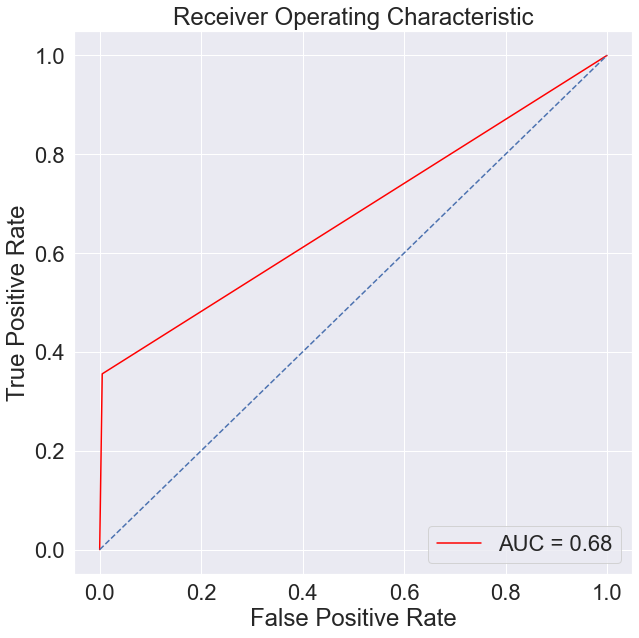

In [134]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [135]:
scores(bagging_estimator_tuned)

Accuracy on training set :  0.9179673747212769
Accuracy on test set :  0.8962928202721727

Recall on training set :  0.46630518977536795
Recall on test set :  0.3556231003039514

Precision on training set :  0.9836601307189542
Precision on test set :  0.9285714285714286

F1 on training set :  0.6326852338413033
F1 on test set :  0.5142857142857143


## 9.4.2 Linear Discriminant Analysis

In [136]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_mobile, y_train_mobile)

LinearDiscriminantAnalysis()

In [137]:
lda.explained_variance_ratio_

array([1.])

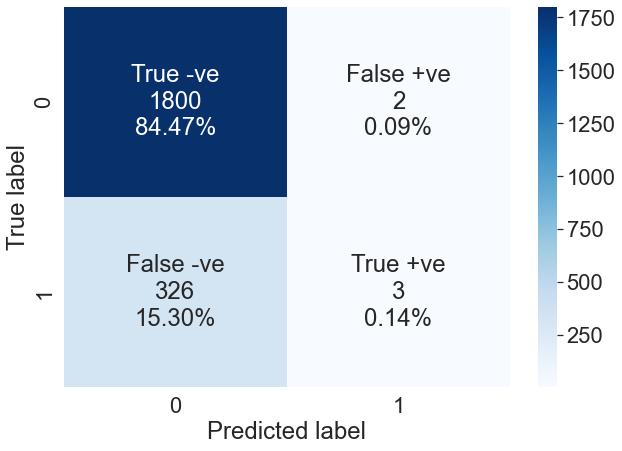

In [138]:
y_predict = lda.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [139]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5040043315600026

In [140]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5040043315600026

Text(0.5, 0, 'False Positive Rate')

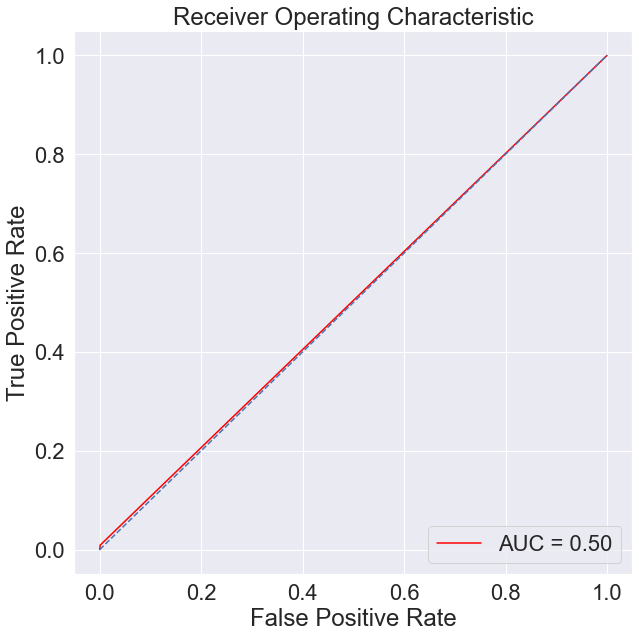

In [141]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [142]:
scores(lda)

Accuracy on training set :  0.8490787466259828
Accuracy on test set :  0.8460816518066635

Recall on training set :  0.006971340046475601
Recall on test set :  0.00911854103343465

Precision on training set :  0.6923076923076923
Precision on test set :  0.6

F1 on training set :  0.013803680981595094
F1 on test set :  0.017964071856287425


## 9.5 KNN Classifier

In [143]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_mobile, y_train_mobile)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_mobile, y_train_mobile)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_mobile, y_test_mobile) 


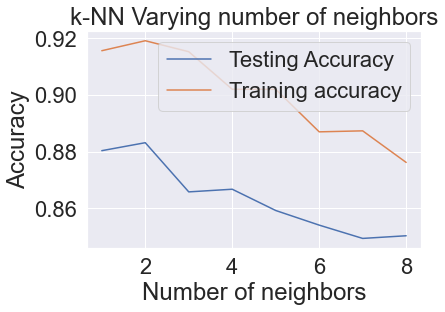

In [144]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [145]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)


In [146]:
#Fit the model
knn.fit(X_train_mobile,y_train_mobile)

KNeighborsClassifier(n_neighbors=7)

In [147]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test_mobile,y_test_mobile)

0.8493664946034726

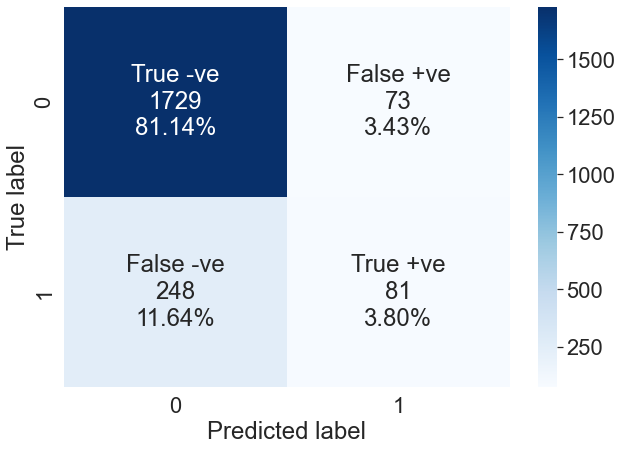

In [148]:
y_predict = knn.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [149]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.602845032031279

In [150]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.602845032031279

Text(0.5, 0, 'False Positive Rate')

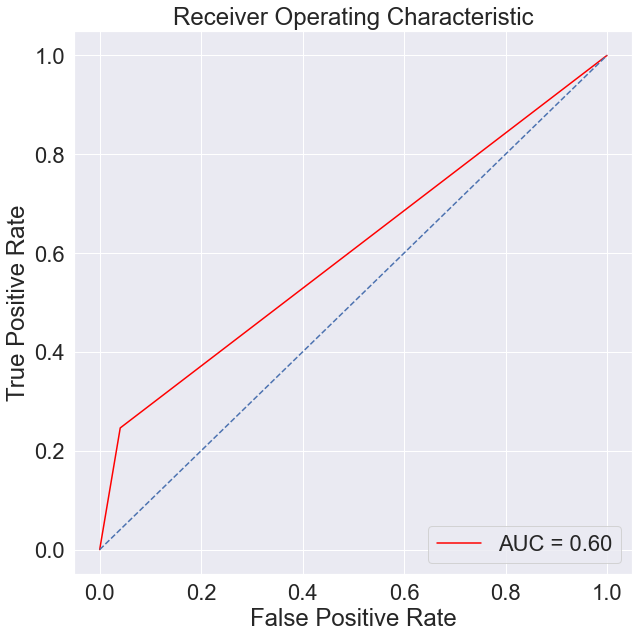

In [151]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [152]:
scores(knn)

Accuracy on training set :  0.8873371669991785
Accuracy on test set :  0.8493664946034726

Recall on training set :  0.4113090627420604
Recall on test set :  0.24620060790273557

Precision on training set :  0.7264021887824897
Precision on test set :  0.525974025974026

F1 on training set :  0.5252225519287833
F1 on test set :  0.3354037267080745


## 9.6 Naive Bayes Classifier

In [153]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_mobile, y_train_mobile)

GaussianNB()

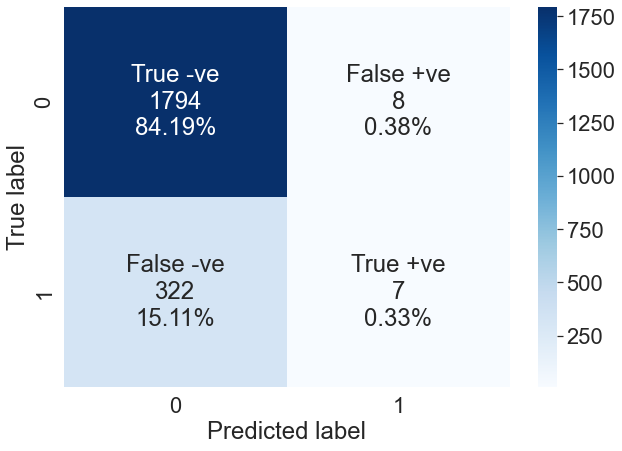

In [154]:
y_predict = gnb.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [155]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5084185420454813

In [156]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5084185420454813

Text(0.5, 0, 'False Positive Rate')

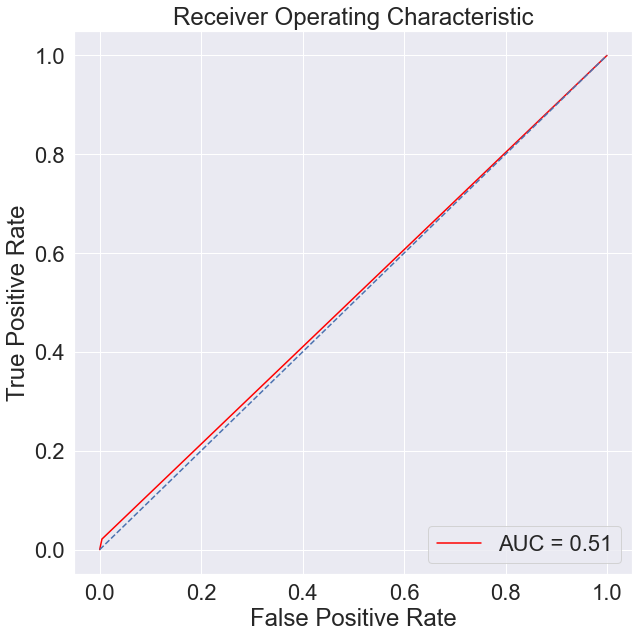

In [157]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [158]:
scores(gnb)

Accuracy on training set :  0.8486093181551461
Accuracy on test set :  0.8451431252932895

Recall on training set :  0.013942680092951201
Recall on test set :  0.02127659574468085

Precision on training set :  0.5142857142857142
Precision on test set :  0.4666666666666667

F1 on training set :  0.027149321266968326
F1 on test set :  0.040697674418604654


In [159]:
# defining list of models
all_models = [Dt,classifier,random_forest,XG_boost,xgb_tuned, logreg, Ada_boost,Grad_boost, Grad_boost_ada, bagging, bagging_estimator_tuned, lda, knn, gnb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])
  

In [160]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','XGBoost Classifier','Tuned XGBoost Classifier','Logistic Regression','Ada boost','Gradient boost','Gradient and Ada Boost','Bagging','Bagging estimator tuned','Linear Discrimant Analysis', 'KNN','Naive Bayes Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_F1-Score  \
9                      Bagging        0.935806       0.896293        0.757643   
2                Random Forest        0.937918       0.893947        0.768084   
0                Decision Tree        0.937918       0.891600        0.757895   
3           XGBoost Classifier        0.919962       0.894885        0.663043   
10     Bagging estimator tuned        0.917967       0.896293        0.632685   
4     Tuned XGBoost Classifier        0.912921       0.886908        0.630478   
1          Tuned Decision Tree        0.732308       0.736274        0.372835   
12                         KNN        0.887337       0.849366        0.525223   
7               Gradient boost        0.861519       0.858752        0.209115   
8       Gradient and Ada Boost        0.859993       0.856875        0.191186   
13      Naive Bayes Classifier        0.848609       0.845143        0.027149   
6                    Ada boost        0.851661       0.844674        0.073314   
11  Linear Discrimant Analysis        0.849079       0.846082        0.013804   
5          Logistic Regression        0.849079       0.845612        0.007716   

    Test_F1-Score  
9        0.603232  
2        0.597865  
0        0.585278  
3        0.540984  
10       0.514286  
4        0.505133  
1        0.391775  
12       0.335404  
7        0.214099  
8        0.186667  
13       0.040698  
6        0.040580  
11       0.017964  
5        0.000000

In [161]:
#Sorting models in decreasing order of test accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_F1-Score  \
9                      Bagging        0.935806       0.896293        0.757643   
10     Bagging estimator tuned        0.917967       0.896293        0.632685   
3           XGBoost Classifier        0.919962       0.894885        0.663043   
2                Random Forest        0.937918       0.893947        0.768084   
0                Decision Tree        0.937918       0.891600        0.757895   
4     Tuned XGBoost Classifier        0.912921       0.886908        0.630478   
7               Gradient boost        0.861519       0.858752        0.209115   
8       Gradient and Ada Boost        0.859993       0.856875        0.191186   
12                         KNN        0.887337       0.849366        0.525223   
11  Linear Discrimant Analysis        0.849079       0.846082        0.013804   
5          Logistic Regression        0.849079       0.845612        0.007716   
13      Naive Bayes Classifier        0.848609       0.845143        0.027149   
6                    Ada boost        0.851661       0.844674        0.073314   
1          Tuned Decision Tree        0.732308       0.736274        0.372835   

    Test_F1-Score  
9        0.603232  
10       0.514286  
3        0.540984  
2        0.597865  
0        0.585278  
4        0.505133  
7        0.214099  
8        0.186667  
12       0.335404  
11       0.017964  
5        0.000000  
13       0.040698  
6        0.040580  
1        0.391775

## 10. **Model training for Laptop.**

In [162]:
df_laptop.corr()

Taken_product  \
Taken_product                                      1.000000   
Yearly_avg_view_on_travel_page                    -0.242961   
total_likes_on_outstation_checkin_given           -0.142125   
preferred_location_type                            0.039108   
Yearly_avg_comment_on_travel_page                  0.041578   
total_likes_on_outofstation_checkin_received      -0.252337   
week_since_last_outstation_checkin                 0.047308   
following_company_page                             0.262993   
montly_avg_comment_on_company_page                -0.014207   
working_flag                                      -0.010284   
travelling_network_rating                         -0.120412   
Adult_flag                                        -0.149352   
Daily_Avg_mins_spend_on_traveling_page            -0.252032   

                                              Yearly_avg_view_on_travel_page  \
Taken_product                                                      -0.242961   
Yearly_avg_view_on_travel_page                                      1.000000   
total_likes_on_outstation_checkin_given                             0.083454   
preferred_location_type                                            -0.065166   
Yearly_avg_comment_on_travel_page                                   0.046342   
total_likes_on_outofstation_checkin_received                        0.470272   
week_since_last_outstation_checkin                                  0.276618   
following_company_page                                              0.002703   
montly_avg_comment_on_company_page                                  0.009887   
working_flag                                                        0.006644   
travelling_network_rating                                           0.088335   
Adult_flag                                                          0.042965   
Daily_Avg_mins_spend_on_traveling_page                              0.644598   

                                              total_likes_on_outstation_checkin_given  \
Taken_product                                                               -0.142125   
Yearly_avg_view_on_travel_page                                               0.083454   
total_likes_on_outstation_checkin_given                                      1.000000   
preferred_location_type                                                      0.029842   
Yearly_avg_comment_on_travel_page                                            0.102823   
total_likes_on_outofstation_checkin_received                                -0.015840   
week_since_last_outstation_checkin                                          -0.014339   
following_company_page                                                      -0.004343   
montly_avg_comment_on_company_page                                           0.070092   
working_flag                                                                 0.001505   
travelling_network_rating                                                    0.044958   
Adult_flag                                                                  -0.013489   
Daily_Avg_mins_spend_on_traveling_page                                       0.024919   

                                              preferred_location_type  \
Taken_product                                                0.039108   
Yearly_avg_view_on_travel_page                              -0.065166   
total_likes_on_outstation_checkin_given                      0.029842   
preferred_location_type                                      1.000000   
Yearly_avg_comment_on_travel_page                           -0.002728   
total_likes_on_outofstation_checkin_received                -0.114884   
week_since_last_outstation_checkin                          -0.015379   
following_company_page                                       0.007902   
montly_avg_comment_on_company_page                           0.025546   
working_flag                                                 0.02

In [163]:
df_laptop.drop(['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
         'total_likes_on_outofstation_checkin_received', 'montly_avg_comment_on_company_page',
        'working_flag', 'travelling_network_rating', 'Adult_flag', 'Daily_Avg_mins_spend_on_traveling_page'],
               inplace=True, axis='columns')

In [164]:
df_laptop.drop(['preferred_device'],inplace=True, axis='columns')

In [165]:
df_laptop.shape

(1108, 7)

### 10.1 Train & Test splits.

In [166]:
train_laptop, test_laptop = train_test_split(df_laptop, test_size=0.2)

In [167]:
train_laptop.shape

(886, 7)

In [168]:
test_laptop.shape

(222, 7)

In [169]:
X_train_laptop = train_laptop.drop(['Taken_product'], axis='columns')
y_train_laptop = train_laptop['Taken_product']
y_train_laptop.head()

10351    0
10065    0
9607     0
6389     0
7124     0
Name: Taken_product, dtype: int64

In [170]:
X_train_laptop.head()

yearly_avg_Outstation_checkins member_in_family  \
10351                             29                5   
10065                             10                3   
9607                               2                1   
6389                               6                3   
7124                               2                4   

       preferred_location_type  Yearly_avg_comment_on_travel_page  \
10351                        0                               68.0   
10065                        6                               79.0   
9607                         0                               79.0   
6389                         0                               35.0   
7124                        14                               87.0   

       week_since_last_outstation_checkin  following_company_page  
10351                                   1                       2  
10065                                   0                       2  
9607                                    5                       2  
6389                                    3                       2  
7124                                    0                       2

In [171]:
X_test_laptop = test_laptop.drop(['Taken_product'], axis='columns')
y_test_laptop = test_laptop['Taken_product']
y_test_laptop.head()

6462     0
6770     0
8162     0
8739     0
10380    0
Name: Taken_product, dtype: int64

In [172]:
X_test_laptop.head()

yearly_avg_Outstation_checkins member_in_family  \
6462                               2                2   
6770                               1                4   
8162                              27                3   
8739                               1                3   
10380                              1                4   

       preferred_location_type  Yearly_avg_comment_on_travel_page  \
6462                         6                               46.0   
6770                         0                               60.0   
8162                         0                               87.0   
8739                         0                               53.0   
10380                        0                              100.0   

       week_since_last_outstation_checkin  following_company_page  
6462                                    1                       2  
6770                                    7                       2  
8162                                    8                       2  
8739                                    1                       2  
10380                                   1                       2

**Building the Model:**
* We will start with a Decision Tree model
* Next, we will build one ensemble model - Random Forest Classifier
* Then, we will build one Boosting ensemble models - XG Boost
* Then, we will build one statistical model - Logistic Regression
* We will first build them with their default parameters and later hypertune them for optimization.
* We will also calculate all four metrics; Accuracy, Recall, Precision and F1Score which is the metric of interest.
* F1Score is the weighted average of Precision and Recall. Its takes both False positives and False negatives into account.




## 10.2 **Decision Tree**

We will keep the same randomstate = 25 for all the models so that the same random values are chosen

In [173]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()

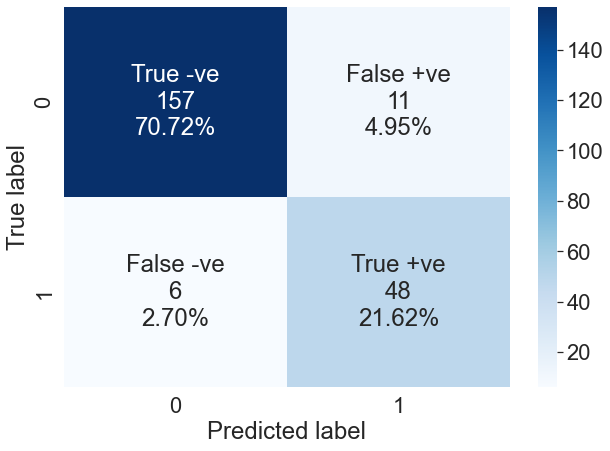

In [174]:
Dt.fit(X_train_laptop, y_train_laptop) #fit the train set to Decision tree
y_predict = Dt.predict(X_test_laptop) 
make_confusion_matrix(y_test_laptop, y_predict)

In [175]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.9117063492063492

In [176]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9117063492063492

Text(0.5, 0, 'False Positive Rate')

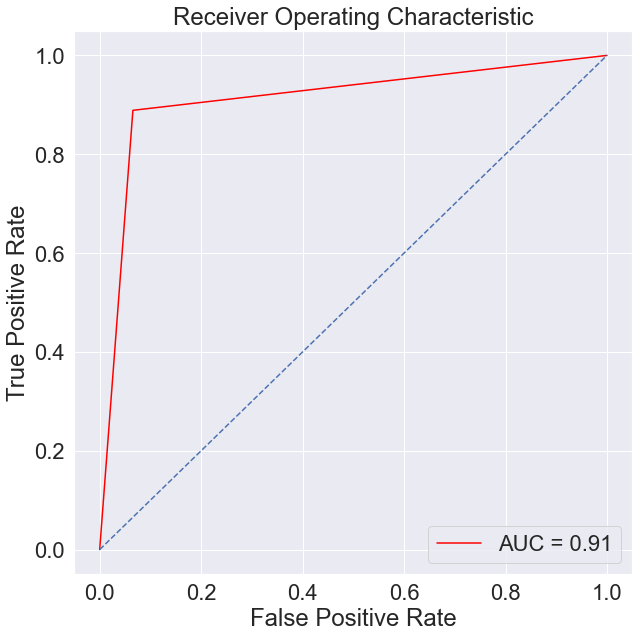

In [177]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [178]:
scores_l(Dt)

Accuracy on training set :  0.9988713318284425
Accuracy on test set :  0.9234234234234234

Recall on training set :  0.9954954954954955
Recall on test set :  0.8888888888888888

Precision on training set :  1.0
Precision on test set :  0.8135593220338984

F1 on training set :  0.9977426636568849
F1 on test set :  0.8495575221238938


## 10.3 **Ensemble model**
### 10.3.1 **Random Forest Classifier**

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train_laptop,y_train_laptop)


RandomForestClassifier(random_state=25)

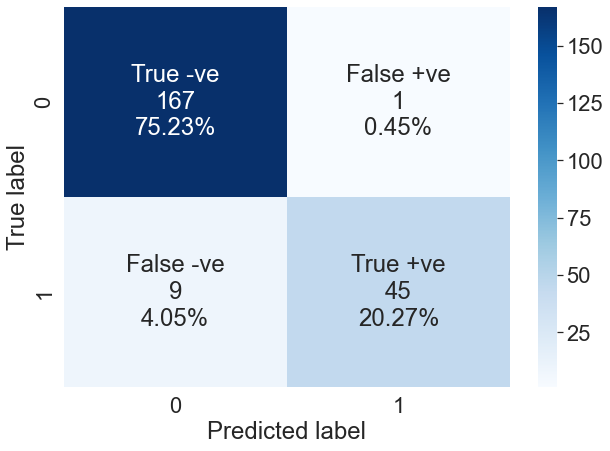

In [181]:
y_predict = random_forest.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [182]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.9136904761904763

In [183]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9136904761904763

Text(0.5, 0, 'False Positive Rate')

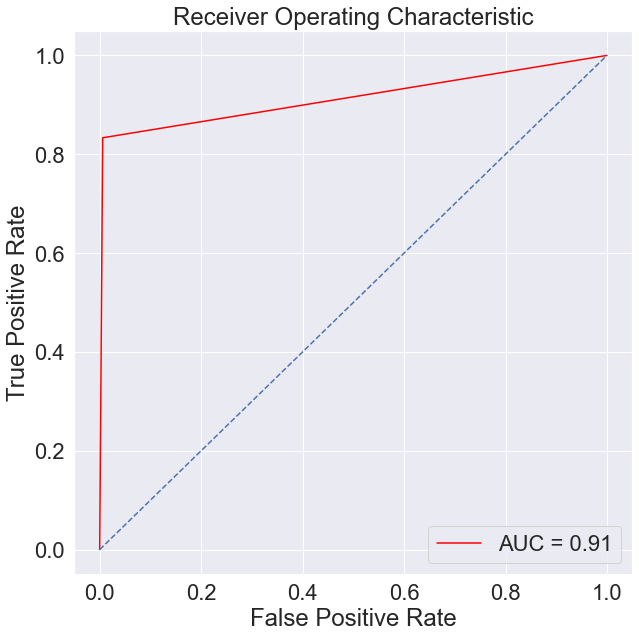

In [184]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [185]:
scores_l(random_forest)

Accuracy on training set :  0.9988713318284425
Accuracy on test set :  0.954954954954955

Recall on training set :  0.9954954954954955
Recall on test set :  0.8333333333333334

Precision on training set :  1.0
Precision on test set :  0.9782608695652174

F1 on training set :  0.9977426636568849
F1 on test set :  0.9





### 10.3.1.1 **Random Forest Classifier with weights**

In [186]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=25)
random_forest_wt.fit(X_train_laptop,y_train_laptop)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=25)

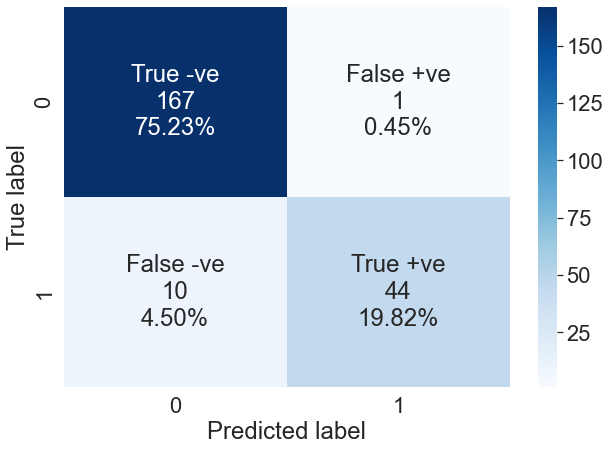

In [187]:
y_predict = random_forest_wt.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [188]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.904431216931217

In [189]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.904431216931217

Text(0.5, 0, 'False Positive Rate')

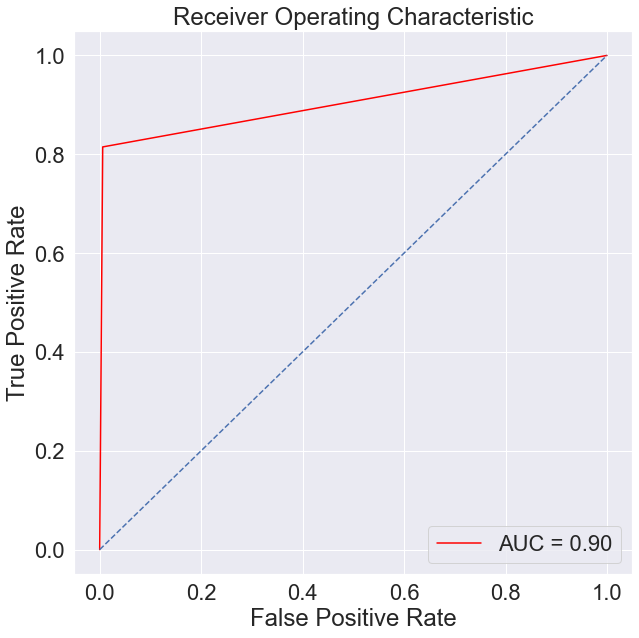

In [190]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [191]:
scores_l(random_forest_wt)

Accuracy on training set :  0.9988713318284425
Accuracy on test set :  0.9504504504504504

Recall on training set :  1.0
Recall on test set :  0.8148148148148148

Precision on training set :  0.9955156950672646
Precision on test set :  0.9777777777777777

F1 on training set :  0.9977528089887641
F1 on test set :  0.8888888888888888


* There is little improvement in the metrics for the weighted Random Forest classifier.

### 10.3.1.1 Feature Importance random forest


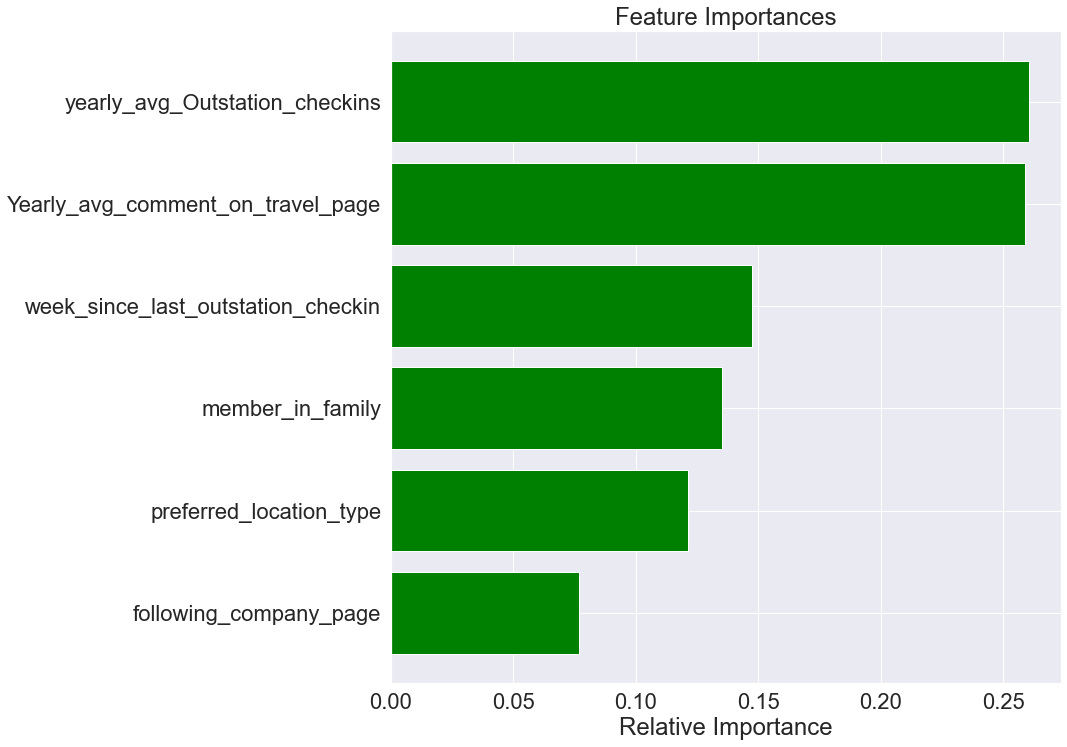

In [192]:
feature_names = X_train_laptop.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()





### **GridSearch for Hyperparameter Tuning of the models:**
* Hyperparameters are variables that control the network structure of the Decision tree.
* As there is no direct way to calculate the effects of value change in hyperparamter has on the model, we will use a GridSearch
* This is a tuning technique that will compute the optimum values of specific hyperparameters of the model
* The parameters are optimized using a cross-validated GridSearch over a parameter grid


**Hyperparameters for Decision Tree Model**



In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train_laptop, y_train_laptop)


DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=10,
                       max_leaf_nodes=15, min_samples_leaf=2, random_state=25)

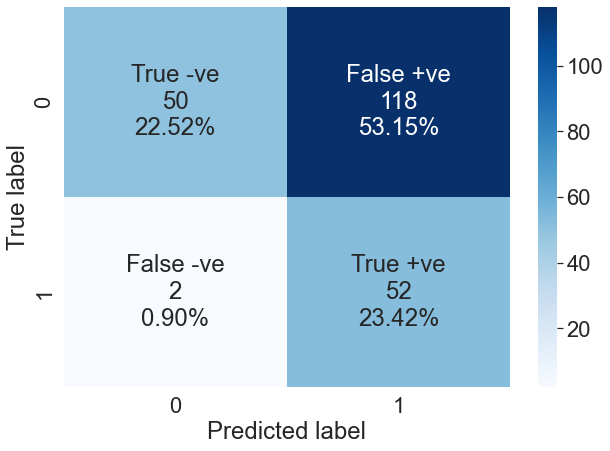

In [195]:
y_predict = classifier.predict(X_test_laptop) 
make_confusion_matrix(y_test_laptop,y_predict) 


In [196]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.6302910052910052

In [197]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6302910052910052

Text(0.5, 0, 'False Positive Rate')

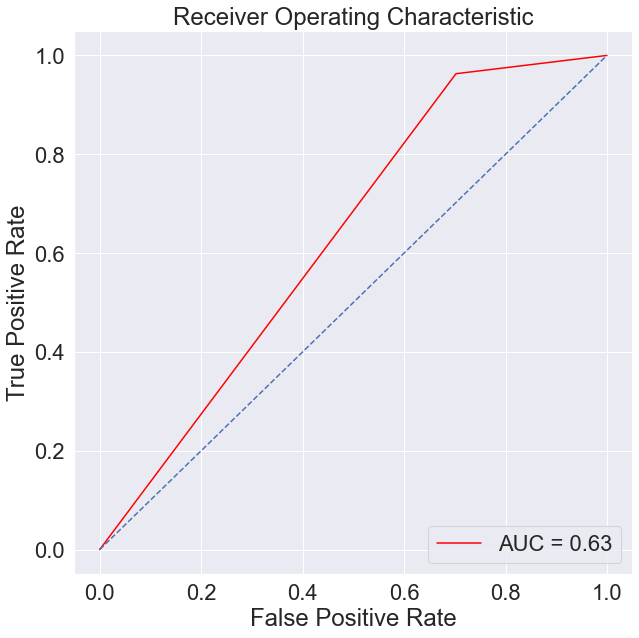

In [198]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [199]:
scores_l(classifier)

Accuracy on training set :  0.5237020316027088
Accuracy on test set :  0.4594594594594595

Recall on training set :  0.990990990990991
Recall on test set :  0.9629629629629629

Precision on training set :  0.34375
Precision on test set :  0.3058823529411765

F1 on training set :  0.5104408352668213
F1 on test set :  0.4642857142857143


In [200]:
X_train_laptop['yearly_avg_Outstation_checkins'] = X_train_laptop['yearly_avg_Outstation_checkins'].astype('int')
X_train_laptop['member_in_family'] = X_train_laptop['member_in_family'].astype('int')
X_test_laptop['yearly_avg_Outstation_checkins'] = X_test_laptop['yearly_avg_Outstation_checkins'].astype('int')
X_test_laptop['member_in_family'] = X_test_laptop['member_in_family'].astype('int')

## 10.4 Boosting Model:


## 10.4.1 **XGBoost Classifier**

In [201]:
from xgboost import XGBClassifier

In [202]:
XG_boost = XGBClassifier(random_state=25, eval_metric='logloss')
XG_boost.fit(X_train_laptop,y_train_laptop)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=25,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

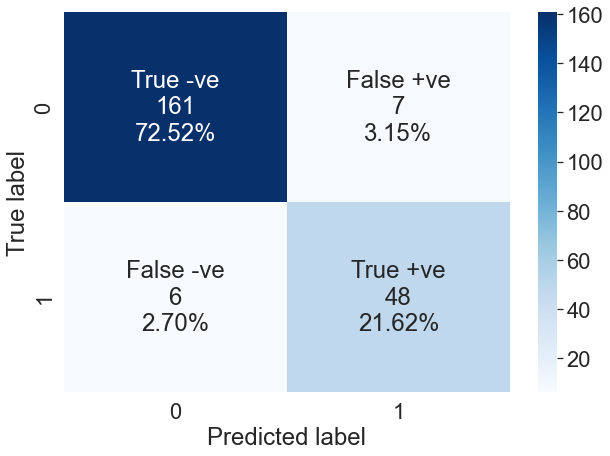

In [203]:
y_predict = XG_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [204]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.923611111111111

In [205]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.923611111111111

Text(0.5, 0, 'False Positive Rate')

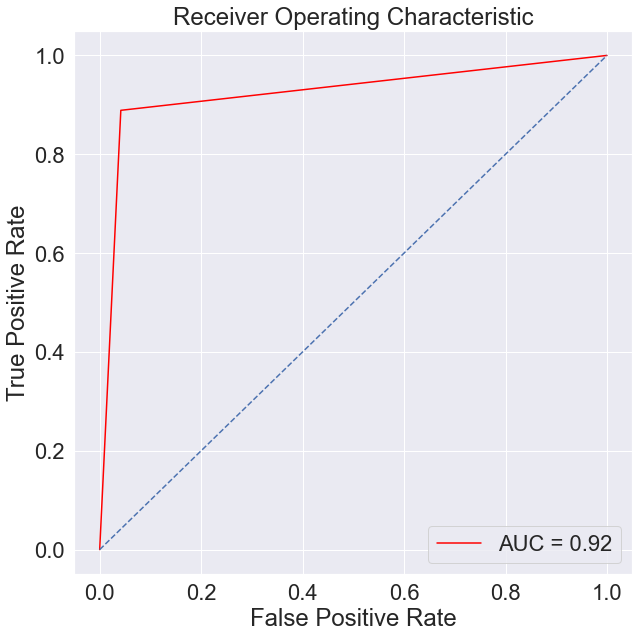

In [206]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [207]:
scores_l(XG_boost)

Accuracy on training set :  0.9988713318284425
Accuracy on test set :  0.9414414414414415

Recall on training set :  1.0
Recall on test set :  0.8888888888888888

Precision on training set :  0.9955156950672646
Precision on test set :  0.8727272727272727

F1 on training set :  0.9977528089887641
F1 on test set :  0.8807339449541284





### GridSearch for Hyperparameter Tuning of the Boosting model:

Hyperparameters for XGBoost

In [208]:
xgb_tuned = XGBClassifier(random_state=25, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
     "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_laptop, y_train_laptop)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=25, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

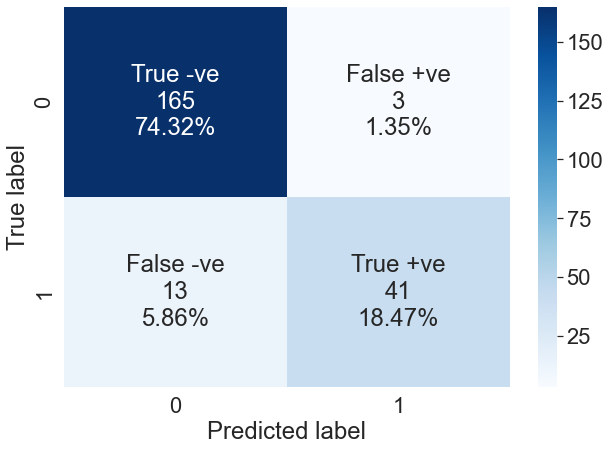

In [209]:
y_predict = xgb_tuned.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)


In [210]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8707010582010583

In [211]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8707010582010583

Text(0.5, 0, 'False Positive Rate')

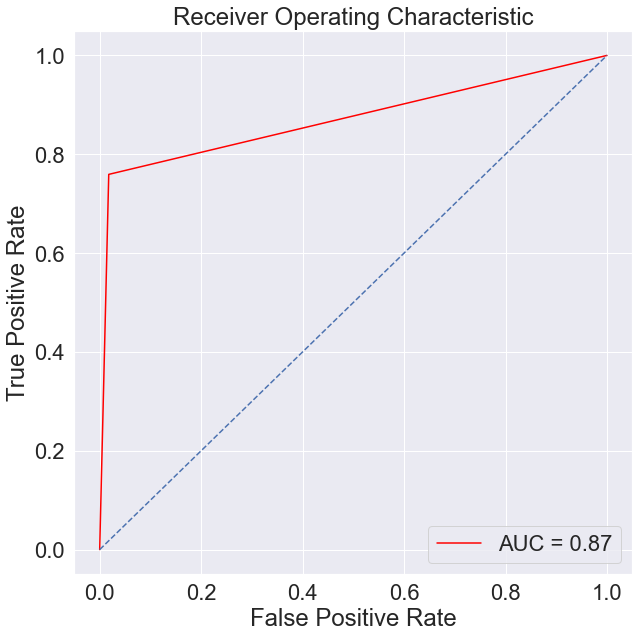

In [212]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [213]:
scores_l(xgb_tuned)

Accuracy on training set :  0.981941309255079
Accuracy on test set :  0.9279279279279279

Recall on training set :  0.9459459459459459
Recall on test set :  0.7592592592592593

Precision on training set :  0.9813084112149533
Precision on test set :  0.9318181818181818

F1 on training set :  0.963302752293578
F1 on test set :  0.836734693877551


In [214]:
from sklearn.linear_model import LogisticRegression

In [215]:
logreg = LogisticRegression()
logreg.fit(X_train_laptop, y_train_laptop)

LogisticRegression()

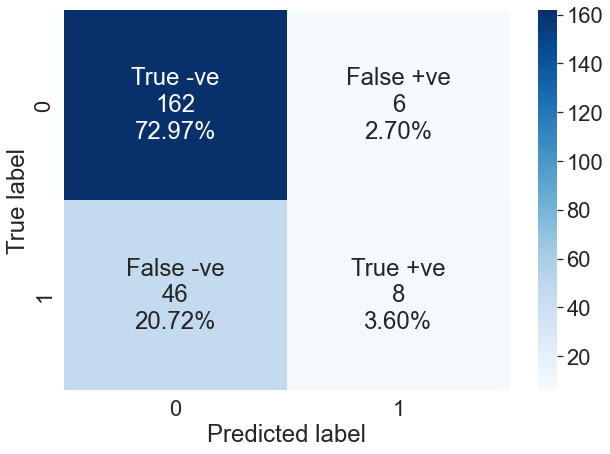

In [216]:
y_predict = logreg.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [217]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5562169312169313

In [218]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5562169312169313

Text(0.5, 0, 'False Positive Rate')

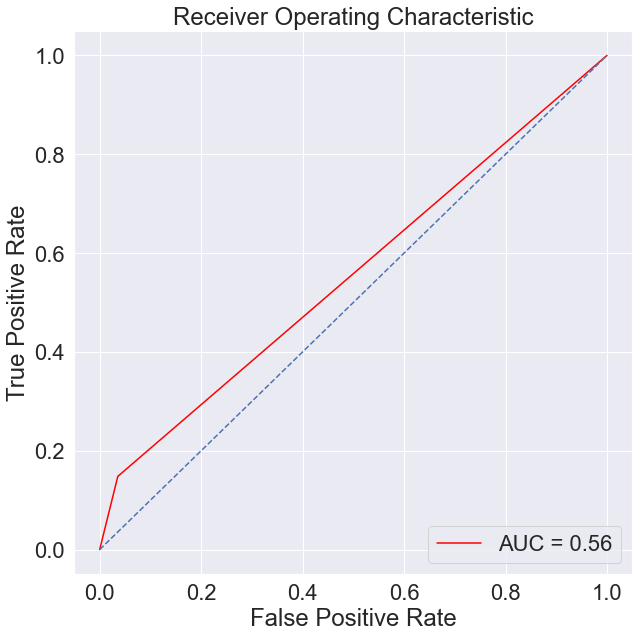

In [219]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [220]:
scores_l(logreg)

Accuracy on training set :  0.7674943566591422
Accuracy on test set :  0.7657657657657657

Recall on training set :  0.15315315315315314
Recall on test set :  0.14814814814814814

Precision on training set :  0.6538461538461539
Precision on test set :  0.5714285714285714

F1 on training set :  0.24817518248175183
F1 on test set :  0.23529411764705882


In [221]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_laptop, y_test_laptop)))


Accuracy of logistic regression classifier on test set: 0.77


## ADA Boost

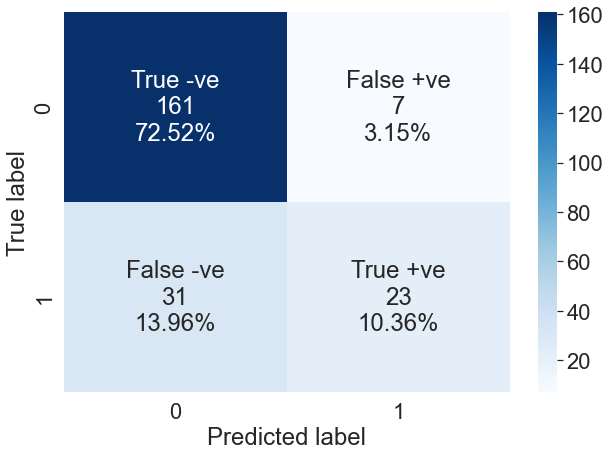

In [222]:
Ada_boost = AdaBoostClassifier(random_state=25)
Ada_boost.fit(X_train_laptop, y_train_laptop)
y_pred = Ada_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_pred)

In [223]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5562169312169313

In [224]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5562169312169313

Text(0.5, 0, 'False Positive Rate')

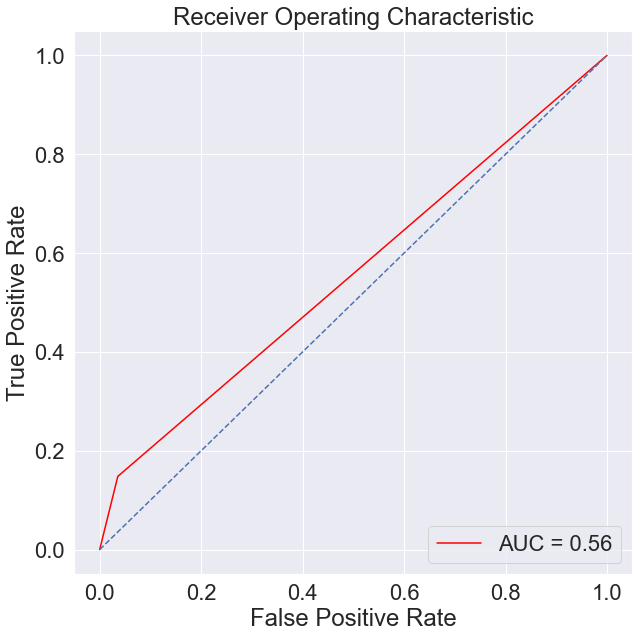

In [225]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [226]:
scores_l(Ada_boost)

Accuracy on training set :  0.7934537246049661
Accuracy on test set :  0.8288288288288288

Recall on training set :  0.32432432432432434
Recall on test set :  0.42592592592592593

Precision on training set :  0.6857142857142857
Precision on test set :  0.7666666666666667

F1 on training set :  0.44036697247706424
F1 on test set :  0.5476190476190477


## Gradient Boost Classifier

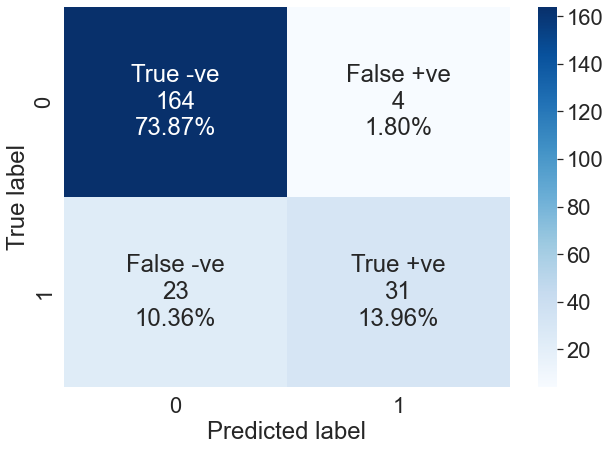

In [227]:
Grad_boost = GradientBoostingClassifier(random_state=25)
Grad_boost.fit(X_train_laptop, y_train_laptop)
y_predict = Grad_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [228]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.775132275132275

In [229]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.775132275132275

Text(0.5, 0, 'False Positive Rate')

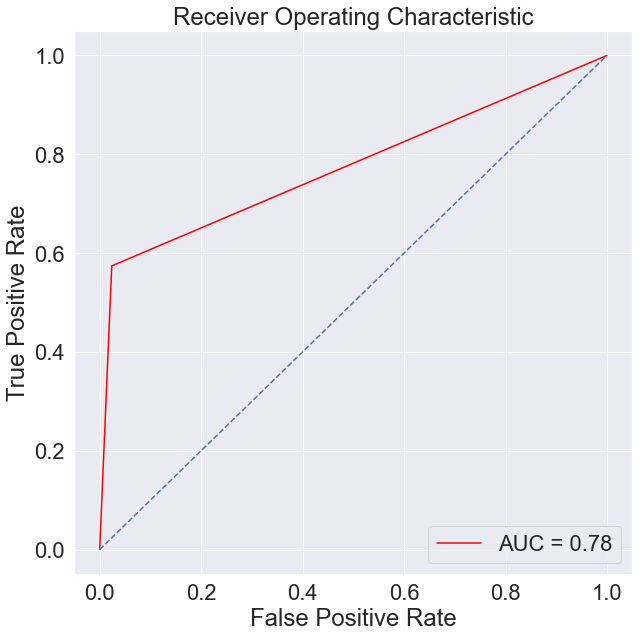

In [230]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [231]:
scores_l(Grad_boost)

Accuracy on training set :  0.9063205417607223
Accuracy on test set :  0.8783783783783784

Recall on training set :  0.6711711711711712
Recall on test set :  0.5740740740740741

Precision on training set :  0.9371069182389937
Precision on test set :  0.8857142857142857

F1 on training set :  0.7821522309711286
F1 on test set :  0.6966292134831461


## Gradient Boost with ADABoost classifier

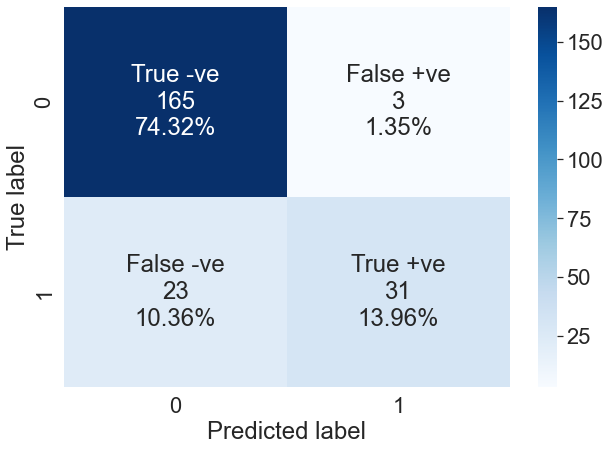

In [232]:
Grad_boost_ada = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)
Grad_boost_ada.fit(X_train_laptop, y_train_laptop)
y_predict = Grad_boost_ada.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [233]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.7781084656084656

In [234]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7781084656084656

Text(0.5, 0, 'False Positive Rate')

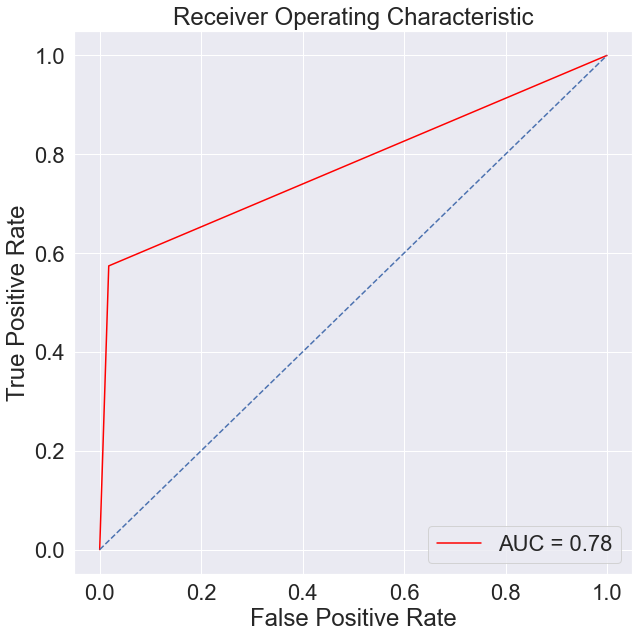

In [235]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [236]:
scores_l(Grad_boost_ada)

Accuracy on training set :  0.9130925507900677
Accuracy on test set :  0.8828828828828829

Recall on training set :  0.6891891891891891
Recall on test set :  0.5740740740740741

Precision on training set :  0.9503105590062112
Precision on test set :  0.9117647058823529

F1 on training set :  0.7989556135770235
F1 on test set :  0.7045454545454545


## Bagging Classifier

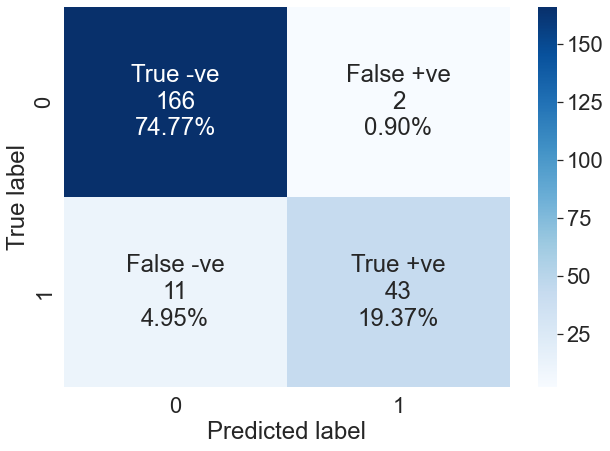

In [237]:
bagging = BaggingClassifier(random_state=25) #defining the classifier with randomstate 25
bagging.fit(X_train_laptop, y_train_laptop)
y_predict = bagging.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [238]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8921957671957673

In [239]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8921957671957673

Text(0.5, 0, 'False Positive Rate')

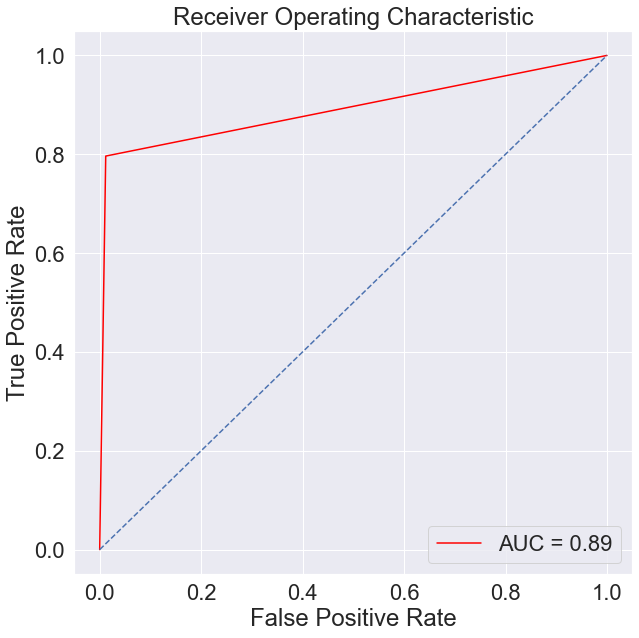

In [240]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [241]:
scores_l(bagging)

Accuracy on training set :  0.9943566591422122
Accuracy on test set :  0.9414414414414415

Recall on training set :  0.9774774774774775
Recall on test set :  0.7962962962962963

Precision on training set :  1.0
Precision on test set :  0.9555555555555556

F1 on training set :  0.9886104783599089
F1 on test set :  0.8686868686868687


### Hyperparameters for Bagging Classifier

In [242]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=25, bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_laptop, y_train_laptop)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=25)

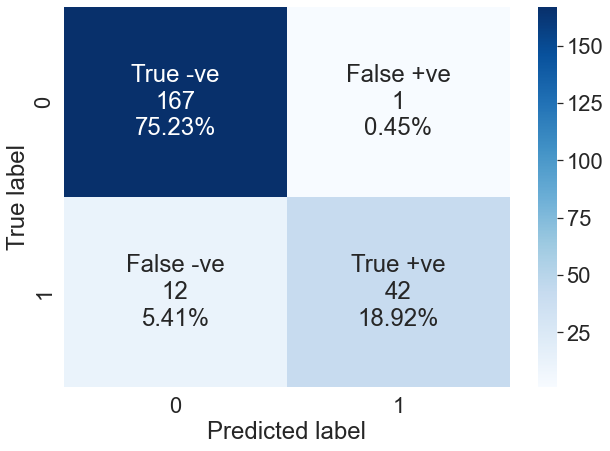

In [243]:
y_predict = bagging_estimator_tuned.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [244]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8859126984126984

In [245]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8859126984126984

Text(0.5, 0, 'False Positive Rate')

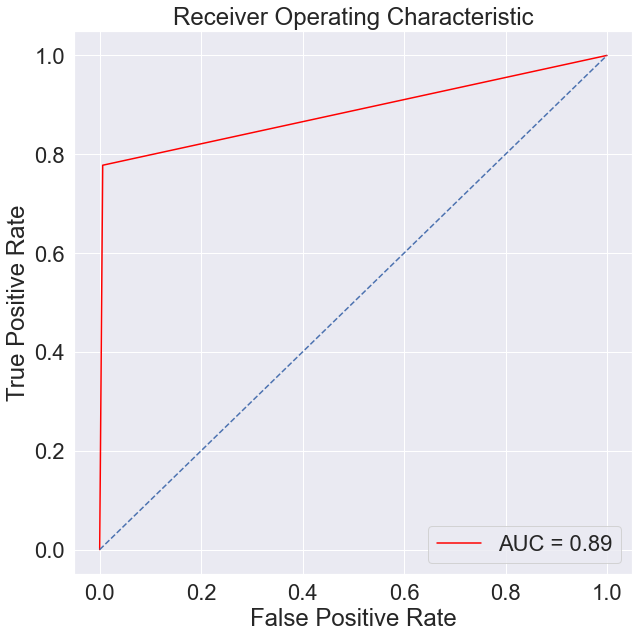

In [246]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [247]:
scores_l(bagging_estimator_tuned)

Accuracy on training set :  0.9977426636568849
Accuracy on test set :  0.9414414414414415

Recall on training set :  0.990990990990991
Recall on test set :  0.7777777777777778

Precision on training set :  1.0
Precision on test set :  0.9767441860465116

F1 on training set :  0.9954751131221719
F1 on test set :  0.8659793814432991


## Linear Discriminant Analysis

In [248]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_laptop, y_train_laptop)

LinearDiscriminantAnalysis()

In [249]:
lda.explained_variance_ratio_

array([1.])

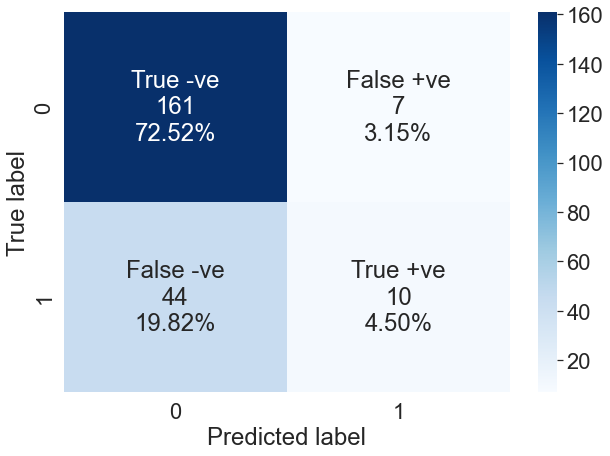

In [250]:
y_predict = lda.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [251]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5717592592592592

In [252]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5717592592592592

Text(0.5, 0, 'False Positive Rate')

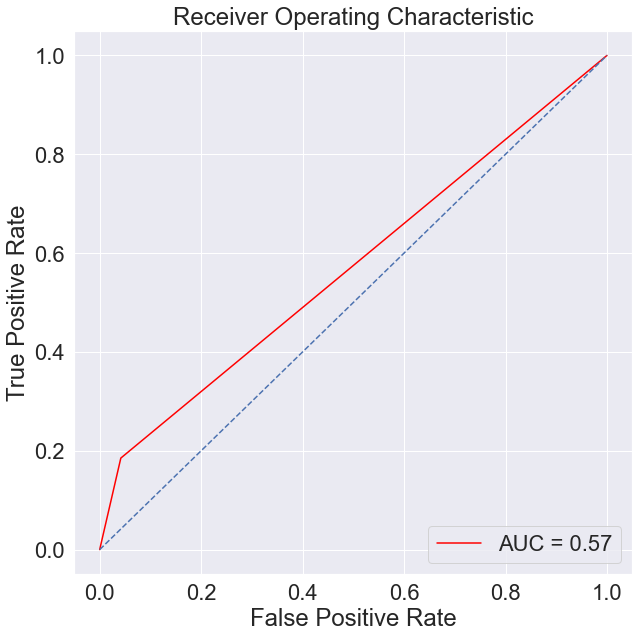

In [253]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [254]:
scores_l(lda)

Accuracy on training set :  0.7663656884875847
Accuracy on test set :  0.7702702702702703

Recall on training set :  0.19369369369369369
Recall on test set :  0.18518518518518517

Precision on training set :  0.6056338028169014
Precision on test set :  0.5882352941176471

F1 on training set :  0.2935153583617747
F1 on test set :  0.2816901408450704


## KNN Classifier

In [255]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_laptop, y_train_laptop)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_laptop, y_train_laptop)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_laptop, y_test_laptop) 


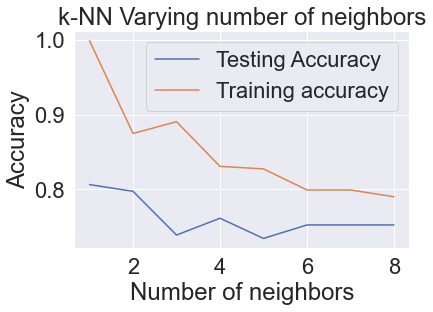

In [256]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [257]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)


In [258]:
#Fit the model
knn.fit(X_train_laptop,y_train_laptop)

KNeighborsClassifier(n_neighbors=7)

In [259]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test_laptop,y_test_laptop)

0.7522522522522522

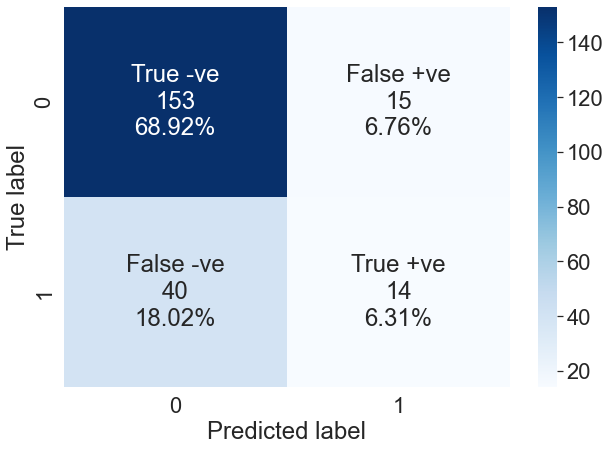

In [260]:
y_predict = knn.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [261]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5849867724867724

In [262]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5849867724867724

Text(0.5, 0, 'False Positive Rate')

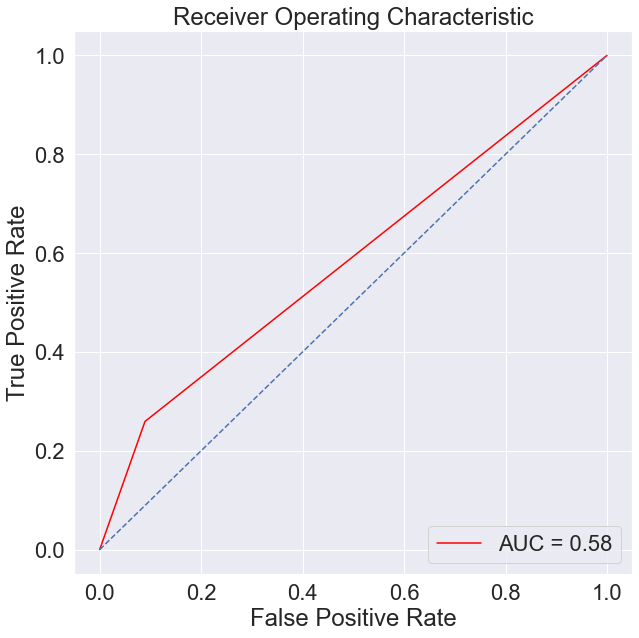

In [263]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [264]:
scores_l(knn)

Accuracy on training set :  0.7990970654627539
Accuracy on test set :  0.7522522522522522

Recall on training set :  0.32432432432432434
Recall on test set :  0.25925925925925924

Precision on training set :  0.72
Precision on test set :  0.4827586206896552

F1 on training set :  0.4472049689440994
F1 on test set :  0.3373493975903614


## Naive Bayes Classifier

In [265]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_laptop, y_train_laptop)

GaussianNB()

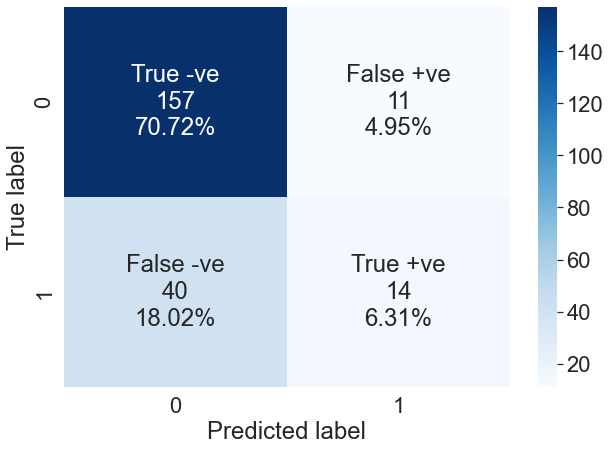

In [266]:
y_predict = gnb.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [267]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5968915343915344

In [268]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5968915343915344

Text(0.5, 0, 'False Positive Rate')

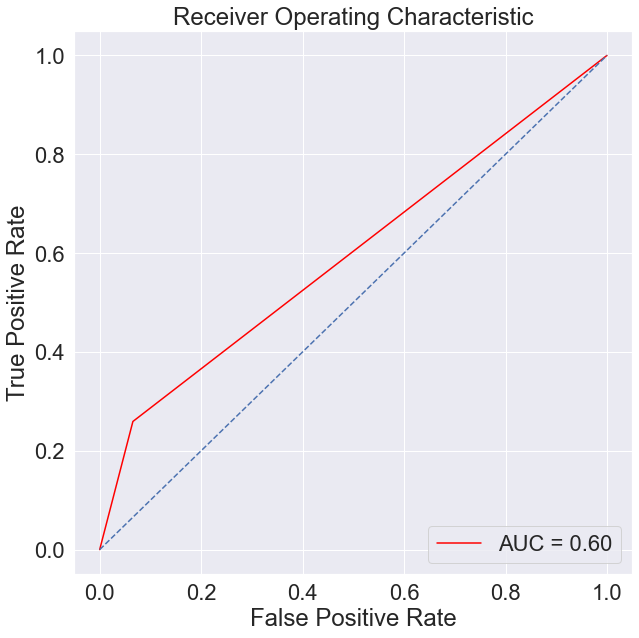

In [269]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [270]:
scores_l(gnb)

Accuracy on training set :  0.7618510158013544
Accuracy on test set :  0.7702702702702703

Recall on training set :  0.1981981981981982
Recall on test set :  0.25925925925925924

Precision on training set :  0.5714285714285714
Precision on test set :  0.56

F1 on training set :  0.29431438127090304
F1 on test set :  0.35443037974683544


In [272]:
# defining list of models
all_models = [Dt,classifier,random_forest,XG_boost,xgb_tuned, logreg, Ada_boost,Grad_boost, Grad_boost_ada, bagging, bagging_estimator_tuned, lda, knn, gnb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores_l(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])

In [273]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','XGBoost Classifier','Tuned XGBoost Classifier','Logistic Regression','Ada boost','Gradient boost','Gradient and Ada Boost','Bagging','Bagging estimator tuned','Linear Discrimant Analysis', 'KNN','Naive Bayes Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_F1-Score  \
2                Random Forest        0.998871       0.954955        0.997743   
3           XGBoost Classifier        0.998871       0.941441        0.997753   
9                      Bagging        0.994357       0.941441        0.988610   
10     Bagging estimator tuned        0.997743       0.941441        0.995475   
0                Decision Tree        0.998871       0.923423        0.997743   
4     Tuned XGBoost Classifier        0.981941       0.927928        0.963303   
8       Gradient and Ada Boost        0.913093       0.882883        0.798956   
7               Gradient boost        0.906321       0.878378        0.782152   
6                    Ada boost        0.793454       0.828829        0.440367   
1          Tuned Decision Tree        0.523702       0.459459        0.510441   
13      Naive Bayes Classifier        0.761851       0.770270        0.294314   
12                         KNN        0.799097       0.752252        0.447205   
11  Linear Discrimant Analysis        0.766366       0.770270        0.293515   
5          Logistic Regression        0.767494       0.765766        0.248175   

    Test_F1-Score  
2        0.900000  
3        0.880734  
9        0.868687  
10       0.865979  
0        0.849558  
4        0.836735  
8        0.704545  
7        0.696629  
6        0.547619  
1        0.464286  
13       0.354430  
12       0.337349  
11       0.281690  
5        0.235294

In [274]:
#Sorting models in decreasing order of test accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_F1-Score  \
2                Random Forest        0.998871       0.954955        0.997743   
3           XGBoost Classifier        0.998871       0.941441        0.997753   
9                      Bagging        0.994357       0.941441        0.988610   
10     Bagging estimator tuned        0.997743       0.941441        0.995475   
4     Tuned XGBoost Classifier        0.981941       0.927928        0.963303   
0                Decision Tree        0.998871       0.923423        0.997743   
8       Gradient and Ada Boost        0.913093       0.882883        0.798956   
7               Gradient boost        0.906321       0.878378        0.782152   
6                    Ada boost        0.793454       0.828829        0.440367   
11  Linear Discrimant Analysis        0.766366       0.770270        0.293515   
13      Naive Bayes Classifier        0.761851       0.770270        0.294314   
5          Logistic Regression        0.767494       0.765766        0.248175   
12                         KNN        0.799097       0.752252        0.447205   
1          Tuned Decision Tree        0.523702       0.459459        0.510441   

    Test_F1-Score  
2        0.900000  
3        0.880734  
9        0.868687  
10       0.865979  
4        0.836735  
0        0.849558  
8        0.704545  
7        0.696629  
6        0.547619  
11       0.281690  
13       0.354430  
5        0.235294  
12       0.337349  
1        0.464286

# Train and Splits 70:30 ratio

#### Train & Test splits.

In [275]:
from sklearn.model_selection import train_test_split

train_mobile, test_mobile = train_test_split(df_mobile, test_size=0.3)

In [276]:
train_mobile.shape

(7456, 6)

In [277]:
test_mobile.shape

(3196, 6)

In [278]:
X_train_mobile = train_mobile.drop(['Taken_product'], axis='columns')
y_train_mobile = train_mobile['Taken_product']
y_train_mobile.head()

11479    0
9412     0
10692    0
2405     0
5396     0
Name: Taken_product, dtype: int64

In [279]:
X_train_mobile.head()

yearly_avg_Outstation_checkins member_in_family  \
11479                              2                4   
9412                               2                2   
10692                             12                3   
2405                               1                3   
5396                              21                4   

       preferred_location_type  week_since_last_outstation_checkin  \
11479                        6                                   3   
9412                        10                                   3   
10692                       14                                   0   
2405                         7                                   1   
5396                         3                                   4   

       following_company_page  
11479                       2  
9412                        3  
10692                       2  
2405                        2  
5396                        3

In [280]:
X_test_mobile = test_mobile.drop(['Taken_product'], axis='columns')
y_test_mobile = test_mobile['Taken_product']
y_test_mobile.head()

10100    0
9379     0
1047     0
1750     0
700      1
Name: Taken_product, dtype: int64

In [281]:
X_test_mobile.head()

yearly_avg_Outstation_checkins member_in_family  \
10100                              8                2   
9379                               2                5   
1047                               1                3   
1750                               1                4   
700                                1                3   

       preferred_location_type  week_since_last_outstation_checkin  \
10100                       10                                   4   
9379                         6                                   8   
1047                         7                                   0   
1750                         7                                   3   
700                          2                                   4   

       following_company_page  
10100                       2  
9379                        3  
1047                        2  
1750                        3  
700                         2

## **Model Building:**
### **Model Evaluation Criterion**
**Model can make two kinds of wrong predictions:**
1. Predicting that the customer will purchase a Travel Package when they dont. - False Positive
2. Predicting that the customer will not purchase a Travel Package when they do. - False Negative

**Metric for Optimization:**
* For the above objective, its important that both False positive and False negative values are low. Hence we would want the F1-Score to be maximized.
* The greater the F1-Score, greater the chances of predicting both classes correctly.


**Building the Model:**
* We will start with a Decision Tree model
* Next, we will build one ensemble model - Random Forest Classifier
* Then, we will build one Boosting ensemble models - XG Boost
* Then, we will build one statistical model - Logistic Regression
* We will first build them with their default parameters and later hypertune them for optimization.
* We will also calculate all four metrics; Accuracy, Recall, Precision and F1Score which is the metric of interest.
* F1Score is the weighted average of Precision and Recall. Its takes both False positives and False negatives into account.




### **Decision Tree**

We will keep the same randomstate = 25 for all the models so that the same random values are chosen

In [282]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()

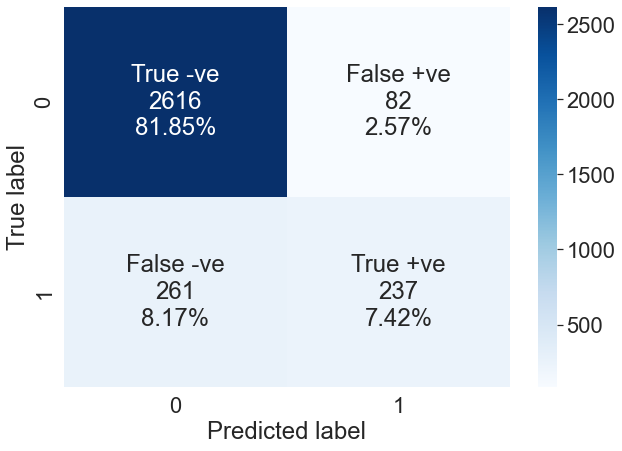

In [283]:
Dt.fit(X_train_mobile, y_train_mobile) #fit the train set to Decision tree
y_predict = Dt.predict(X_test_mobile) 
make_confusion_matrix(y_test_mobile, y_predict)

In [284]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.7227553654201684

In [285]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7227553654201684

Text(0.5, 0, 'False Positive Rate')

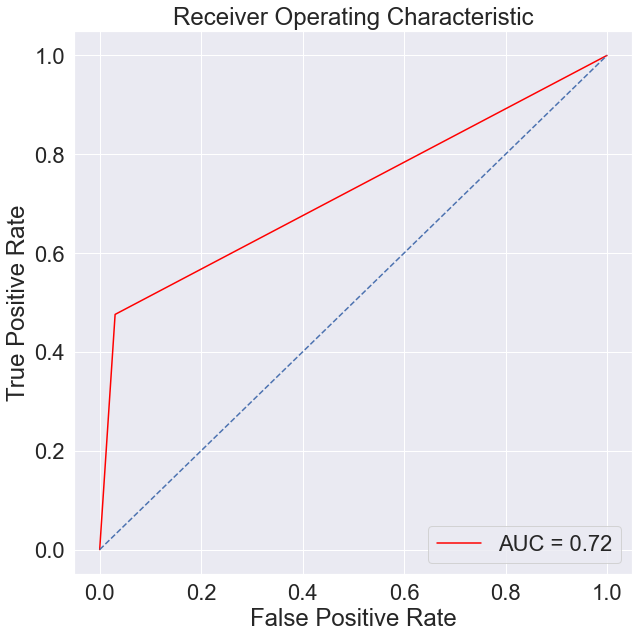

In [286]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [287]:
scores(Dt)

Accuracy on training set :  0.9395118025751072
Accuracy on test set :  0.8926783479349186

Recall on training set :  0.6497326203208557
Recall on test set :  0.4759036144578313

Precision on training set :  0.9263024142312579
Precision on test set :  0.7429467084639498

F1 on training set :  0.7637506547930853
F1 on test set :  0.5801713586291309


### **Random Forest Classifier**

In [288]:
from sklearn.ensemble import RandomForestClassifier

In [289]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train_mobile,y_train_mobile)


RandomForestClassifier(random_state=25)

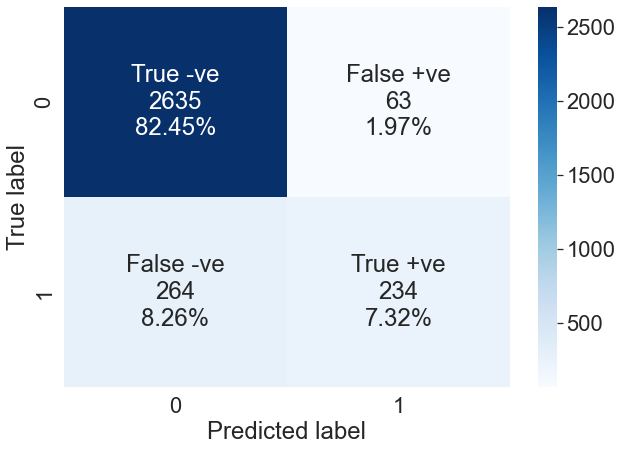

In [290]:
y_predict = random_forest.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [291]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.7232644439879607

In [292]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7232644439879607

Text(0.5, 0, 'False Positive Rate')

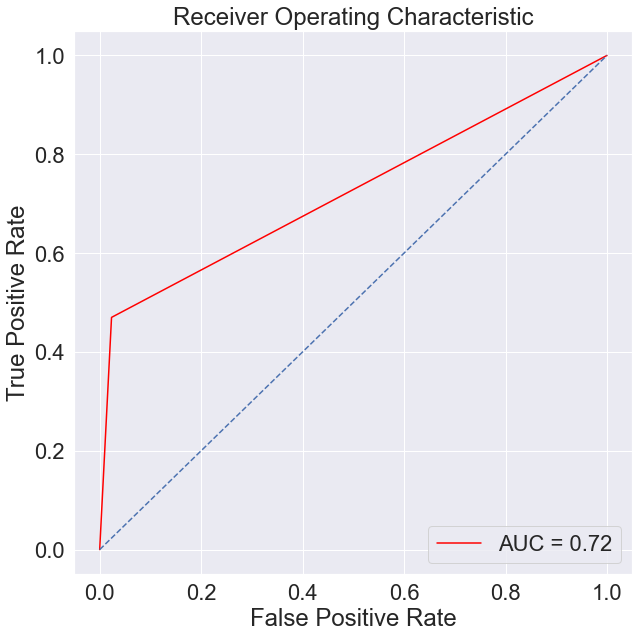

In [293]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [294]:
scores(random_forest)

Accuracy on training set :  0.9395118025751072
Accuracy on test set :  0.8976846057571964

Recall on training set :  0.6737967914438503
Recall on test set :  0.46987951807228917

Precision on training set :  0.8989298454221165
Precision on test set :  0.7878787878787878

F1 on training set :  0.7702496179317371
F1 on test set :  0.5886792452830188


* Random Forest classifier is also overfitting for the training set and the F1 score metric has also reduced.


**Random Forest Classifier with weights**

In [295]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=25)
random_forest_wt.fit(X_train_mobile,y_train_mobile)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=25)

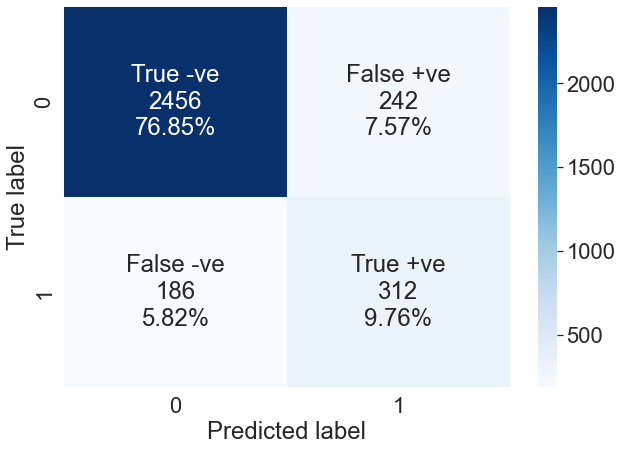

In [296]:
y_predict = random_forest_wt.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [297]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.7684049764662803

In [298]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7684049764662803

Text(0.5, 0, 'False Positive Rate')

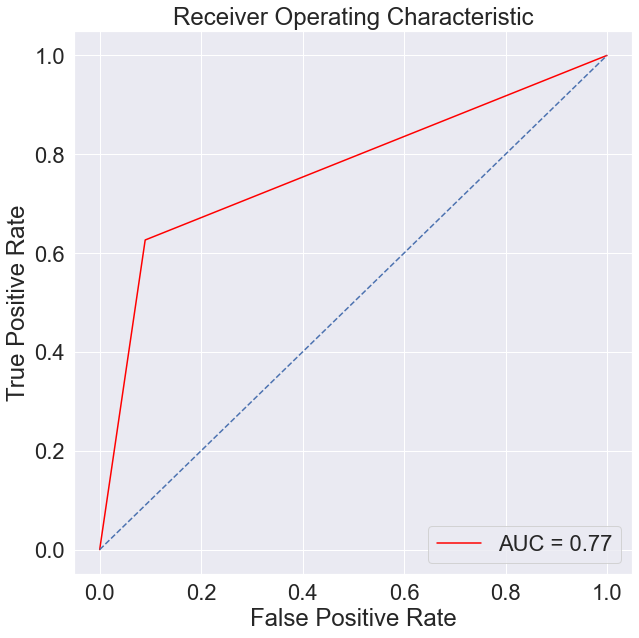

In [299]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [300]:
scores(random_forest_wt)

Accuracy on training set :  0.912151287553648
Accuracy on test set :  0.8660826032540676

Recall on training set :  0.8796791443850267
Recall on test set :  0.6265060240963856

Precision on training set :  0.654943596549436
Precision on test set :  0.5631768953068592

F1 on training set :  0.7508558387219474
F1 on test set :  0.5931558935361217


* There is no improvement in the metrics for the weighted Random Forest classifier.


### **GridSearch for Hyperparameter Tuning of the models:**
* Hyperparameters are variables that control the network structure of the Decision tree.
* As there is no direct way to calculate the effects of value change in hyperparamter has on the model, we will use a GridSearch
* This is a tuning technique that will compute the optimum values of specific hyperparameters of the model
* The parameters are optimized using a cross-validated GridSearch over a parameter grid


**Hyperparameters for Decision Tree Model**



In [301]:
from sklearn.model_selection import GridSearchCV

In [302]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train_mobile, y_train_mobile)


DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=10,
                       max_leaf_nodes=10, min_samples_leaf=2, random_state=25)

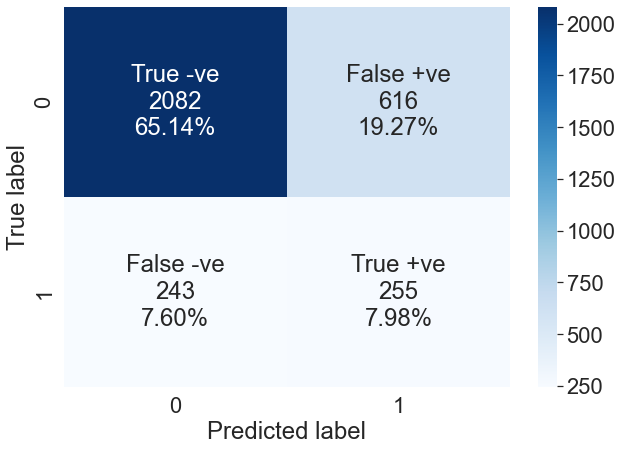

In [303]:
y_predict = classifier.predict(X_test_mobile) 
make_confusion_matrix(y_test_mobile,y_predict) 


In [304]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.6418654603588558

In [305]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6418654603588558

Text(0.5, 0, 'False Positive Rate')

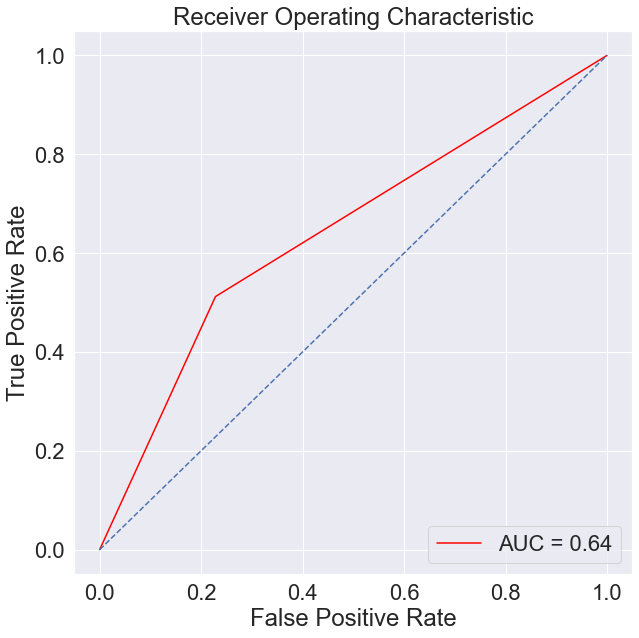

In [306]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [307]:
scores(classifier)

Accuracy on training set :  0.7461105150214592
Accuracy on test set :  0.731226533166458

Recall on training set :  0.5294117647058824
Recall on test set :  0.5120481927710844

Precision on training set :  0.30321592649310875
Precision on test set :  0.2927669345579793

F1 on training set :  0.38558909444985395
F1 on test set :  0.3725346968590212


* The F1Score has decreased to 0.38 for Train set and 0.37 for test set. 

In [308]:
X_train_mobile['yearly_avg_Outstation_checkins'] = X_train_mobile['yearly_avg_Outstation_checkins'].astype('int')
X_train_mobile['member_in_family'] = X_train_mobile['member_in_family'].astype('int')
X_test_mobile['yearly_avg_Outstation_checkins'] = X_test_mobile['yearly_avg_Outstation_checkins'].astype('int')
X_test_mobile['member_in_family'] = X_test_mobile['member_in_family'].astype('int')

Boosting Model:


**XGBoost Classifier**

In [309]:
from xgboost import XGBClassifier

In [310]:
XG_boost = XGBClassifier(random_state=25, eval_metric='logloss')
XG_boost.fit(X_train_mobile,y_train_mobile)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=25,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

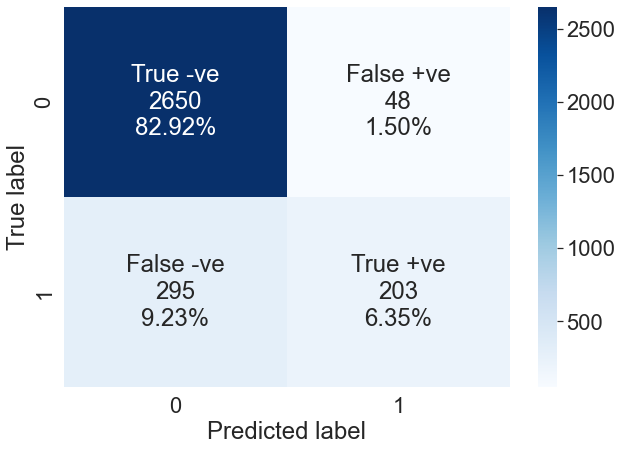

In [311]:
y_predict = XG_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [312]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.6949197829122271

In [313]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6949197829122271

Text(0.5, 0, 'False Positive Rate')

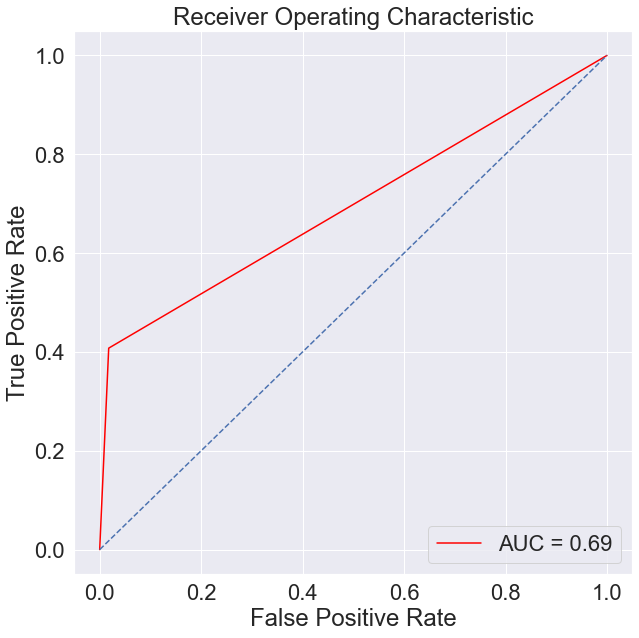

In [314]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [315]:
scores(XG_boost)

Accuracy on training set :  0.9224785407725322
Accuracy on test set :  0.8926783479349186

Recall on training set :  0.5365418894830659
Recall on test set :  0.40763052208835343

Precision on training set :  0.9121212121212121
Precision on test set :  0.8087649402390438

F1 on training set :  0.6756453423120089
F1 on test set :  0.5420560747663551





### GridSearch for Hyperparameter Tuning of the Boosting model:

Hyperparameters for XGBoost

In [316]:
xgb_tuned = XGBClassifier(random_state=25, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
     "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_mobile, y_train_mobile)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.55, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=25, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

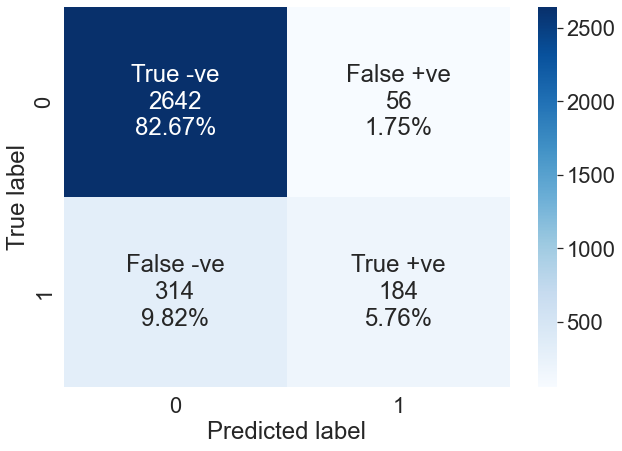

In [317]:
y_predict = xgb_tuned.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)


In [318]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.6743608980026853

In [319]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6743608980026853

Text(0.5, 0, 'False Positive Rate')

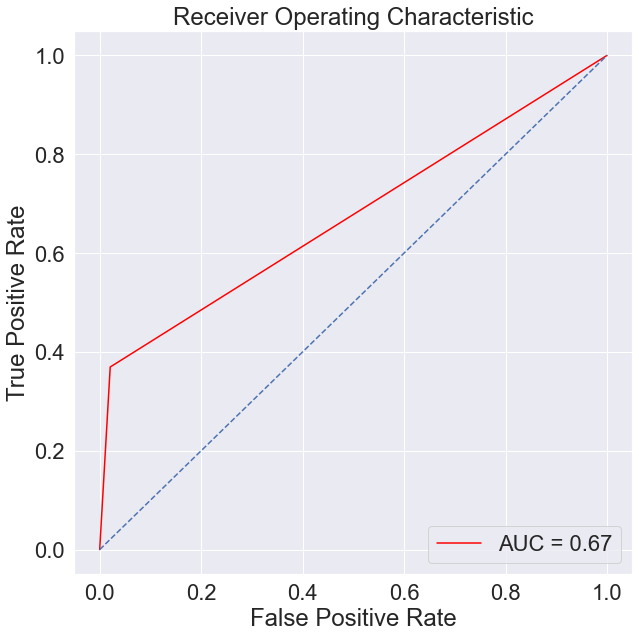

In [320]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [321]:
scores(xgb_tuned)

Accuracy on training set :  0.9134924892703863
Accuracy on test set :  0.8842302878598248

Recall on training set :  0.5017825311942959
Recall on test set :  0.36947791164658633

Precision on training set :  0.8674884437596302
Precision on test set :  0.7666666666666667

F1 on training set :  0.6357989836250706
F1 on test set :  0.49864498644986444


* The accuracy and F1score has increased.

In [322]:
from sklearn.linear_model import LogisticRegression

In [323]:
logreg = LogisticRegression()
logreg.fit(X_train_mobile, y_train_mobile)

LogisticRegression()

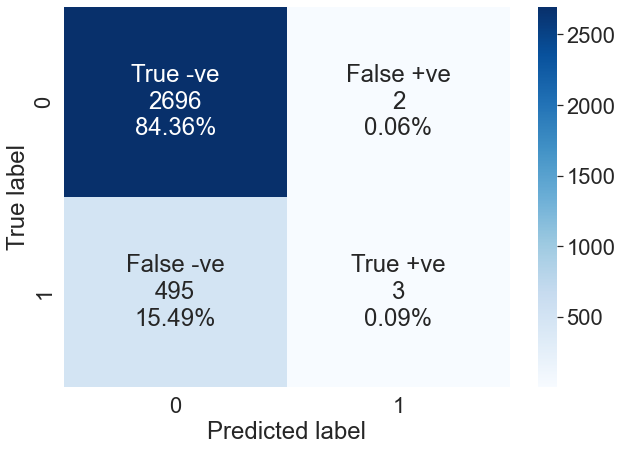

In [324]:
y_predict = logreg.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [325]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5026414032706066

In [326]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5026414032706066

Text(0.5, 0, 'False Positive Rate')

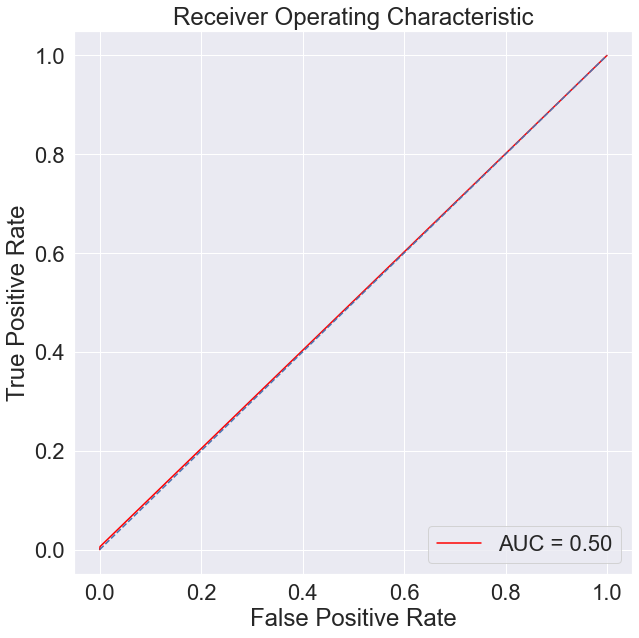

In [327]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [328]:
scores(logreg)

Accuracy on training set :  0.850456008583691
Accuracy on test set :  0.8444931163954944

Recall on training set :  0.008021390374331552
Recall on test set :  0.006024096385542169

Precision on training set :  0.8181818181818182
Precision on test set :  0.6

F1 on training set :  0.015887025595763462
F1 on test set :  0.011928429423459246


In [329]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_mobile, y_test_mobile)))


Accuracy of logistic regression classifier on test set: 0.84


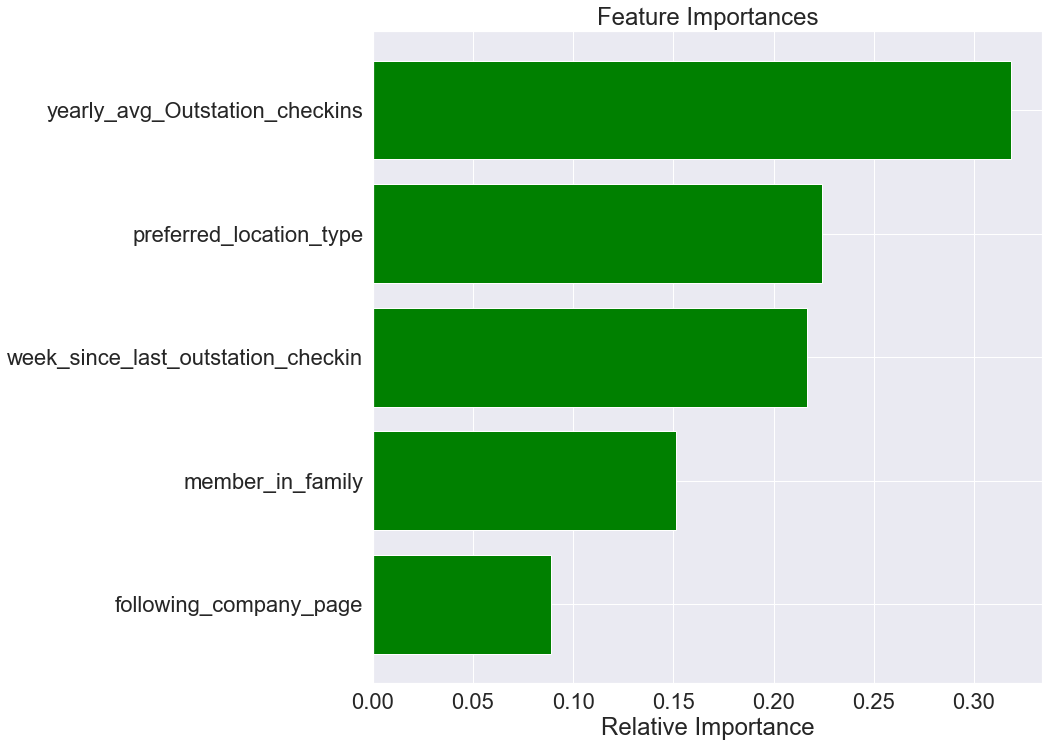

In [330]:
feature_names = X_train_mobile.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [331]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5026414032706066

In [332]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5026414032706066

Text(0.5, 0, 'False Positive Rate')

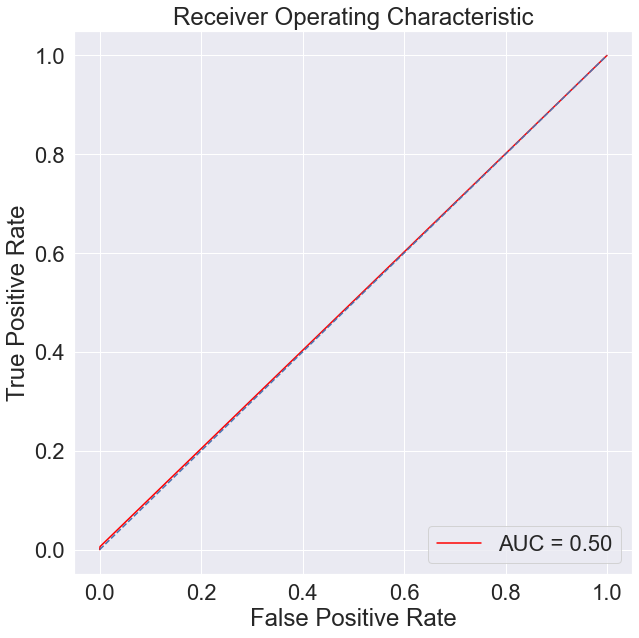

In [333]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [334]:
scores(random_forest) #peformance scores for Random Forest

Accuracy on training set :  0.9395118025751072
Accuracy on test set :  0.8976846057571964

Recall on training set :  0.6737967914438503
Recall on test set :  0.46987951807228917

Precision on training set :  0.8989298454221165
Precision on test set :  0.7878787878787878

F1 on training set :  0.7702496179317371
F1 on test set :  0.5886792452830188


## ADA Boost

In [335]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

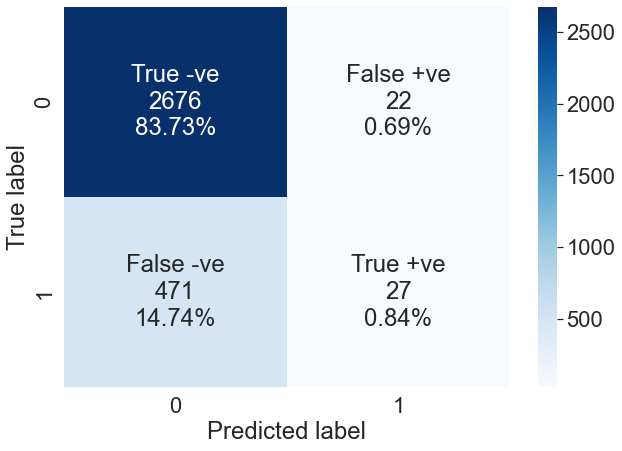

In [336]:
Ada_boost = AdaBoostClassifier(random_state=25)
Ada_boost.fit(X_train_mobile, y_train_mobile)
y_pred = Ada_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_pred)

In [337]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5026414032706066

In [338]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5026414032706066

Text(0.5, 0, 'False Positive Rate')

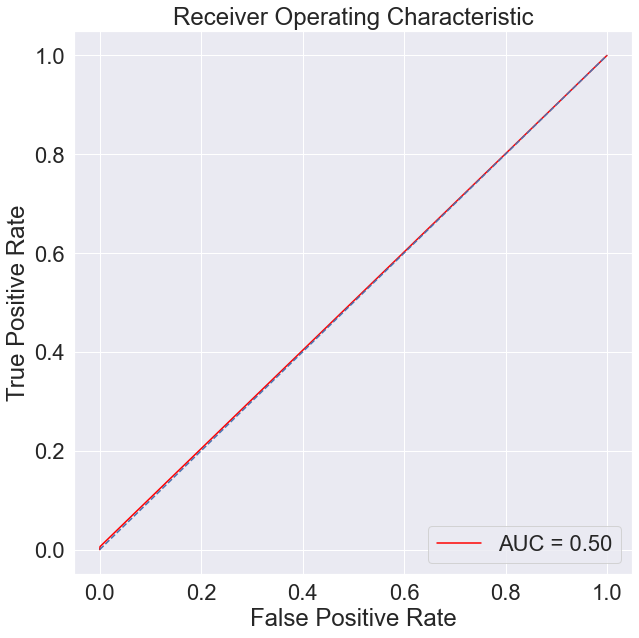

In [339]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [340]:
scores(Ada_boost)

Accuracy on training set :  0.8516630901287554
Accuracy on test set :  0.8457446808510638

Recall on training set :  0.040106951871657755
Recall on test set :  0.05421686746987952

Precision on training set :  0.6081081081081081
Precision on test set :  0.5510204081632653

F1 on training set :  0.07525083612040134
F1 on test set :  0.09872029250457039


## Gradient Boost Classifier

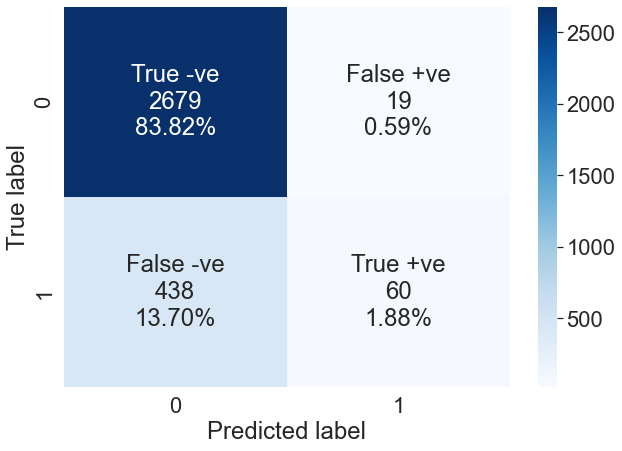

In [341]:
Grad_boost = GradientBoostingClassifier(random_state=25)
Grad_boost.fit(X_train_mobile, y_train_mobile)
y_predict = Grad_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [342]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5567198370948583

In [343]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5567198370948583

Text(0.5, 0, 'False Positive Rate')

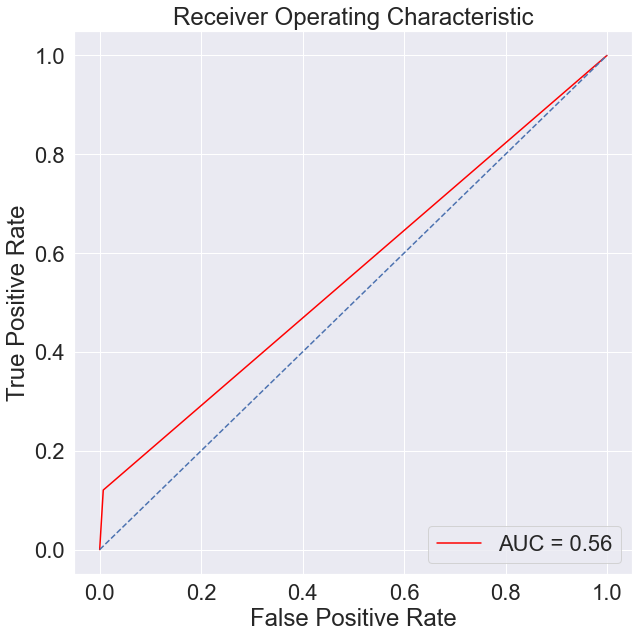

In [344]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [345]:
scores(Grad_boost)

Accuracy on training set :  0.862392703862661
Accuracy on test set :  0.8570087609511889

Recall on training set :  0.11853832442067737
Recall on test set :  0.12048192771084337

Precision on training set :  0.7823529411764706
Precision on test set :  0.759493670886076

F1 on training set :  0.2058823529411765
F1 on test set :  0.2079722703639515


## Gradient Boost with ADABoost classifier

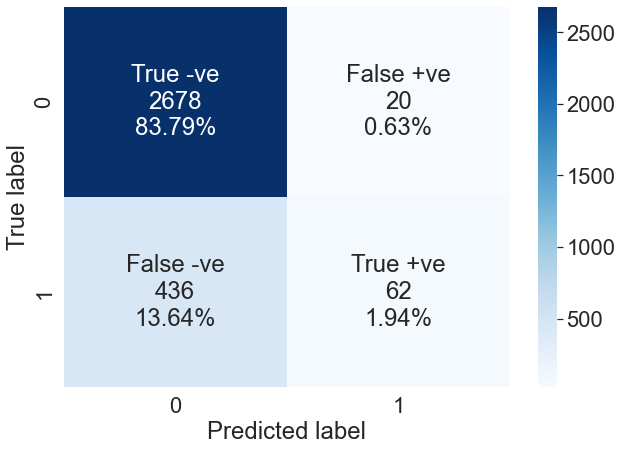

In [346]:
Grad_boost_ada = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)
Grad_boost_ada.fit(X_train_mobile, y_train_mobile)
y_predict = Grad_boost_ada.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [347]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5585425467622901

In [348]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5585425467622901

Text(0.5, 0, 'False Positive Rate')

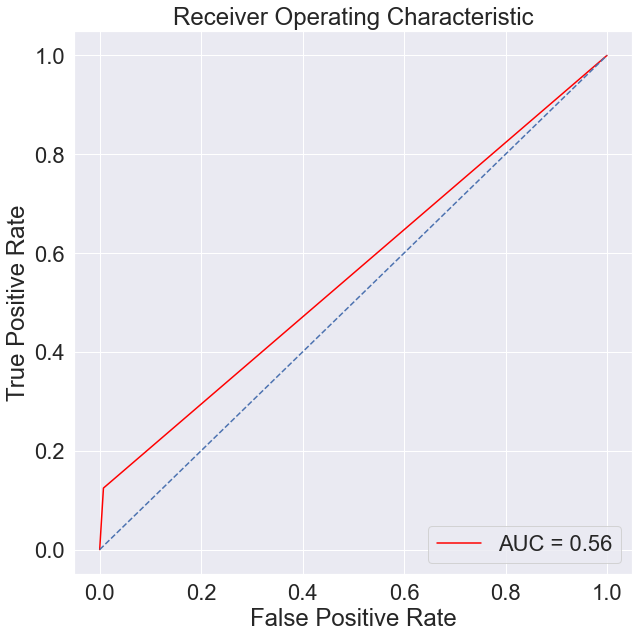

In [349]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [350]:
scores(Grad_boost_ada)

Accuracy on training set :  0.862392703862661
Accuracy on test set :  0.8573216520650814

Recall on training set :  0.11586452762923351
Recall on test set :  0.12449799196787148

Precision on training set :  0.7926829268292683
Precision on test set :  0.7560975609756098

F1 on training set :  0.20217729393468117
F1 on test set :  0.21379310344827585


## Bagging Classifier

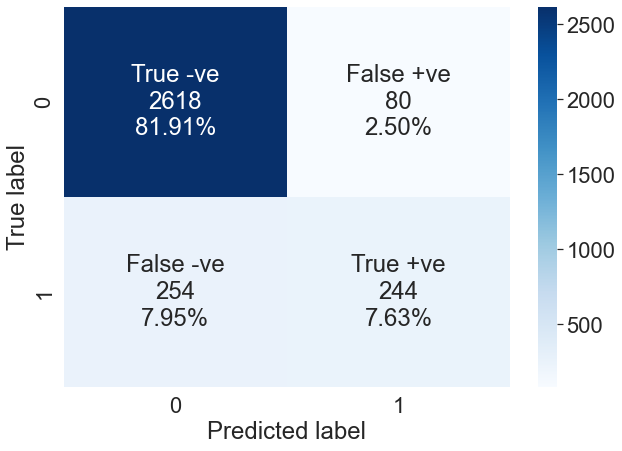

In [351]:
bagging = BaggingClassifier(random_state=25) #defining the classifier with randomstate 25
bagging.fit(X_train_mobile, y_train_mobile)
y_predict = bagging.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [352]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.7301541227921322

In [353]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7301541227921322

Text(0.5, 0, 'False Positive Rate')

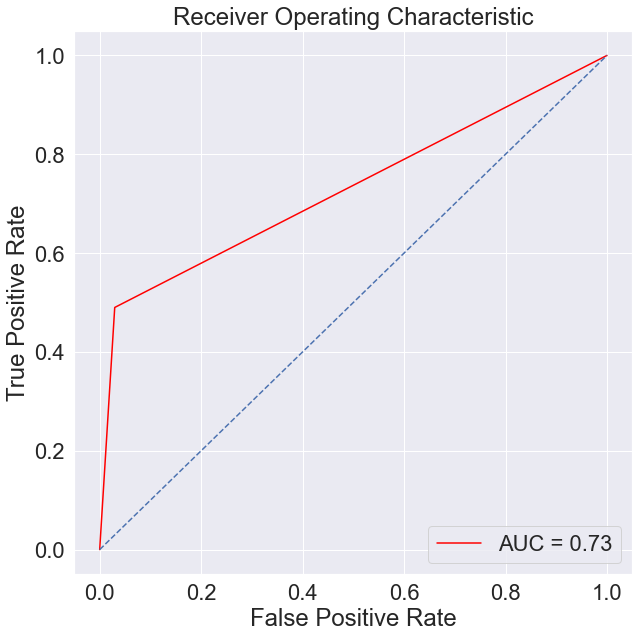

In [354]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [355]:
scores(bagging)

Accuracy on training set :  0.9372317596566524
Accuracy on test set :  0.89549436795995

Recall on training set :  0.6720142602495544
Recall on test set :  0.4899598393574297

Precision on training set :  0.882903981264637
Precision on test set :  0.7530864197530864

F1 on training set :  0.7631578947368421
F1 on test set :  0.5936739659367396


### Hyperparameters for Bagging Classifier

In [356]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=25, bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_mobile, y_train_mobile)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50,
                  random_state=25)

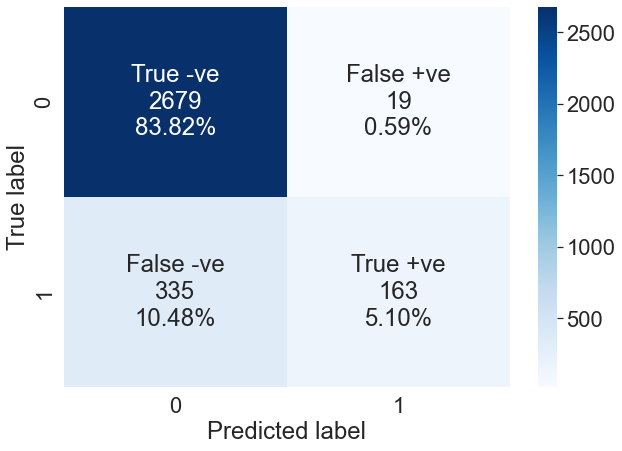

In [357]:
y_predict = bagging_estimator_tuned.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [358]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.6601334917133322

In [359]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6601334917133322

Text(0.5, 0, 'False Positive Rate')

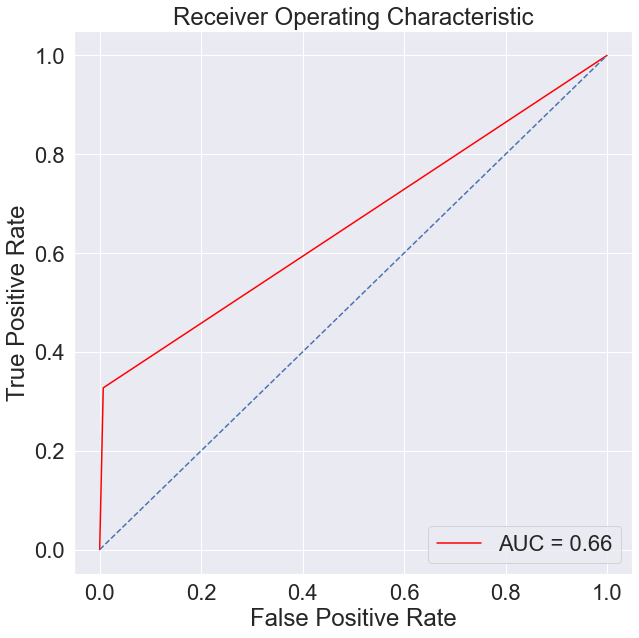

In [360]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [361]:
scores(bagging_estimator_tuned)

Accuracy on training set :  0.9208690987124464
Accuracy on test set :  0.8892365456821026

Recall on training set :  0.48841354723707664
Recall on test set :  0.3273092369477912

Precision on training set :  0.9716312056737588
Precision on test set :  0.8956043956043956

F1 on training set :  0.6500593119810202
F1 on test set :  0.4794117647058824


## Linear Discriminant Analysis

In [362]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_mobile, y_train_mobile)

LinearDiscriminantAnalysis()

In [363]:
lda.explained_variance_ratio_

array([1.])

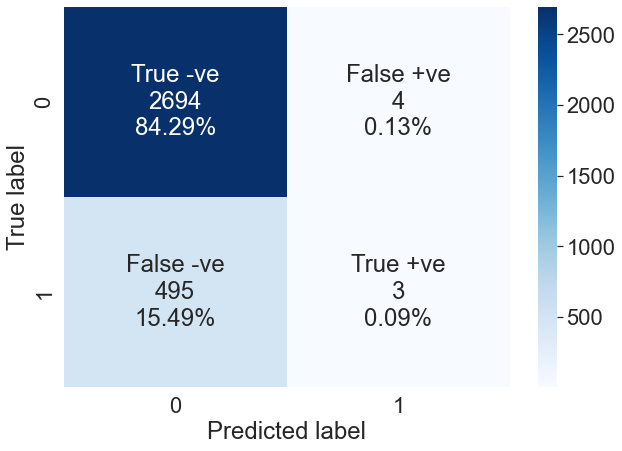

In [364]:
y_predict = lda.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [365]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5022707583484419

In [366]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5022707583484419

Text(0.5, 0, 'False Positive Rate')

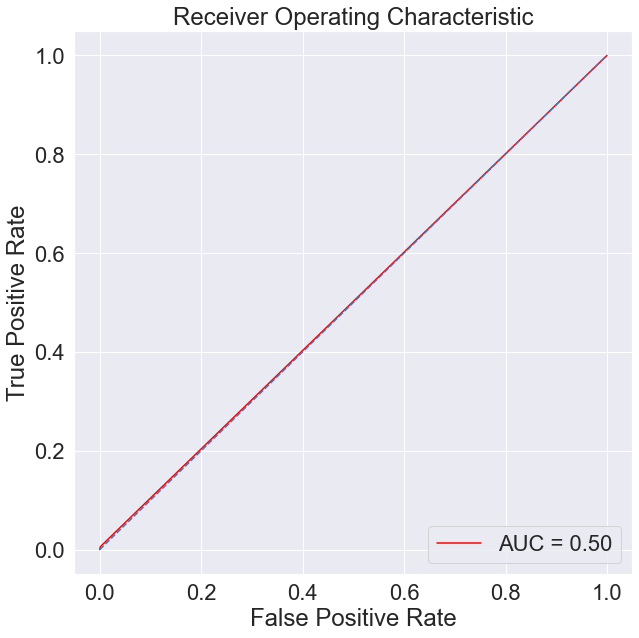

In [367]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [368]:
scores(lda)

Accuracy on training set :  0.8500536480686696
Accuracy on test set :  0.8438673341677096

Recall on training set :  0.008912655971479501
Recall on test set :  0.006024096385542169

Precision on training set :  0.625
Precision on test set :  0.42857142857142855

F1 on training set :  0.01757469244288225
F1 on test set :  0.011881188118811883


## KNN Classifier

In [369]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_mobile, y_train_mobile)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_mobile, y_train_mobile)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_mobile, y_test_mobile) 


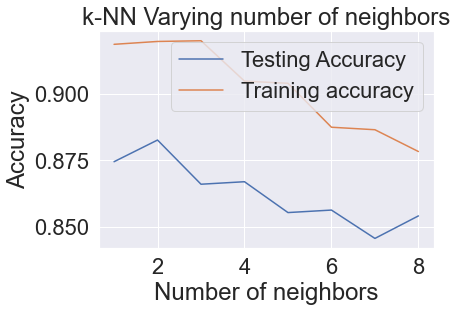

In [370]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [371]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)


In [372]:
#Fit the model
knn.fit(X_train_mobile,y_train_mobile)

KNeighborsClassifier(n_neighbors=7)

In [373]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test_mobile,y_test_mobile)

0.8457446808510638

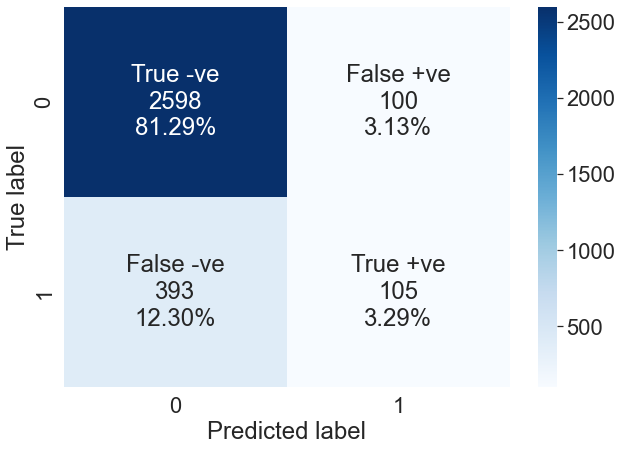

In [374]:
y_predict = knn.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [375]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5868894406387596

In [376]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5868894406387596

Text(0.5, 0, 'False Positive Rate')

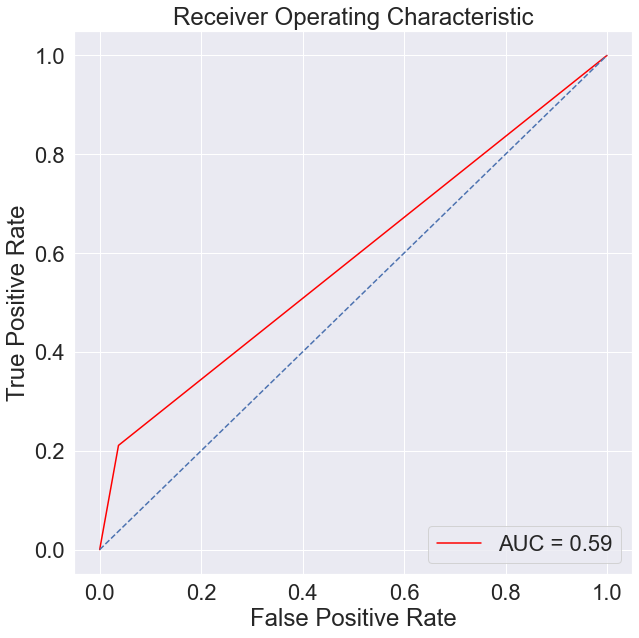

In [377]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [378]:
scores(knn)

Accuracy on training set :  0.8865343347639485
Accuracy on test set :  0.8457446808510638

Recall on training set :  0.37433155080213903
Recall on test set :  0.21084337349397592

Precision on training set :  0.7446808510638298
Precision on test set :  0.5121951219512195

F1 on training set :  0.498220640569395
F1 on test set :  0.29871977240398295


## Naive Bayes Classifier

In [379]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_mobile, y_train_mobile)

GaussianNB()

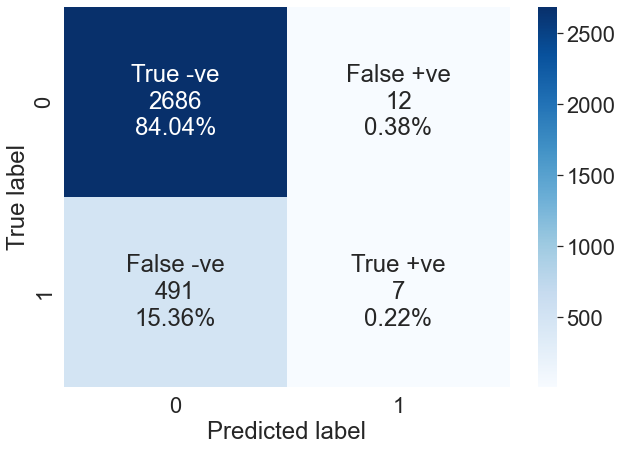

In [380]:
y_predict = gnb.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [381]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.5048042429168117

In [382]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5048042429168117

Text(0.5, 0, 'False Positive Rate')

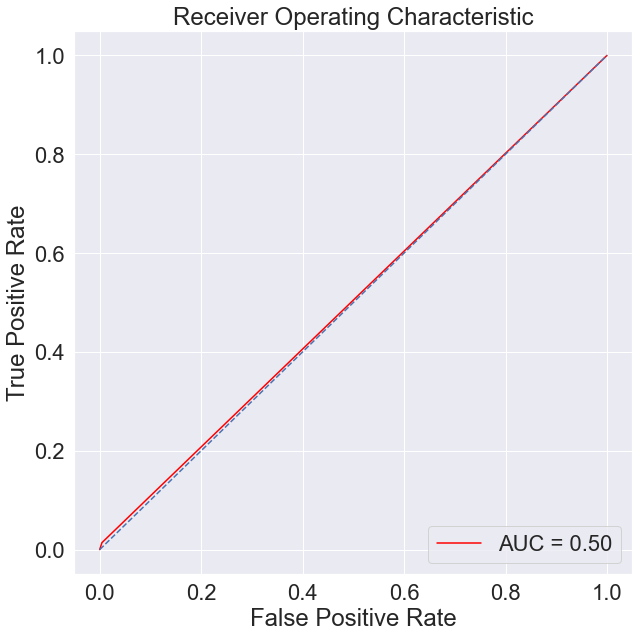

In [383]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [384]:
scores(gnb)

Accuracy on training set :  0.8488465665236051
Accuracy on test set :  0.8426157697121401

Recall on training set :  0.015151515151515152
Recall on test set :  0.014056224899598393

Precision on training set :  0.4358974358974359
Precision on test set :  0.3684210526315789

F1 on training set :  0.029285099052540915
F1 on test set :  0.027079303675048353


In [385]:
# defining list of models
all_models = [Dt,classifier,random_forest,XG_boost,xgb_tuned, logreg, Ada_boost,Grad_boost, Grad_boost_ada, bagging, bagging_estimator_tuned, lda, knn, gnb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])

In [386]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','XGBoost Classifier','Tuned XGBoost Classifier','Logistic Regression','Ada boost','Gradient boost','Gradient and Ada Boost','Bagging','Bagging estimator tuned','Linear Discrimant Analysis', 'KNN','Naive Bayes Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_F1-Score  \
9                      Bagging        0.937232       0.895494        0.763158   
2                Random Forest        0.939512       0.897685        0.770250   
0                Decision Tree        0.939512       0.892678        0.763751   
3           XGBoost Classifier        0.922479       0.892678        0.675645   
4     Tuned XGBoost Classifier        0.913492       0.884230        0.635799   
10     Bagging estimator tuned        0.920869       0.889237        0.650059   
1          Tuned Decision Tree        0.746111       0.731227        0.385589   
12                         KNN        0.886534       0.845745        0.498221   
8       Gradient and Ada Boost        0.862393       0.857322        0.202177   
7               Gradient boost        0.862393       0.857009        0.205882   
6                    Ada boost        0.851663       0.845745        0.075251   
13      Naive Bayes Classifier        0.848847       0.842616        0.029285   
5          Logistic Regression        0.850456       0.844493        0.015887   
11  Linear Discrimant Analysis        0.850054       0.843867        0.017575   

    Test_F1-Score  
9        0.593674  
2        0.588679  
0        0.580171  
3        0.542056  
4        0.498645  
10       0.479412  
1        0.372535  
12       0.298720  
8        0.213793  
7        0.207972  
6        0.098720  
13       0.027079  
5        0.011928  
11       0.011881

In [387]:
#Sorting models in decreasing order of test accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_F1-Score  \
2                Random Forest        0.939512       0.897685        0.770250   
9                      Bagging        0.937232       0.895494        0.763158   
0                Decision Tree        0.939512       0.892678        0.763751   
3           XGBoost Classifier        0.922479       0.892678        0.675645   
10     Bagging estimator tuned        0.920869       0.889237        0.650059   
4     Tuned XGBoost Classifier        0.913492       0.884230        0.635799   
8       Gradient and Ada Boost        0.862393       0.857322        0.202177   
7               Gradient boost        0.862393       0.857009        0.205882   
6                    Ada boost        0.851663       0.845745        0.075251   
12                         KNN        0.886534       0.845745        0.498221   
5          Logistic Regression        0.850456       0.844493        0.015887   
11  Linear Discrimant Analysis        0.850054       0.843867        0.017575   
13      Naive Bayes Classifier        0.848847       0.842616        0.029285   
1          Tuned Decision Tree        0.746111       0.731227        0.385589   

    Test_F1-Score  
2        0.588679  
9        0.593674  
0        0.580171  
3        0.542056  
10       0.479412  
4        0.498645  
8        0.213793  
7        0.207972  
6        0.098720  
12       0.298720  
5        0.011928  
11       0.011881  
13       0.027079  
1        0.372535

## **Model training for Laptop.**

In [388]:
df_laptop.corr()

Taken_product  preferred_location_type  \
Taken_product                            1.000000                 0.039108   
preferred_location_type                  0.039108                 1.000000   
Yearly_avg_comment_on_travel_page        0.041578                -0.002728   
week_since_last_outstation_checkin       0.047308                -0.015379   
following_company_page                   0.262993                 0.007902   

                                    Yearly_avg_comment_on_travel_page  \
Taken_product                                                0.041578   
preferred_location_type                                     -0.002728   
Yearly_avg_comment_on_travel_page                            1.000000   
week_since_last_outstation_checkin                           0.043860   
following_company_page                                      -0.034019   

                                    week_since_last_outstation_checkin  \
Taken_product                                                 0.047308   
preferred_location_type                                      -0.015379   
Yearly_avg_comment_on_travel_page                             0.043860   
week_since_last_outstation_checkin                            1.000000   
following_company_page                                        0.011444   

                                    following_company_page  
Taken_product                                     0.262993  
preferred_location_type                           0.007902  
Yearly_avg_comment_on_travel_page                -0.034019  
week_since_last_outstation_checkin                0.011444  
following_company_page                            1.000000

In [389]:
df_laptop.shape

(1108, 7)

#### Train & Test splits.

In [390]:
train_laptop, test_laptop = train_test_split(df_laptop, test_size=0.3)

In [391]:
train_laptop.shape

(775, 7)

In [392]:
test_laptop.shape

(333, 7)

In [393]:
X_train_laptop = train_laptop.drop(['Taken_product'], axis='columns')
y_train_laptop = train_laptop['Taken_product']
y_train_laptop.head()

9396    0
9221    0
6321    0
9324    1
7552    0
Name: Taken_product, dtype: int64

In [394]:
X_train_laptop.head()

yearly_avg_Outstation_checkins member_in_family  preferred_location_type  \
9396                              8                1                        1   
9221                              6                3                        0   
6321                              5                2                       10   
9324                             26                4                        0   
7552                             10                4                        6   

      Yearly_avg_comment_on_travel_page  week_since_last_outstation_checkin  \
9396                              102.0                                   0   
9221                              107.0                                  11   
6321                              102.0                                   4   
9324                              121.0                                   2   
7552                               55.0                                   1   

      following_company_page  
9396                       2  
9221                       2  
6321                       2  
9324                       2  
7552                       3

In [395]:
X_test_laptop = test_laptop.drop(['Taken_product'], axis='columns')
y_test_laptop = test_laptop['Taken_product']
y_test_laptop.head()

6746     0
11138    0
9877     1
11505    0
10285    0
Name: Taken_product, dtype: int64

In [396]:
X_test_laptop.head()

yearly_avg_Outstation_checkins member_in_family  \
6746                               2                4   
11138                              4                4   
9877                              13                3   
11505                              2                4   
10285                             23                2   

       preferred_location_type  Yearly_avg_comment_on_travel_page  \
6746                         6                               71.0   
11138                       10                               59.0   
9877                        14                               70.0   
11505                        6                               97.0   
10285                        6                               58.0   

       week_since_last_outstation_checkin  following_company_page  
6746                                    5                       2  
11138                                   1                       2  
9877                                    5                       2  
11505                                   1                       3  
10285                                   4                       2

**Building the Model:**
* We will start with a Decision Tree model
* Next, we will build one ensemble model - Random Forest Classifier
* Then, we will build one Boosting ensemble models - XG Boost
* Then, we will build one statistical model - Logistic Regression
* We will first build them with their default parameters and later hypertune them for optimization.
* We will also calculate all four metrics; Accuracy, Recall, Precision and F1Score which is the metric of interest.
* F1Score is the weighted average of Precision and Recall. Its takes both False positives and False negatives into account.




### **Decision Tree**

We will keep the same randomstate = 25 for all the models so that the same random values are chosen

In [397]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()

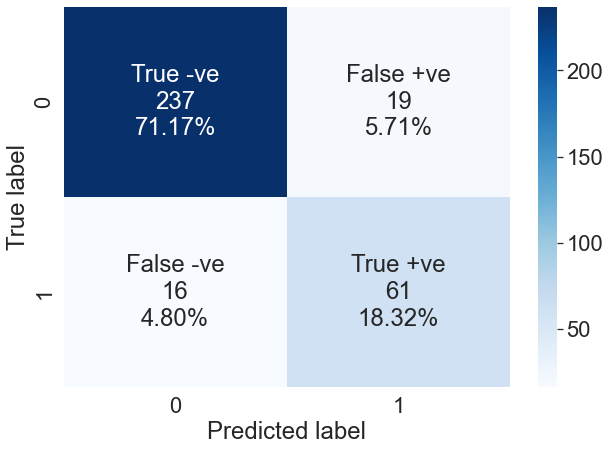

In [398]:
Dt.fit(X_train_laptop, y_train_laptop) #fit the train set to Decision tree
y_predict = Dt.predict(X_test_laptop) 
make_confusion_matrix(y_test_laptop, y_predict)

In [399]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8589945211038961

In [400]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8589945211038961

Text(0.5, 0, 'False Positive Rate')

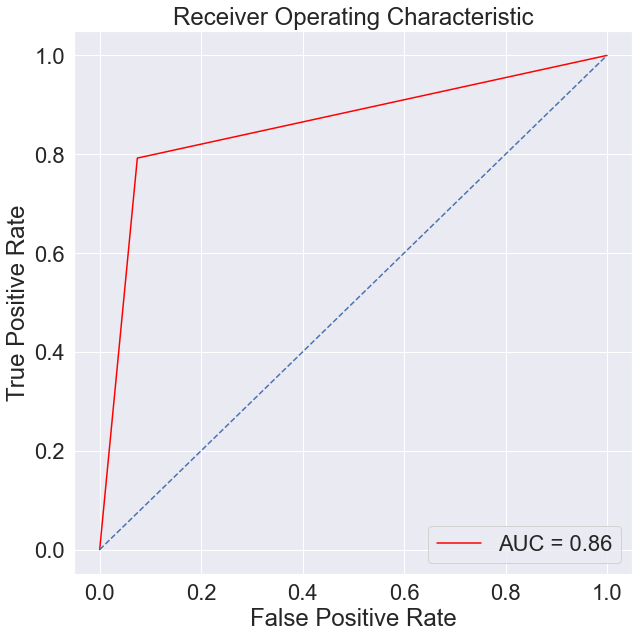

In [401]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [402]:
scores_l(Dt)

Accuracy on training set :  1.0
Accuracy on test set :  0.8948948948948949

Recall on training set :  1.0
Recall on test set :  0.7922077922077922

Precision on training set :  1.0
Precision on test set :  0.7625

F1 on training set :  1.0
F1 on test set :  0.7770700636942675


### **Random Forest Classifier**

In [403]:
from sklearn.ensemble import RandomForestClassifier

In [404]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train_laptop,y_train_laptop)


RandomForestClassifier(random_state=25)

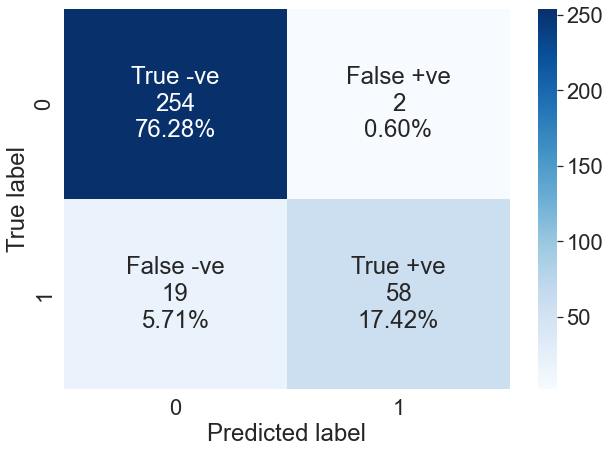

In [405]:
y_predict = random_forest.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [406]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8727171266233766

In [407]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8727171266233766

Text(0.5, 0, 'False Positive Rate')

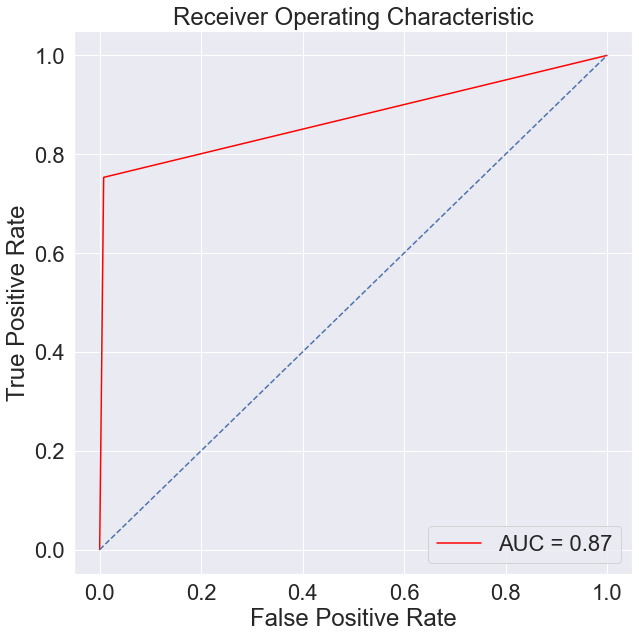

In [408]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [409]:
scores_l(random_forest)

Accuracy on training set :  1.0
Accuracy on test set :  0.9369369369369369

Recall on training set :  1.0
Recall on test set :  0.7532467532467533

Precision on training set :  1.0
Precision on test set :  0.9666666666666667

F1 on training set :  1.0
F1 on test set :  0.8467153284671532





**Random Forest Classifier with weights**

In [410]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=25)
random_forest_wt.fit(X_train_laptop,y_train_laptop)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=25)

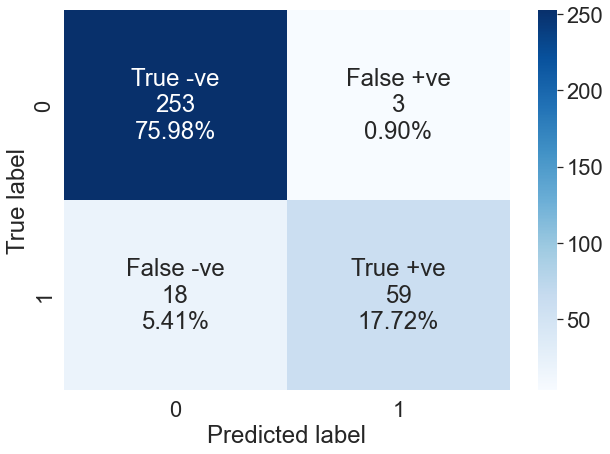

In [411]:
y_predict = random_forest_wt.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [412]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8772575081168832

In [413]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8772575081168832

Text(0.5, 0, 'False Positive Rate')

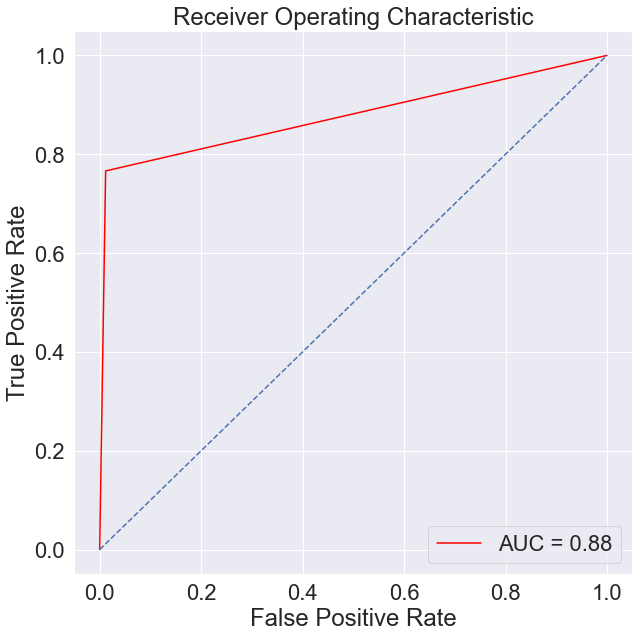

In [414]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [415]:
scores_l(random_forest_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.9369369369369369

Recall on training set :  1.0
Recall on test set :  0.7662337662337663

Precision on training set :  1.0
Precision on test set :  0.9516129032258065

F1 on training set :  1.0
F1 on test set :  0.8489208633093526


* There is little improvement in the metrics for the weighted Random Forest classifier.


## Feature Importance of Random Forest

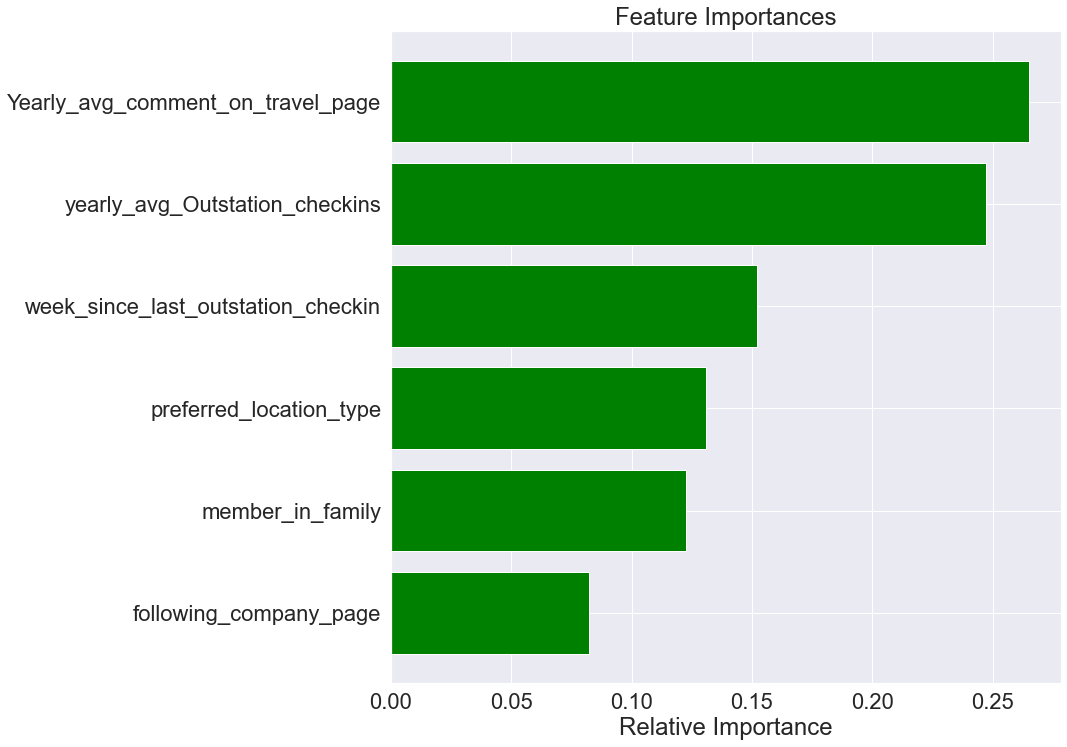

In [416]:
feature_names = X_train_laptop.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()




### **GridSearch for Hyperparameter Tuning of the models:**
* Hyperparameters are variables that control the network structure of the Decision tree.
* As there is no direct way to calculate the effects of value change in hyperparamter has on the model, we will use a GridSearch
* This is a tuning technique that will compute the optimum values of specific hyperparameters of the model
* The parameters are optimized using a cross-validated GridSearch over a parameter grid


**Hyperparameters for Decision Tree Model**



In [417]:
from sklearn.model_selection import GridSearchCV

In [418]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train_laptop, y_train_laptop)


DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=15, min_samples_leaf=5,
                       random_state=25)

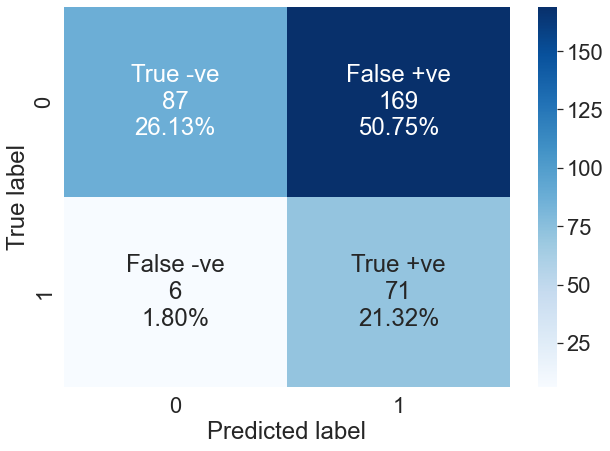

In [419]:
y_predict = classifier.predict(X_test_laptop) 
make_confusion_matrix(y_test_laptop,y_predict) 


In [420]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.630960836038961

In [421]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.630960836038961

Text(0.5, 0, 'False Positive Rate')

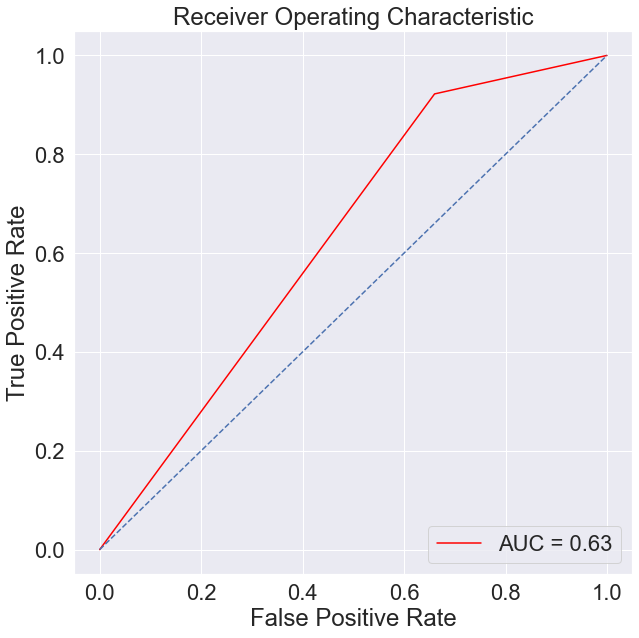

In [422]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [423]:
scores_l(classifier)

Accuracy on training set :  0.5212903225806451
Accuracy on test set :  0.4744744744744745

Recall on training set :  0.9899497487437185
Recall on test set :  0.922077922077922

Precision on training set :  0.3480565371024735
Precision on test set :  0.29583333333333334

F1 on training set :  0.515032679738562
F1 on test set :  0.4479495268138801


In [424]:
X_train_laptop['yearly_avg_Outstation_checkins'] = X_train_laptop['yearly_avg_Outstation_checkins'].astype('int')
X_train_laptop['member_in_family'] = X_train_laptop['member_in_family'].astype('int')
X_test_laptop['yearly_avg_Outstation_checkins'] = X_test_laptop['yearly_avg_Outstation_checkins'].astype('int')
X_test_laptop['member_in_family'] = X_test_laptop['member_in_family'].astype('int')

## Boosting Model:


**XGBoost Classifier**

In [425]:
from xgboost import XGBClassifier

In [426]:
XG_boost = XGBClassifier(random_state=25, eval_metric='logloss')
XG_boost.fit(X_train_laptop,y_train_laptop)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=25,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

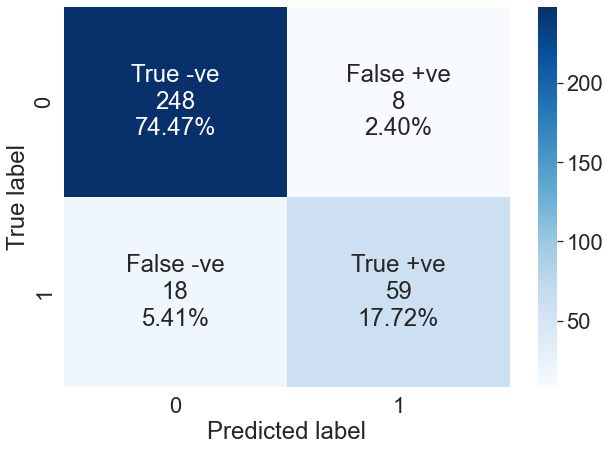

In [427]:
y_predict = XG_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [428]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8674918831168832

In [429]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8674918831168832

Text(0.5, 0, 'False Positive Rate')

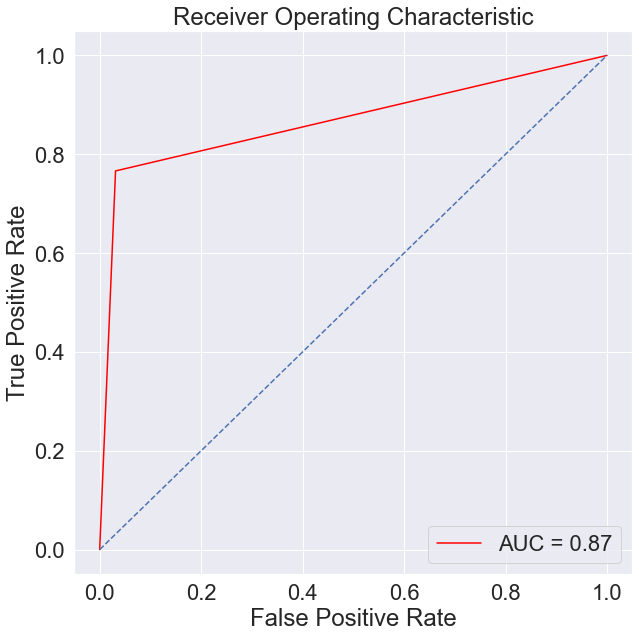

In [430]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [431]:
scores_l(XG_boost)

Accuracy on training set :  1.0
Accuracy on test set :  0.9219219219219219

Recall on training set :  1.0
Recall on test set :  0.7662337662337663

Precision on training set :  1.0
Precision on test set :  0.8805970149253731

F1 on training set :  1.0
F1 on test set :  0.8194444444444445





### GridSearch for Hyperparameter Tuning of the Boosting model:

Hyperparameters for XGBoost

In [432]:
xgb_tuned = XGBClassifier(random_state=25, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
     "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_laptop, y_train_laptop)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.55, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=25, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

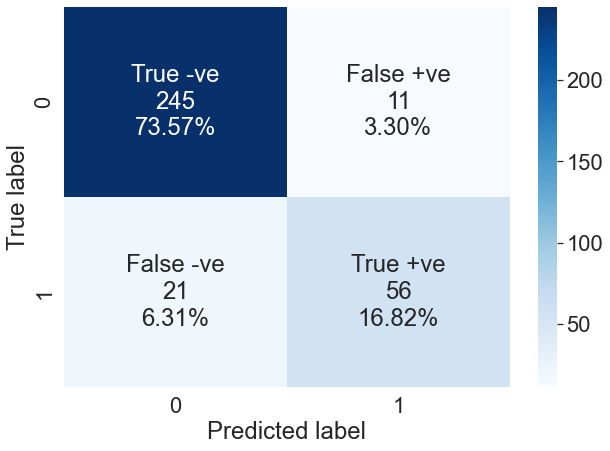

In [433]:
y_predict = xgb_tuned.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)


In [434]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8421519886363636

In [435]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8421519886363636

Text(0.5, 0, 'False Positive Rate')

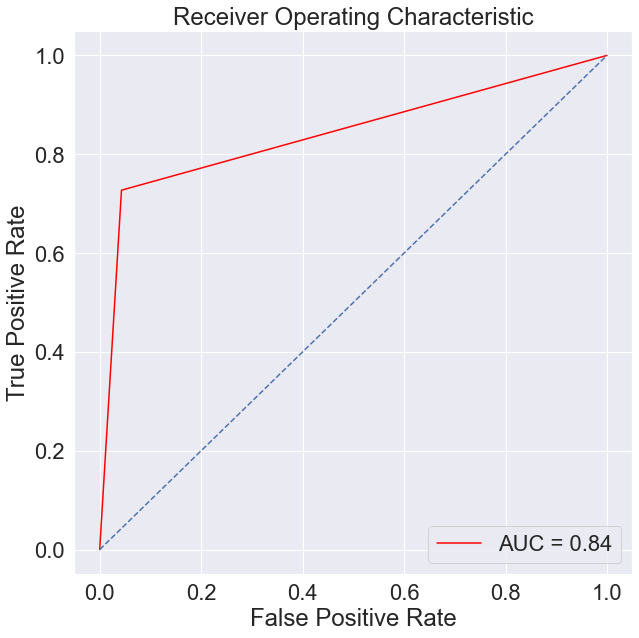

In [436]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [437]:
scores_l(xgb_tuned)

Accuracy on training set :  0.9987096774193548
Accuracy on test set :  0.9039039039039038

Recall on training set :  1.0
Recall on test set :  0.7272727272727273

Precision on training set :  0.995
Precision on test set :  0.835820895522388

F1 on training set :  0.9974937343358395
F1 on test set :  0.7777777777777778


## Logistic Regression

In [438]:
from sklearn.linear_model import LogisticRegression

In [439]:
logreg = LogisticRegression()
logreg.fit(X_train_laptop, y_train_laptop)

LogisticRegression()

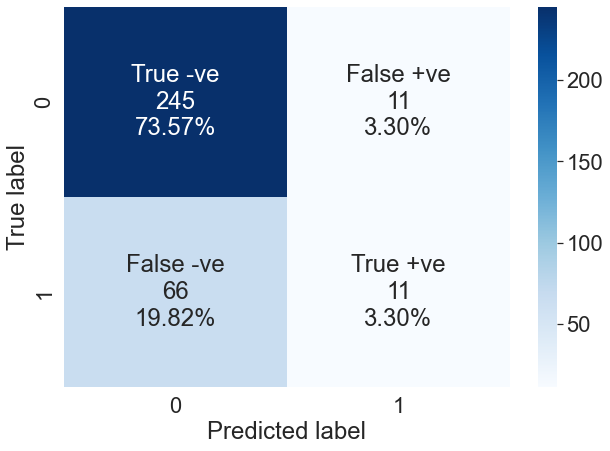

In [440]:
y_predict = logreg.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [441]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5499441964285714

In [442]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5499441964285714

Text(0.5, 0, 'False Positive Rate')

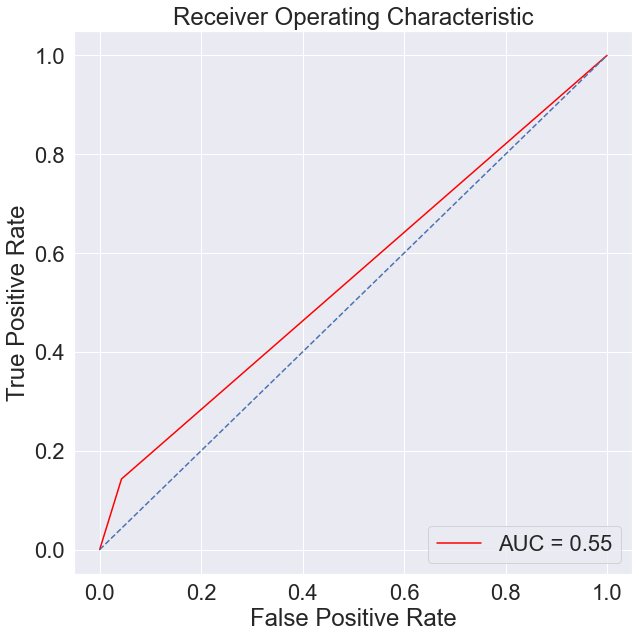

In [443]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [444]:
scores_l(logreg)

Accuracy on training set :  0.7625806451612903
Accuracy on test set :  0.7687687687687688

Recall on training set :  0.16080402010050251
Recall on test set :  0.14285714285714285

Precision on training set :  0.6530612244897959
Precision on test set :  0.5

F1 on training set :  0.25806451612903225
F1 on test set :  0.22222222222222224


In [445]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_laptop, y_test_laptop)))


Accuracy of logistic regression classifier on test set: 0.77


## ADA Boost

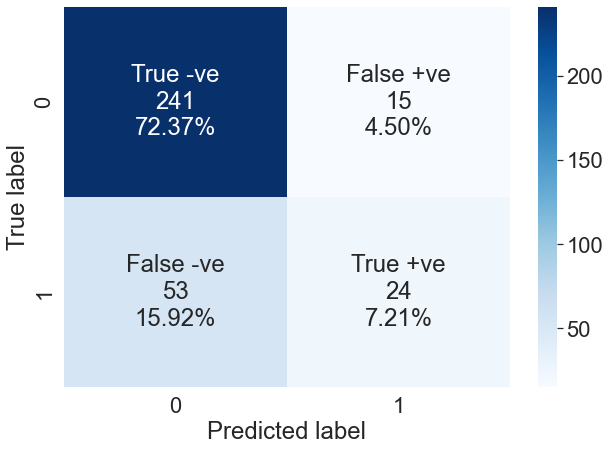

In [446]:
Ada_boost = AdaBoostClassifier(random_state=25)
Ada_boost.fit(X_train_laptop, y_train_laptop)
y_pred = Ada_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_pred)

In [447]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5499441964285714

In [448]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5499441964285714

Text(0.5, 0, 'False Positive Rate')

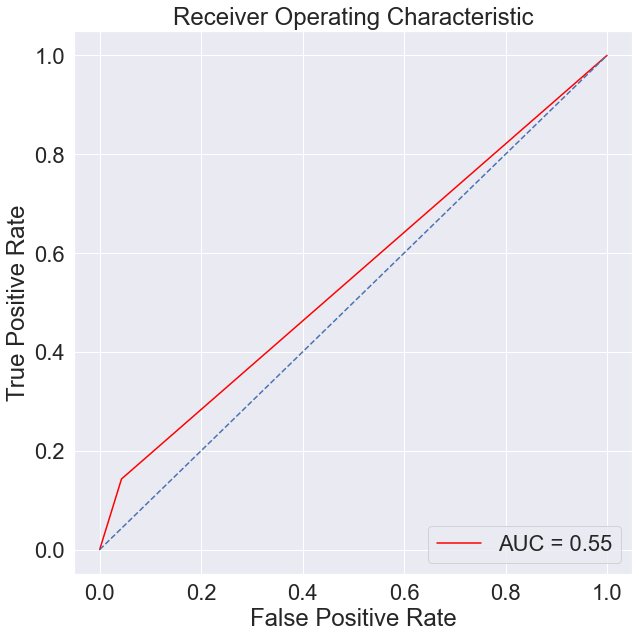

In [449]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [450]:
scores_l(Ada_boost)

Accuracy on training set :  0.7948387096774193
Accuracy on test set :  0.7957957957957958

Recall on training set :  0.36180904522613067
Recall on test set :  0.3116883116883117

Precision on training set :  0.6923076923076923
Precision on test set :  0.6153846153846154

F1 on training set :  0.4752475247524752
F1 on test set :  0.41379310344827586


## Gradient Boost Classifier

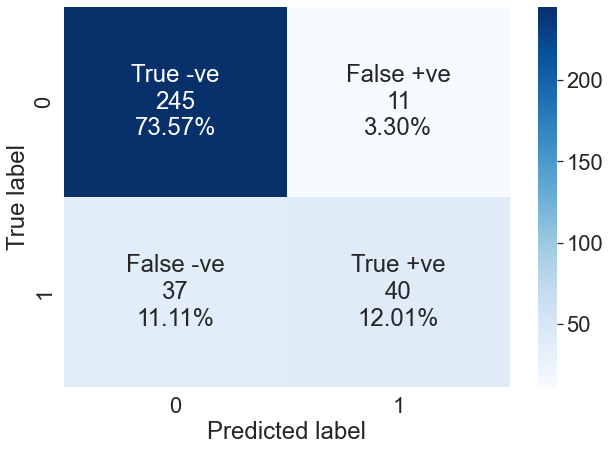

In [451]:
Grad_boost = GradientBoostingClassifier(random_state=25)
Grad_boost.fit(X_train_laptop, y_train_laptop)
y_predict = Grad_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [452]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.7382558847402597

In [453]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7382558847402597

Text(0.5, 0, 'False Positive Rate')

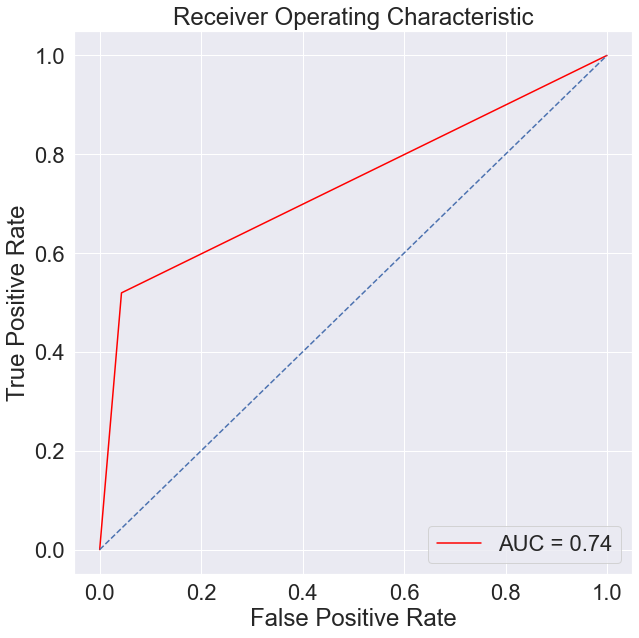

In [454]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [455]:
scores_l(Grad_boost)

Accuracy on training set :  0.8980645161290323
Accuracy on test set :  0.8558558558558559

Recall on training set :  0.6633165829145728
Recall on test set :  0.5194805194805194

Precision on training set :  0.9166666666666666
Precision on test set :  0.7843137254901961

F1 on training set :  0.7696793002915451
F1 on test set :  0.6249999999999999


## Gradient Boost with ADABoost classifier

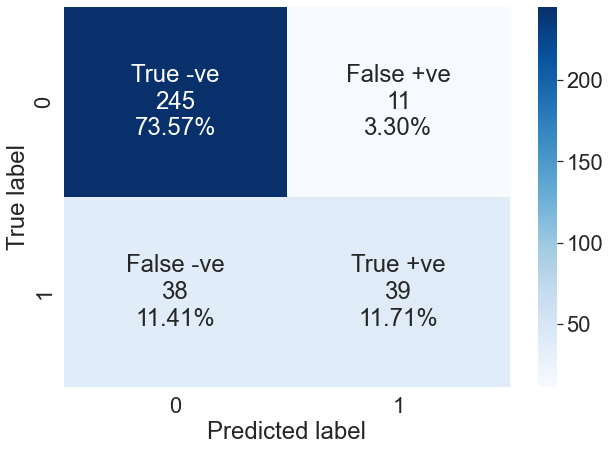

In [456]:
Grad_boost_ada = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)
Grad_boost_ada.fit(X_train_laptop, y_train_laptop)
y_predict = Grad_boost_ada.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [457]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.7317623782467533

In [458]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7317623782467533

Text(0.5, 0, 'False Positive Rate')

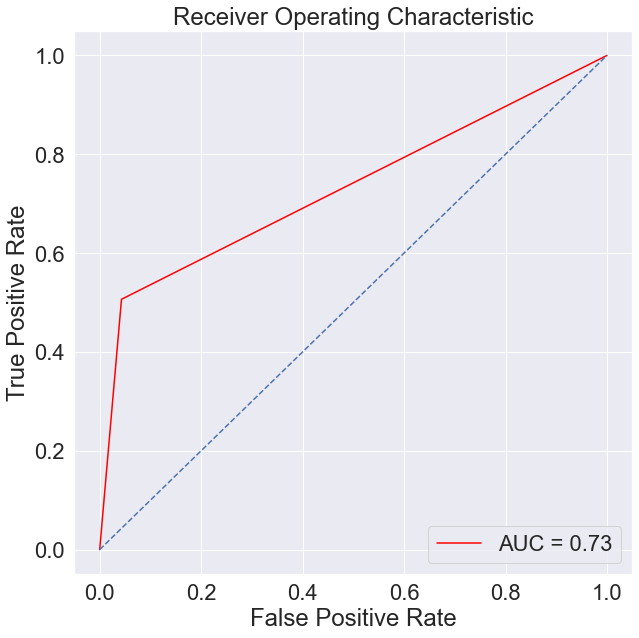

In [459]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [460]:
scores_l(Grad_boost_ada)

Accuracy on training set :  0.8890322580645161
Accuracy on test set :  0.8528528528528528

Recall on training set :  0.6331658291457286
Recall on test set :  0.5064935064935064

Precision on training set :  0.9064748201438849
Precision on test set :  0.78

F1 on training set :  0.7455621301775147
F1 on test set :  0.6141732283464567


## Bagging Classifier

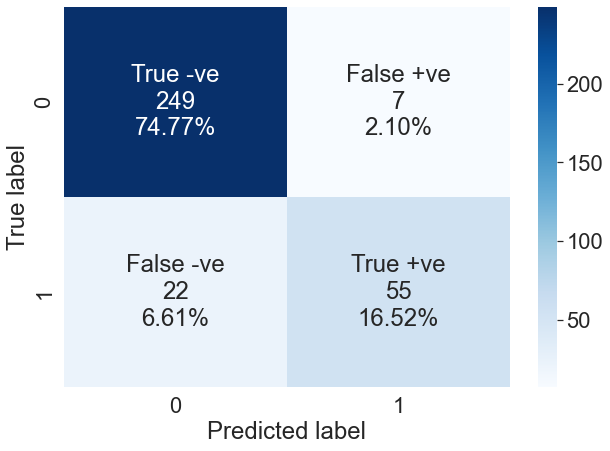

In [461]:
bagging = BaggingClassifier(random_state=25) #defining the classifier with randomstate 25
bagging.fit(X_train_laptop, y_train_laptop)
y_predict = bagging.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [462]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8434709821428572

In [463]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8434709821428572

Text(0.5, 0, 'False Positive Rate')

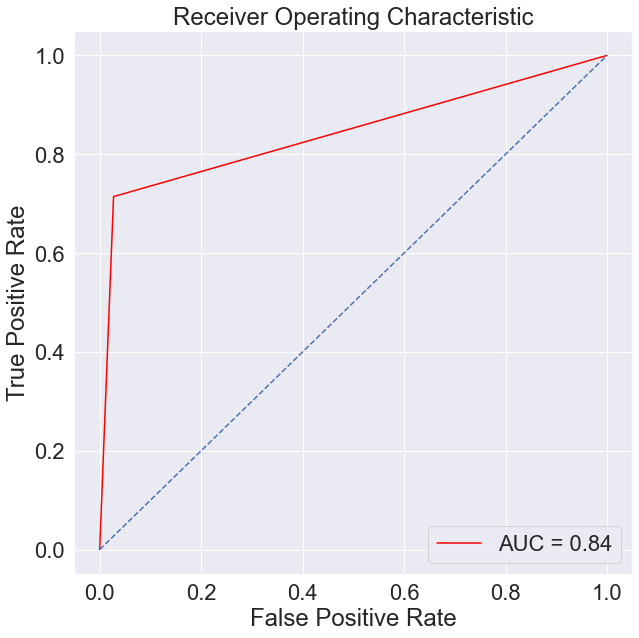

In [464]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [465]:
scores_l(bagging)

Accuracy on training set :  0.9922580645161291
Accuracy on test set :  0.9129129129129129

Recall on training set :  0.9748743718592965
Recall on test set :  0.7142857142857143

Precision on training set :  0.9948717948717949
Precision on test set :  0.8870967741935484

F1 on training set :  0.9847715736040609
F1 on test set :  0.7913669064748201


### Hyperparameters for Bagging Classifier

In [466]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=25, bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_laptop, y_train_laptop)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=25)

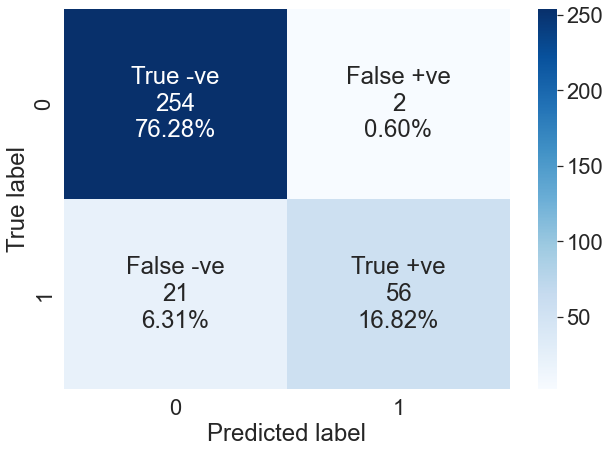

In [467]:
y_predict = bagging_estimator_tuned.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [468]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.8597301136363636

In [469]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8597301136363636

Text(0.5, 0, 'False Positive Rate')

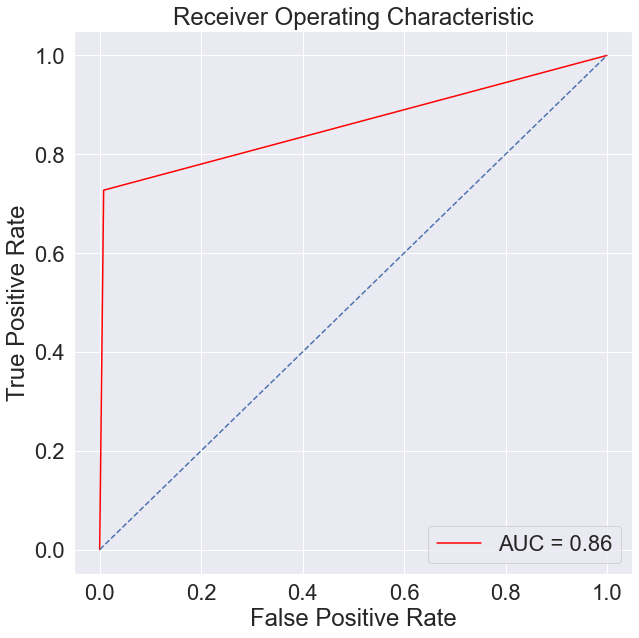

In [470]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [471]:
scores_l(bagging_estimator_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9309309309309309

Recall on training set :  1.0
Recall on test set :  0.7272727272727273

Precision on training set :  1.0
Precision on test set :  0.9655172413793104

F1 on training set :  1.0
F1 on test set :  0.8296296296296296


## Linear Discriminant Analysis

In [472]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_laptop, y_train_laptop)

LinearDiscriminantAnalysis()

In [473]:
lda.explained_variance_ratio_

array([1.])

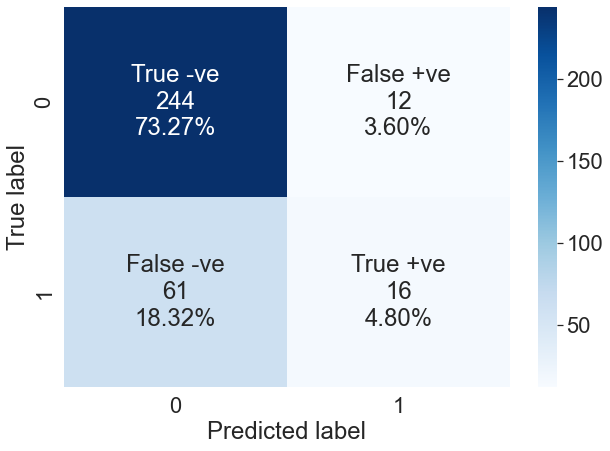

In [474]:
y_predict = lda.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [475]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5804586038961039

In [476]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5804586038961039

Text(0.5, 0, 'False Positive Rate')

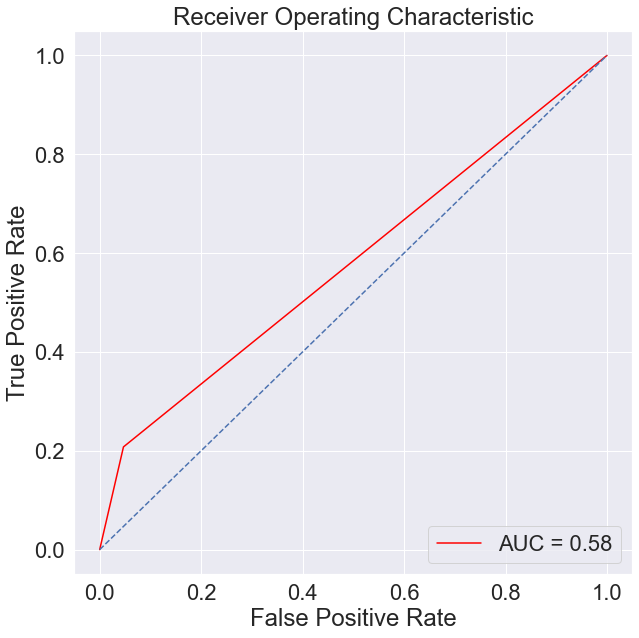

In [477]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [478]:
scores_l(lda)

Accuracy on training set :  0.7664516129032258
Accuracy on test set :  0.7807807807807807

Recall on training set :  0.20603015075376885
Recall on test set :  0.2077922077922078

Precision on training set :  0.640625
Precision on test set :  0.5714285714285714

F1 on training set :  0.31178707224334606
F1 on test set :  0.30476190476190473


## KNN Classifier

In [479]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_laptop, y_train_laptop)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_laptop, y_train_laptop)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_laptop, y_test_laptop) 


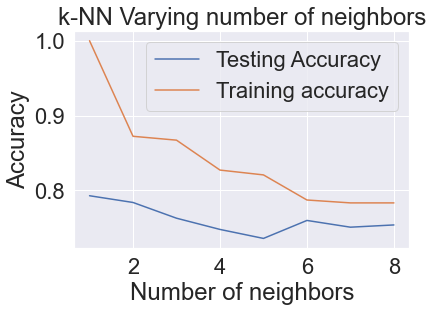

In [480]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [481]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)


In [482]:
#Fit the model
knn.fit(X_train_laptop,y_train_laptop)

KNeighborsClassifier(n_neighbors=7)

In [483]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test_laptop,y_test_laptop)

0.7507507507507507

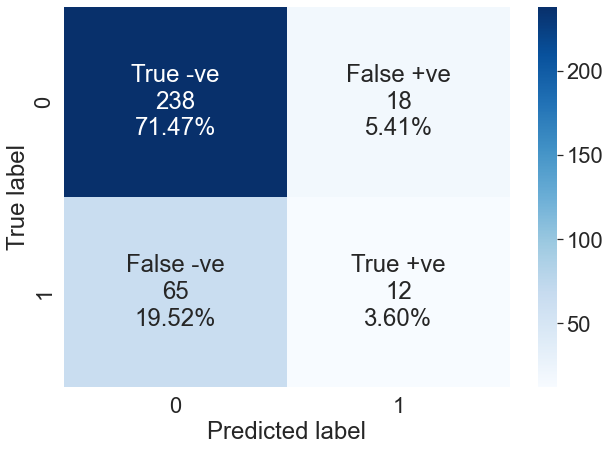

In [484]:
y_predict = knn.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [485]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.542765827922078

In [486]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.542765827922078

Text(0.5, 0, 'False Positive Rate')

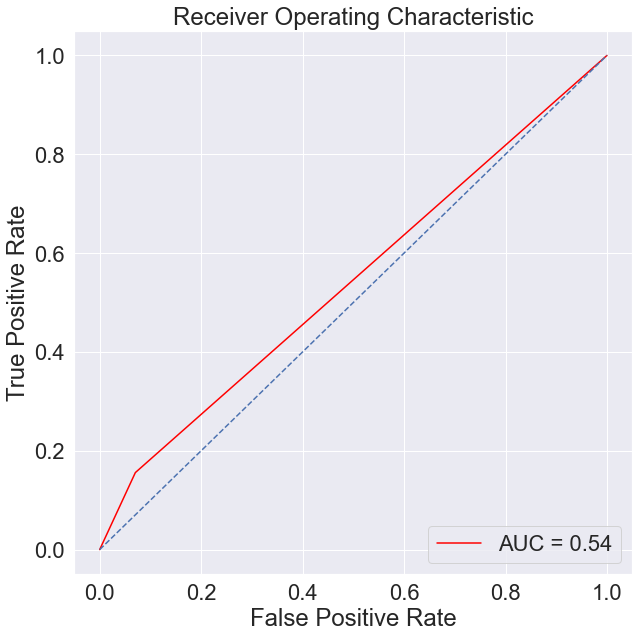

In [487]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [488]:
scores_l(knn)

Accuracy on training set :  0.7832258064516129
Accuracy on test set :  0.7507507507507507

Recall on training set :  0.3165829145728643
Recall on test set :  0.15584415584415584

Precision on training set :  0.6631578947368421
Precision on test set :  0.4

F1 on training set :  0.42857142857142855
F1 on test set :  0.22429906542056077


## Naive Bayes Classifier

In [489]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_laptop, y_train_laptop)

GaussianNB()

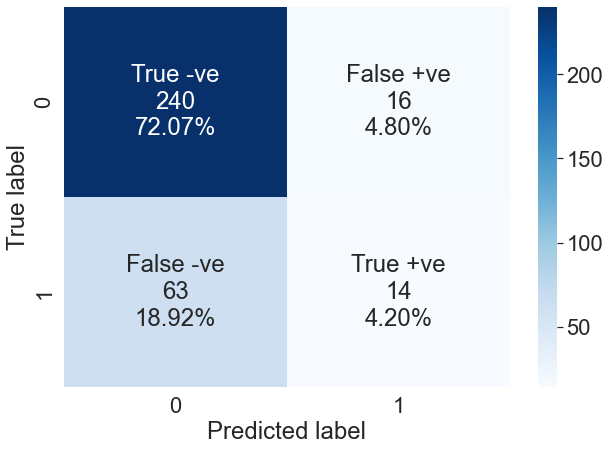

In [490]:
y_predict = gnb.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [491]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

0.5596590909090909

In [492]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5596590909090909

Text(0.5, 0, 'False Positive Rate')

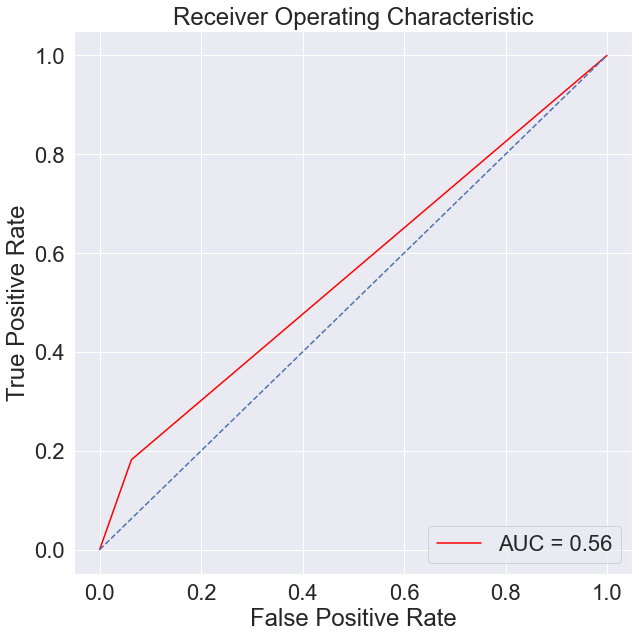

In [493]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [494]:
scores_l(gnb)

Accuracy on training set :  0.7625806451612903
Accuracy on test set :  0.7627627627627628

Recall on training set :  0.21608040201005024
Recall on test set :  0.18181818181818182

Precision on training set :  0.6056338028169014
Precision on test set :  0.4666666666666667

F1 on training set :  0.3185185185185185
F1 on test set :  0.26168224299065423


In [496]:
# defining list of models
all_models = [Dt,classifier,random_forest,XG_boost,xgb_tuned, logreg, Ada_boost,Grad_boost, Grad_boost_ada, bagging, bagging_estimator_tuned, lda, knn, gnb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores_l(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])

In [497]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','XGBoost Classifier','Tuned XGBoost Classifier','Logistic Regression','Ada boost','Gradient boost','Gradient and Ada Boost','Bagging','Bagging estimator tuned','Linear Discrimant Analysis', 'KNN','Naive Bayes Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_F1-Score  \
2                Random Forest        1.000000       0.936937        1.000000   
10     Bagging estimator tuned        1.000000       0.930931        1.000000   
3           XGBoost Classifier        1.000000       0.921922        1.000000   
9                      Bagging        0.992258       0.912913        0.984772   
4     Tuned XGBoost Classifier        0.998710       0.903904        0.997494   
0                Decision Tree        1.000000       0.894895        1.000000   
7               Gradient boost        0.898065       0.855856        0.769679   
8       Gradient and Ada Boost        0.889032       0.852853        0.745562   
1          Tuned Decision Tree        0.521290       0.474474        0.515033   
6                    Ada boost        0.794839       0.795796        0.475248   
11  Linear Discrimant Analysis        0.766452       0.780781        0.311787   
13      Naive Bayes Classifier        0.762581       0.762763        0.318519   
12                         KNN        0.783226       0.750751        0.428571   
5          Logistic Regression        0.762581       0.768769        0.258065   

    Test_F1-Score  
2        0.846715  
10       0.829630  
3        0.819444  
9        0.791367  
4        0.777778  
0        0.777070  
7        0.625000  
8        0.614173  
1        0.447950  
6        0.413793  
11       0.304762  
13       0.261682  
12       0.224299  
5        0.222222

In [498]:
#Sorting models in decreasing order of test accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_F1-Score  \
2                Random Forest        1.000000       0.936937        1.000000   
10     Bagging estimator tuned        1.000000       0.930931        1.000000   
3           XGBoost Classifier        1.000000       0.921922        1.000000   
9                      Bagging        0.992258       0.912913        0.984772   
4     Tuned XGBoost Classifier        0.998710       0.903904        0.997494   
0                Decision Tree        1.000000       0.894895        1.000000   
7               Gradient boost        0.898065       0.855856        0.769679   
8       Gradient and Ada Boost        0.889032       0.852853        0.745562   
6                    Ada boost        0.794839       0.795796        0.475248   
11  Linear Discrimant Analysis        0.766452       0.780781        0.311787   
5          Logistic Regression        0.762581       0.768769        0.258065   
13      Naive Bayes Classifier        0.762581       0.762763        0.318519   
12                         KNN        0.783226       0.750751        0.428571   
1          Tuned Decision Tree        0.521290       0.474474        0.515033   

    Test_F1-Score  
2        0.846715  
10       0.829630  
3        0.819444  
9        0.791367  
4        0.777778  
0        0.777070  
7        0.625000  
8        0.614173  
6        0.413793  
11       0.304762  
5        0.222222  
13       0.261682  
12       0.224299  
1        0.447950